In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 20 10:49:52 2020

@author: cleme
"""
import numpy as np
import pandas as pd
from pathlib import Path

# Import data
#DATA_TRAIN_PATH = "../train_data/features_no_segmentation.csv"
#DATA_TRAIN_PATH = r"C:\Users\cleme\Documents\EPFL\SV MA1\ML\ML_Project2\train_data\features_no_segmentation.csv"
DATA_TRAIN_PATH = Path("../train_data/features_no_segmentation.csv")
coughs = pd.read_csv(DATA_TRAIN_PATH, sep=',', index_col = ['Unnamed: 0','File_Name'])

In [6]:
# Have an insight
coughs.shape
#coughs.loc[:,'EEPD50_100':'Expert'].shape[1]

(1659, 72)

In [4]:
# Check the number of undefined values -> should be 0
coughs.isnull().sum().sum()

0

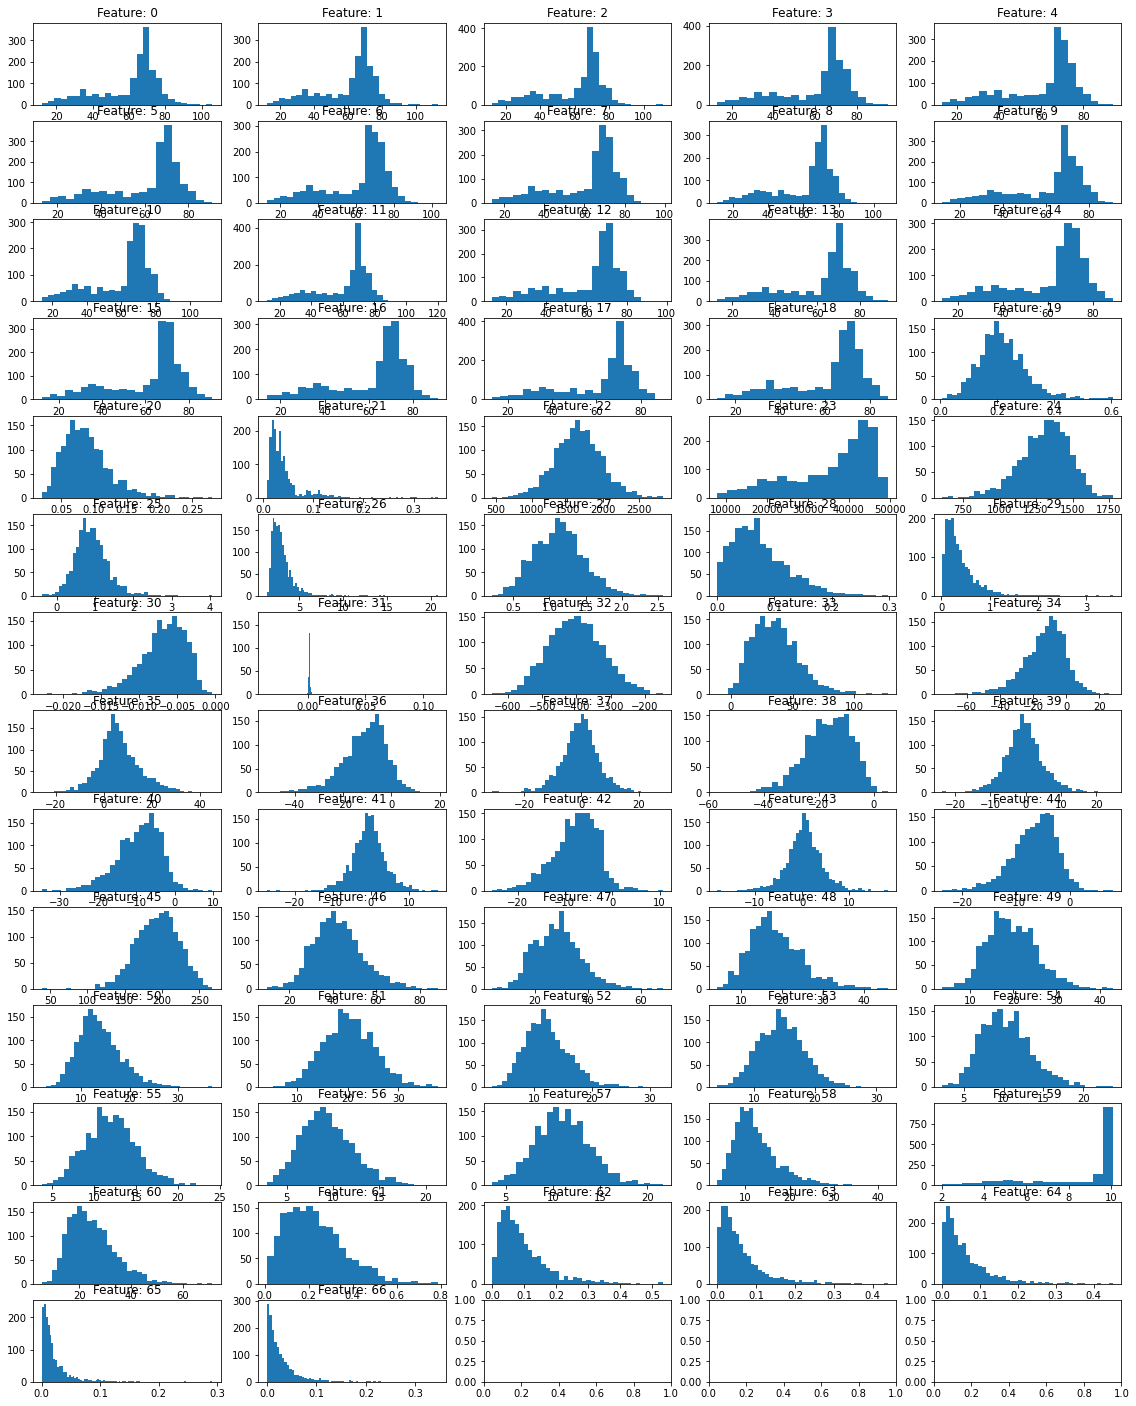

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt


nrows = 14
ncols = 5
fig, axes = plt.subplots(nrows, ncols)

feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        if feature_id == 67: break
        feature_tbp  = coughs.iloc[:,feature_id]
        axes[row, col].hist(feature_tbp[~np.isnan(feature_tbp)], bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_id))
        feature_id += 1
    
    
fig.set_size_inches(19.5, 25)


In [7]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(coughs.loc[:,'EEPD50_100':'PSD_3100-3700'])
scalerdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABHAAAAV+CAYAAAAeC8keAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdfbhldX3f/fcHRNAoAmEkw8M4RMdEMBHTcxNTm4RLIKCYQOutndzRYEo6bUNutTXRoTW3mkid5E5sbCtJp2qZ+IRTNEowahDltvZGcfApAiJTmcDICCMRFaNExm//WOvA5nAe9jlnP6y9z/t1Xfs6Z6/9sL6zzv7M2uu3fr/fSlUhSZIkSZKk7jpo3AVIkiRJkiRpcTbgSJIkSZIkdZwNOJIkSZIkSR1nA44kSZIkSVLH2YAjSZIkSZLUcTbgSJIkSZIkdZwNOJIkSZIkSR1nA05HJNmT5LtJ7u25HTuA9zxjUDWusIZ/neRrSb6Z5K1JDh1nPdJCpjGDSZ6a5MNJvp6kxlWH1I8pzeD5Sa5P8q0ke5P8QZJHjKseaTFTmsHNSW5uv4felWRHksPHVY+0mGnMYK8kH01S7gdXxwacbvnFqnpMz+2OcRaz2nAlOQvYCpwObAR+FHjt6iuThmaqMgh8H9gJXDCAcqRRmLYMPhp4GXA08NM0+8PfWm1d0hBNWwb/J/DMqnoczffQRwCvW3Vh0vBMWwZn3+dXaPKnVbIBp+OSPC7JW5LsS/LVJK9LcnD72BPblsy72zPs70hyRPvY24ANwF+0rbevSHJakr1z3v+BVtkkr0lyeZK3J/kW8OLF1t+H84G3VNUNVfUN4PeAFw9my0ijMckZrKqbq+otwA2D3CbSKE14Bv+kqv5HVf19VX0VeAfwzAFuHmnoJjyDt1fV13sWHQCeNIDNIo3MJGdwtn7g1cArBrRJ1jQbcLpvB3A/zc7m6cAvAL/ePhbg9cCxwFOAE4DXAFTVi4DbeLAV9w/6XN+5wOXAETRfNBdcf5INSe5JsmGB9zoZ+HzP/c8DxyT54T5rkbpgkjMoTYNpyuDPYYOqJs9EZzDJP0ryTeDbwPOAP+6zDqkrJjqDwL8H/gT4Wp/r1yJswOmW97UBuCfJ+5IcAzwbeFlVfaeq7gL+A7AZoKp2V9VVVXVfVe0H3gD8/CpruLaq3ldVPwAOX2L9t1XVEVV12wLv9Rjgmz33Z39/7CprlIZl2jIoTZqpzWCSXwNmgD9cZX3SME1dBqvqE+0QquOB/xfYs8r6pGGaqgwmmaHpefqfVlmTWo5D65bzquojs3eSnAocAuxLMrv4IOD29vHHA/8R+FmaRpGDgG+ssobbe35/wmLr78O9NKGfNfv7t1dToDRE05ZBadJMZQaTnAdsA86YM5xD6pqpzCBAVX01yYeAy4CfWmWN0rBMTQaTHARcAry0qu7veb1WwQacbrsduA84uqrun+fx1wMF/GRV3d1+QfzPPY/PverMd2gmVASgHbu4bs5zel+z1PqXcgPwNJpJVGl/v7Oq7l7Be0njMOkZlCbdxGcwydnAfwXOqaq/Xsl7SGM08Rmc4xHAEwfwPtKoTHIGD6fpefrutvFmdt6cvUmeX1X/Y5nvJxxC1WlVtQ/4K+CPkhye5KB2oqrZbnGPpenlck+S44DfnvMWd9LMuD/ry8BhSc5JcgjwKmDBy3r3sf6l/BlwQZKTkhzZru/SPl8rjd2kZzCNw4BHtvcPS7Lg+qSumYIMPotm/oDnVdV1/bxG6pIpyOCvtHN0JMkTgIuBq/t5rdQFE57Bb9LMzXNKe3tOu/wfAJ/q4/Wahw043ferNAdfN9J0h7scWN8+9lqaLqDfBD4AvHfOa18PvKodQ/lbVfVN4DeANwNfpWmB3cviFlx/u0O8NwtMWlVVHwL+APgY8Dft7dX9/bOlzpjYDNJ0e/0uD06a+l3g5qX+wVLHTHIGfwd4HPCX7fPuTfLB/v7ZUmdMcgZPAv5/mgPc/0mzD/znffybpS6ZyAxW42uzN2B/+9CdVfX3ff/r9RCpmturSpIkSZIkSV1iDxxJkiRJkqSOswFHkiRJkiSp42zAkSRJkiRJ6jgbcCRJkiRJkjrOBhxJkiR1XpKDk3w2yZXt/aOSXJXklvbnkT3PvSjJ7iQ3JzlrfFVLkjQ4nbgK1dFHH10bN24cdxnSSFx//fVfr6p1466jlxnUWtLFDII51Nqx0gwm+TfADHB4VT03yR8Af1tV25JsBY6sqlcmOQl4F3AqcCzwEeDJVXVgsfc3g1or3A9K47WaDD5i0MWsxMaNG9m1a9e4y5BGIsnfjLuGucyg1pIuZhDModaOlWQwyfHAOcDFwL9pF58LnNb+vgO4Bnhlu/yyqroPuDXJbprGnGsXW4cZ1FrhflAar9Vk0CFUkiT1weEb0lj9MfAK4Ac9y46pqn0A7c/Ht8uPA27ved7edpkkSRPNBhxJkvrzUuCmnvtbgaurahNwdXufdvjGZuBk4GzgkiQHj7hWaWokeS5wV1Vd3+9L5lk275wBSbYk2ZVk1/79+1dcoyRJo9CJIVSaTBu3fmDe5Xu2nTPiSqTpZc66YRTDN9Rd5nDsngn8UpLnAIcBhyd5O3BnkvVVtS/JeuCu9vl7gRN6Xn88cMd8b1xV24HtADMzM+OfGFJDsVCGZ5llafgWy6EZ7J89cCRJWtpQhm949l9aWlVdVFXHV9VGmt5tH62qFwJXAOe3TzsfeH/7+xXA5iSHJjkR2ARcN+KyJUkaOBtwJElaxDCHb1TV9qqaqaqZdes6d0EQqeu2AWcmuQU4s71PVd0A7ARuBD4EXLjUFagkSZoEDqGSJGlxQxu+IWl5quoamuGKVNXdwOkLPO9imiGPkiRNDXvgSJK0CIdvSJIkqQvsgSNJ0spsA3YmuQC4DXg+NMM3kswO37gfh29IkiRpAGzAkSSpTw7fkCRJ0rg4hEqSJEmSJKnjbMCRJEmSJEnqOBtwpI5LcliS65J8PskNSV7bLj8qyVVJbml/HtnzmouS7E5yc5Kzxle9JEmSJpnfRaXuWLIBx8BKY3cf8KyqehpwCnB2kmcAW4Grq2oTcHV7nyQn0Vwp52TgbOCSJAePpXJJkiRNOr+LSh3RTw8cAyuNUTXube8e0t4KOBfY0S7fAZzX/n4ucFlV3VdVtwK7gVNHWLIkSZKmhN9Fpe5YsgHHwErjl+TgJJ8D7gKuqqpPAcdU1T6A9ufj26cfB9ze8/K97TJJkiRp2Yb1XTTJliS7kuzav3//8P4B0pTo6zLibQ+a64EnAW+qqk8leUhgk/QG9pM9L583sEm2AFsANmzYsPJ/gbQGVNUB4JQkRwB/nuSpizw9873Fw55kBiVJktSHYXwXbd93O7AdYGZmZt7naPpt3PqBBR/bs+2cEVbSfX1NYlxVB6rqFOB44NRBBLaqtlfVTFXNrFu3rr9qpTWuqu4BrqEZnnhnkvUA7c+72qftBU7oednxwB3zvJcZlCRJUt8G+V1U0vIt6ypUBlYavSTr2rMdJHkUcAbwJeAK4Pz2aecD729/vwLYnOTQJCcCm4DrRlu1JEmSpoHfRaXuWHIIVZJ1wPer6p6ewP4+DwZ2Gw8P7DuTvAE4FgMrrdZ6YEc7lPEgYGdVXZnkWmBnkguA24DnA1TVDUl2AjcC9wMXtt1eJUmSpOXyu6jUEf3MgWNgpTGqqi8AT59n+d3A6Qu85mLg4iGXJkmSpCnnd1GpO5ZswDGwkiRJkiRJ47WsOXAkSZIkSZI0ejbgSJIkSZIkdZwNOJIkSZIkSR1nA44kSZIkSVLH2YAjSZIkSZLUcTbgSJIkSZIkddySlxGXJEnSw23c+oF5l+/Zds6IK5EkSWuBPXAkSZIkSZI6zh44WtJCZxglSZIkSdJo2ANHkiRJkiSp4+yBI0kdYE83SZIkSYuxB44kSZIkaV5JTkjysSQ3JbkhyUvb5UcluSrJLe3PI3tec1GS3UluTnLW+KqXpsuSDTgGVhovMyhJkqQxuh94eVU9BXgGcGGSk4CtwNVVtQm4ur1P+9hm4GTgbOCSJAePpXJpyvTTA8fASuNlBiVJkjQWVbWvqj7T/v5t4CbgOOBcYEf7tB3Aee3v5wKXVdV9VXUrsBs4dbRVS9NpyTlwqmofsK/9/dtJegN7Wvu0HcA1wCvpCSxwa5LZwF476OKltcAMSpIkDc9i89Dt2XbOCCvpviQbgacDnwKOab+nUlX7kjy+fdpxwCd7Xra3XSZplZY1B85igQV6A3t7z8sMrDQgZlCSJEnjkOQxwHuAl1XVtxZ76jzLaoH33JJkV5Jd+/fvH0SZ0lTruwFn0IE1rNLymEFJ0lrkXHDS+CU5hOZ76Duq6r3t4juTrG8fXw/c1S7fC5zQ8/LjgTvme9+q2l5VM1U1s27duuEUL02Rvi4jvlhg2+5yyw5sVW0HtgPMzMzM2yIrqWEGpfFJcgLwZ8CPAD8AtlfVG5McBbwb2AjsAV5QVd9oX3MRcAFwAHhJVX14DKVL02J2LrjPJHkscH2Sq4AX08wFty3JVpq54F45Zy64Y4GPJHlyVR0YU/3SREsS4C3ATVX1hp6HrgDOB7a1P9/fs/ydSd5Ak8FNwHWjq1jTZLEhjrD2hjn2cxWqpQILDw/s5iSHJjkRAyutihmUxs6JxKUxcgJVaeyeCbwIeFaSz7W359A03JyZ5BbgzPY+VXUDsBO4EfgQcKENqNJg9NMDZzawf53kc+2yf0sT0J1JLgBuA54PTWCTzAb2fgystFpmUBojJxKXumPQE6gm2QJsAdiwYcNwipYmXFV9gvmH6AOcvsBrLgYuHlpR0hrVz1WoDKw0RmZQ81moO+la60Y6ah48SuMzdy64poPq/E+dZ9m8Q4UdTixJmiTLugqVJElr1TCuvuHkjVJ/hjWBqiRJk8QGHEmSluDBozQ+zgUnSVKjr6tQSZK0Vnn1DWnsnAtOY+MVcCR1iQ04GrjFdnTu5CRNIA8epTFyLjhJkho24EiStAgPHiWp+5bqKSNJ08A5cCRJkiRJkjrOBhxJkiRJkqSOswFHkiRJkiSp42zAkSRJkiRJ6jgnMZakKbLQJI5eAU6SJEmabDbgSJIk4VVsJElSt9mAI2B0X1rtHaC1zgNESZIkSSvhHDiSJEmSpAUleWuSu5J8sWfZUUmuSnJL+/PInscuSrI7yc1JzhpP1dL0WbIBx7BK42UGJUmSNGaXAmfPWbYVuLqqNgFXt/dJchKwGTi5fc0lSQ4eXanS9OqnB86lGFZpnC7FDEqSJGlMqurjwN/OWXwusKP9fQdwXs/yy6rqvqq6FdgNnDqSQqUpt2QDjmGVxssMSpIkqYOOqap9AO3Px7fLjwNu73ne3naZpFVa6STGDwlrkt6wfrLneQuGNckWYAvAhg0bVliGtGaZQUmSJHVR5llW8z7R76NTwwt1jMagJzHuO6xVtb2qZqpqZt26dQMuQ1qzzKAkSZJG4c4k6wHan3e1y/cCJ/Q873jgjvnewO+j0vKstAfOnUnWt2f+VxRWSatiBiWpoxY7C7ln2zkjrESShuoK4HxgW/vz/T3L35nkDcCxwCbgurFUKE2ZlfbAmQ0rPDysm5McmuREDKs0LGZQkiRJI5HkXcC1wI8l2ZvkApqGmzOT3AKc2d6nqm4AdgI3Ah8CLqyqA+OpXJouS/bAacN6GnB0kr3Aq2nCubMN7m3A86EJa5LZsN6PYZVWzQxKkiRpnKrqlxd46PQFnn8xcPHwKpIaa63X65INOIZVGi8zKEmDM+5JFhda/zR+yZQkSYO10jlw1PKLmDR65k6SJEnSWmMDjiRJkiRJI7RUj1BPTGo+NuBIkqQVs0ecpLVsrc2/oYeyEUajZgOOJEmSNIFWc/DogackTR4bcCaAZzel1TFDkiRJkiadDTgjZjfL+XmArS5Z7udxvud37bNrxjRqK9nfreQKUX6GpbVj3FeRk7piXD3oJi2D09jT0AacKTVp4ZLmM8mf40muXZqPn2lJ/RjmsC5p0nTxM93FmtQ/G3B6DPLDPIpgGD5Nk0F8npf7HmZIkjTNVrOfs9e41JjE74uTWLP6YwNOhxg0SdIouL+RumMSu/j7f0h/JvFvu1b5mdakmNoGHM8aSOM1jXOuuHOXJod51bTwsyytTWZf85naBpzFGIbJYUPc9DF/3TIJEzBr+kzakGVJUvd53KC1YE024EiSNC38wjodprHX4lpjY2J/3E6StHJDa8BJcjbwRuBg4M1VtW0Y63EnIM3PDErjNaoMLsZ8ai3rQgaltaxLGXR/qPlM4kmwoTTgJDkYeBNwJrAX+HSSK6rqxmGsT2uTZysXZgal8TKD0ngNI4MeAEr9M4PScAyrB86pwO6q+gpAksuAcwEDq6GzYQcwg1qF5f6t11i2+mUGNRCTeHawIwaeQWnQpjzfZlAagmE14BwH3N5zfy/w00Nal9SXlRz8LLTznIBGIjOosRt2Q1DHc2gGNXTjzMAEHHiaQU201TTam0Fp9bqawWE14GSeZfWQJyRbgC3t3XuT3DykWo4Gvj6k916prtVkPQvI7z/wa1819Tx/MU9YcUH960oGu/K3tI6HGmgdfX7ul6xjFe/zEH28TycyCOZwjLpSy1DqWGGWBlaLGZxXVz5zi5mEGsE6l2QG5+XnZrCscxHDzOCwGnD2Aif03D8euKP3CVW1Hdg+pPU/IMmuqpoZ9nqWY76akuwBjgEO9Cx+clU9ZLstcz17gF+vqo8st55BSPJi4C3Ad3sWP7eqrhlHPavRxZqW0IkMdmW79VPHKDI4ju2R5EeB/wj8PHAf8FbgWZPyd5lgS2YQzOGcx/cwov3gqLZJkj8FXtiz6BDg76vqsaOsox9dqmVAOpNBmIztm+Q+xvRddJnv2fe2TBLg94BfAx4DfBa4sKpuGFQ9i6y783/zITODy9TmZQNNo8OszmWwfd++tmeSQ4FtwD8FHgW8C3hpVX1/kPUssv7O/92X66Ahve+ngU1JTkzySGAzcMWQ1jVNfrGqHtNzW3FYByHJIBr4rp3zb7pmAO+ppZnBlZmqDLZ/+6uAjwI/QvPl6e0DKE1LM4MrM1UZrKp/2fvvofni+t8HU52WYAZXZqoyCDwf+GfAzwJHAdcCb1ttXeqLGVyZW6Ysg1uBGeCpwJOBnwJetdq61rKhNOBU1f3AbwIfBm4Cdo6ipXsaJXlckrck2Zfkq0le187qTpInJvlokruTfD3JO5Ic0T72NpoW3L9Icm+SVyQ5LcneOe+/B5g9E/iaJJcneXuSbwEvXmz96i4zODiDzCDw2PkymOSM9vdBZ/DFwB1V9Yaq+k5Vfa+qvjCgTaNFmMHBGcV+cIgZ7F3PDwHPA3ascpOoD2ZwcLqWQeDYZWTwROATVfWVqjpAcxLjpMFsGS3GDA5O1zKY5HXLKP8Xgf9YVX9bVftpeoX/swFsljVrWD1wqKq/rKonV9UTq+riYa2nD0PvkrcCy6lpB3A/8CTg6cAvAL/ePhbg9cCxwFNouim+BqCqXgTcxoNnUv5gkXX0ztB0LnA5cATwjsXWn2RDknuSbFjkvZ/e/mfy5SS/k/5acSf9b9YJHclgV7bbauoYZAb/oo/1DTKDzwD2JPlgm8NrkvwE0/F36byOZBC6s51XWscw9oOL1TLo/eCs5wH7gY/3WceodamWgehQBmEytu+3F1g+iu+ivZbK4H30n8HLgCcleXKSQ4DzgQ/1WcdqTcLffKjM4IrMN3Nu1zL4CzSNcv1kMDx0PqQAxyd5XJ+1rNak/N37V1XeOnAD9gD3Ave0t/fRjEO+D3hUz/N+GfjYAu9xHvDZOe95Rs/904C986z3jPb31wAf73lsWeufp54fpTnzcRDwEzSXDbxo3Nvam7f5blOawb8Cvg88G3gk8NvAV4BHjnt7e/M29zaNGZyznquB14x7O3vzttBtGjPY7vveSDN57v3ArcCJ497W3rzNd5vSDL4O+J/AOprh/J9q87h+3Nt7Um/DmsRYK3Ne9UwwleRUmgkP9yUPNFweRHtJviSPp+mG9rM0w6AOAr6xyhp6L/f3hMXWv5Sq+krP3b9O8rs0B5CvX2WN0rBMVQZpJhD/RFV9sK33D2nGHT8F+Pwq65SGYdoySFvnCTQTif/zVdYmDdu0ZfDVwP9B0yvhazSTin80yclV9XerrFMahmnL4MU0PXk+R9MQ9F9pevHctcoa16yhDaEahyQnJPlYkpuS3JDkpe3yo5JcleSW9ueRI67r4CSfTXLlMuu5neaDfnRVHdHeDq+qk9vHX0/TgvmTVXU4zU6pt4va3Ev1fQf4oXZc45eS3ETTqvrYJFcB/zfwrJ56llr/ctWc+kjyr9u/1ReTvCvJYaP+eyV5a5K7knyxZ9mCNSS5KMnuJDcnOWuYtU2SLuVvFZmba8UZTDP+eB3w1nab/AxwMHBMTx0/3D6nV29uV5vBL9B0U72h/Xy/s11++LD/JuZq9LqUwXa9g8jhIPaDD+z3gP9G8/l/oBaaA7vHzHlNv+vv168Cf0MzD8HI93fmcXS6lsMlan1IRmmOC35/To3D+C766N4aWHw/+M32/teAfTQ9SjcCd/S5LZ8GvLuq9lbV/VV1KXAkA54HpwvfZ9WYpAzCvDl8bG+dwLcYbwZn/w94IvARmix+Ffj1frZpVX23qn6zqo6rqh8F7gaur2ZOqoFbC1mcqgYcmq6RL6+qp9DM/XBhkpNoZr++uqo20XRh3jriul5KO06w1Vc9VbWPZgjEHyU5PMlBaSaq+vn2KY+l7WaX5Dia3i297qQZxjTry+1rvkozpOm/07Sobm7r+E80odza5/oXleTZSY5pf/9x4HeA9/c8fhzwEmCmqp5Kc3C7ud/tM0CXAmfPWTZvDe3naTNwcvuaS+KkzrO6lL8VZW6uVWbwjTR5eh3NF8ibaCZyK+BlwMdo8nDoKta/lL+i2eH+dlvDj9PshM9l+H+TSzFXo9alDMIAcjig/eArgQ9V1Y/TnIl/BM2Y+I/x4FXZNq9w/f36Z8DhjG9/dynmcVS6lsPFzM3o42iGXjxQ45C+ix6W5Jw0c9K8ikX2g8C/pTkZ8WHgHwFforkk8Vf63JafBp6f5Ji29hfRfPfdvchrlqVD32fVmKQMwsNzuJmH1vlrjDGDPf8H/A/gGprGz39Mc1W3JbdpkuOSHJvGM2iOB1+91EZZiTWTxXGP4Rrmjebg6EzgZtpxdsB64OYR1nA8zQflWcCV7bKH1cOc8Yk9r38c8CfAXpqzEJ8FNrePnQxcTxPazwEvp2dMI81B2m00Yyh/i+bL436aMxh3tcv20LSsrqcZ83h57/ZZYv0b2nVvWODf/oc0/2l8h2bejd8FDul5/Lh23UfRfKG+kmZSrJH/vWjO5nyx5/68NQAX0TOPD80Xip8Z92e9i7dx5a/fzM3zuoFlsM3arfNk8GaaHfU+4OttDh9Yb5vBty9j/Utl8Lh2PV+hOYNzN80QjpH8TczVeG/jymC7nmXncJAZ7HntZpov8/cAv9Uue3G77OttLm8Hbm8fG2gG2+f8DPB37evHtr8zj+O5jTOHS9Q1X0a/D7xgns/EwL6LtstezMO/iz5sP8iD+9K56/8e8C/b58wAP1gog8BhwJva9X0L+Axw9oC3ZWe+z3qb9+/TyQy2dTwkh/Qcl/XWOa4MzqnzW3PX39Y20657Zr5tCvxc+/5/1z7/V4a4PddEFsdewBD/gBvbD+vhwD1zHvvGCOu4HPgHNBNGze4gx1IPcApwHc2ZuM8CbwZ+aMzb56Vt6PcD7xjX9uHhX2znrQH4z8ALe5a/Bfg/R7W9JuU2zvx1IXNdyto4M2auxncb9z6wCzls12EWH/qZMI8jvI07h0vU1omMLlFjZ/LbR62d+D7r7WF/l85msK2h8zlsazCLHbpN2xAqAJI8BngP8LKq+tYY63gucFdVXT+uGuZ4BPBTwJ9U1dNpesaMrQtZO/7wXJorVR1LM0/BC8dVT58yz7IaeRUdNs78dShzncjaBGXMXA3QuPeBHcohmMWVMI8DMO4cLqZjGV1MJ/K7lAnL95rR5QzCROUQzGKnTF0DTjuW7z00LW7vbRffmWR9+/h6Rjfr9TOBX0qyB7iMZoLgt4+xnr00Xeo+1d6/nCaM46rnDODWqtpfVd8H3gv8wzHW02uhGvbSTHg563jgjhHX1lkdyF9XMteVrHUtY+ZqyDqQQehODsEsLsY8DklHcriYLmV0MV3J71K6mO81bQIyCJOTQzCLnTJVDThJQtPV96aqekPPQ1cA57e/n0/PRLrDVFUXVdXxVbWRZpzgR6vqhWOs52vA7Ul+rF10OnDjuOqh6dL4jCSPbv92p9NM4jWuenotVMMVwOYkhyY5EdhE06VwzetC/rqSuQ5lrWsZM1dD1IUMQndy2NZiFhdmHoegKzlcTJcyupgO5XcpXcz3mjUJGYTJySGYxc4Z9xiuQd5oZqcvmtnqP9fengP8MM0EUbe0P48aQ22n8eDYxrHVQzOGcVe7jd5HcynFcdbzWporCnwReBvNLOgjrQd4F81EXt+naWG+YLEagH8H/C+aCbGePerPUldvXcvfuDPXlayNK2PmavS3rmWwrWns+761nsV23eZxRLcu5nCJesee0SXq60R++6hz7N9nvT3wt5ioDLY1dzqHbV1msSO3tP9QSZIkSZIkddQjxl0AwNFHH10bN24cdxnSSFx//fVfr6p1466jlxnUWtLFDII51NphBqXxMoPSeK0mg51owNm4cSO7du0adxnSSCT5m2U+/zDg4zRdAB8BXF5Vr05yFPBumksk7gFeUFXfaF9zEU0X+QPAS6rqw4utwwxqLVluBkfFHGqtMIPSeJlBabxWk8GpmsRYmlL3Ac+qqqfRjD89O8kzaC7fd3VVbaIZz7kVIMlJNJOhnQycDVyS5OCxVC5JkiRJGggbcKSOq8a97d1D2lsB5wI72uU7gPPa388FLquq+6rqVmA3cOoIS5YkSZIkDVgnhlBJszZu/cCij+/Zds6IKumWtgfN9cCTgDdV1aeSHFNV+wCqal+Sx7dPPw74ZM/L97bLNAUWy8hazYfUNeZUGr2FcmfmpO5zv9k/e+ebA44AACAASURBVOBIE6CqDlTVKcDxwKlJnrrI0zPfWzzsScmWJLuS7Nq/f/+gSpUkSZIkDYENONIEqap7gGto5ra5M8l6gPbnXe3T9gIn9LzseOCOed5re1XNVNXMunWduxCB1BlJDktyXZLPJ7khyWvb5UcluSrJLe3PI3tec1GS3UluTnLW+KqXJEnStLABR+q4JOuSHNH+/ijgDOBLwBXA+e3Tzgfe3/5+BbA5yaFJTgQ2AdeNtmppqjiRuCRJksbOOXCk7lsP7GgPAA8CdlbVlUmuBXYmuQC4DXg+QFXdkGQncCNwP3BhVR0YU+3SxKuqAhaaSPy0dvkOmt5xr6RnInHg1iSzE4lfO7qqJUmSNG1swJE6rqq+ADx9nuV3A6cv8JqLgYuHXJq0ZgxrIvEkW4AtABs2bBhW+ZIkSZoCDqGSJGkJw5hIvH1f56KSJElSX+yBI0lTwkuoDl9V3ZPkGnomEm973yx7InFJ/UlyGPBx4FCa766XV9WrkxwFvBvYCOwBXlBV32hfcxFwAXAAeElVfXgMpUuSNFD2wJEkaRFOJC6NnROJS5KEPXAkSVqKE4lLY+RE4pIkNWzAkSRpEU4kLo2fE4lLkuQQKkmSJHWcE4lLkmQPHEmSpJFZaLJxcMLxfjiRuCRpLVuyB06Sw5Jcl+TzSW5I8tp2+VFJrkpyS/vzyJ7XXJRkd5Kbk5w1zH+AJEmSppcTiUvj5fGg1B39DKFy5n9JkiSNy3rgY0m+AHwauKqqrgS2AWcmuQU4s71PVd0AzE4k/iGcSFxaLY8HpY5YcgiVM/9LkiRpXJxIXBovjwel7uhrEuMkByf5HM3Y4quq6lPAQ2b+B3pn/r+95+XzzvyfZEuSXUl27d+/fzX/BkmSJEnSkAzjeLB9X48JpWXoaxLjttvpKe344z8fxMz/VbUd2A4wMzMz75UBNH0Wm7xR0nA4aaokaVr4XXI8hnE82L6vx4TSMizrMuJVdQ9N17gHZv4HcOZ/SZIkSZpuHg9K49XPVaic+V+SJEmS1iCPB6Xu6GcI1XpgRztz+EHAzqq6Msm1wM4kFwC3Ac+HZub/JLMz/9+PM/9LkiRJ0qTyeFDqiH6uQuXM/5IkSZK0Bnk8KHXHsubAkSRJkiRJ0ujZgCN1XJITknwsyU1Jbkjy0nb5UUmuSnJL+/PIntdclGR3kpuTnDW+6iVJkiRJg2ADjtR99wMvr6qnAM8ALkxyErAVuLqqNgFXt/dpH9sMnExzhYBL2jHLkiRJkqQJZQOO1HFVta+qPtP+/m3gJuA44FxgR/u0HcB57e/nApdV1X1VdSuwGzh1tFVLkiRJkgapn6tQSeqIJBtpJpH7FHBMVe2DppEnyePbpx0HfLLnZXvbZZJWIMkJwJ8BPwL8ANheVW9MchTwbmAjsAd4QVV9o33NRcAFwAHgJVX14TGUriHauPUD4y5BkiStMfbAkSZEkscA7wFeVlXfWuyp8yyred5vS5JdSXbt379/UGVK08hhjJIkSRo7G3CkCZDkEJrGm3dU1XvbxXcmWd8+vh64q12+Fzih5+XHA3fMfc+q2l5VM1U1s27duuEVL004hzFKkiSpC2zAkTouSYC3ADdV1Rt6HroCOL/9/Xzg/T3LNyc5NMmJwCbgulHVK02zxYYxAr3DGG/veZnDGKVV8GqMkiQ1bMCRuu+ZwIuAZyX5XHt7DrANODPJLcCZ7X2q6gZgJ3Aj8CHgwqo6MJ7Spekx6GGM7Xs6lFFamsMYJUnCSYylzquqTzD/ASHA6Qu85mLg4qEVJa0xiw1jbCcRX/YwRmiGMgLbAWZmZuZt5JHWuraH22xvt28n6R3GeFr7tB3ANcAr6RnGCNyaZHYY47WjrVyStFpLXTRgz7ZzRlRJN9gDR5KkRTiMUeoOhzFKktayJRtwHHcsSVrjHMYodYDDGKXx8HhQ6o5+hlDNjjv+TJLHAtcnuQp4Mc24421JttKMO37lnHHHxwIfSfJkv7xKkiaRwxil8XMYozRWHg9KHbFkDxwvnypJkqRxcRijNF4eD0rdsaxJjBcbd5ykd9zxJ3te5rhjSZIkrdTsMMa/TvK5dtm/pRm2uDPJBcBtwPOhGcaYZHYY4/04jFEaGI8HpfHquwFn7rjj5mTI/E+dZ9nDuqQm2QJsAdiwYUO/ZWiNcxZySZLWFocxSt0w6OPB9j09JpSWoa+rUC027rh9fNnjjqtqe1XNVNXMunXrVlq/JEmSJGmIhnE8CB4TSsvVz1WoHHcsSZIkSWuQx4NSd/QzhMpxx5IkSZK0Nnk8KHXEkg04jjuWJEmSNEpLzXuo0fF4UF222P8V0zg/al9z4EiSJEmSJGl8bMCRJEmSJEnquL4vIy5JkiRJk2Sh4RXTOLRC0vSzB44kSZIkSVLH2QNHktawtTbxmyRJkjSpbMCRJEnqABtUJUnTyivLDYZDqCRJkiRJkjrOBhyp45K8NcldSb7Ys+yoJFcluaX9eWTPYxcl2Z3k5iRnjadqSZIkSdIg2YAjdd+lwNlzlm0Frq6qTcDV7X2SnARsBk5uX3NJkoNHV6o0nWxIlSRJ0rg5B47UcVX18SQb5yw+Fzit/X0HcA3wynb5ZVV1H3Brkt3AqcC1o6hVmmKXAv8Z+LOeZbMNqduSbG3vv3JOQ+qxwEeSPLmqDoy4ZknSAry8uKRJZA8caTIdU1X7ANqfj2+XHwfc3vO8ve2yh0myJcmuJLv2798/1GKlSVdVHwf+ds7ic2kaUGl/ntez/LKquq+qbgVmG1IlrZC94CRJsgeONG0yz7Ka74lVtR3YDjAzMzPvcyQt6iENqUl6G1I/2fO8BRtSpX55hSp7wUmStGQPHM94SJ10Z5L1AO3Pu9rle4ETep53PHDHiGuT1rq+G1LtCSf1x15w0nh5TCh1Qz9DqC7FCVSlrrkCOL/9/Xzg/T3LNyc5NMmJwCbgujHUJ60Fq25IrartVTVTVTPr1q0barHSFHI4sTQ6l+IxoTR2SzbgeMZDGq8k76KZhPjHkuxNcgGwDTgzyS3Ame19quoGYCdwI/Ah4EK7jEtDY0Oq1E3LGk5sI6q0NI8JpW5Y6Rw4qx73n2QLsAVgw4YNKyxDmn5V9csLPHT6As+/GLh4eBVJa0/bkHoacHSSvcCraRpOd7aNqrcBz4emITXJbEPq/diQKg3LnUnWt99FHU4sjZ7HhNKIDXoSYydQlaQBWGzCUo2eDalSJ832gtvGw3vBvTPJG2gmMbYXnDRaHhNKQ7LSBhzPeKiTljroXSNX6pAkaarYC07qJI8JpRFbaQOOZzwkdYaX15Wk6WYvOKmTPCZUp03jyf0lG3A84yFJkuay4VSS1g6PCaVuWLIBxzMekrQ2LXSA7sG5JElri8eEUjcMehJjrWFOuipJkiRJ0nDYgDMg/TReeNZakqTJ4EkJSZLUNTbgSFqTujB/hweIWotWmr0uZFbqmmEPdXUorbQ67rs0aDbgdMhqZ8mexlm2B81tNNlW0uAx6EYSv8xKS5uUxslJqVNaLvdVkjSdbMAZoUn/ojjp9Wsy+DmTJGk4bNiRumMSTyxPW4+iSfz32ICjB3jgLEkap2Hsh9y3aRr4OR4dG7k0DcbRMOH/U6NhA06fuvCB7EIN0lrQhaFaUhf4uZY0Hxs5pOEb1j54Enud6EE24EiStEZNSwPNtPw7Vsov49Nj0j/Ly23YmfR/r+RnWKO2ZhpwJnGMoTTpPKiYTv5dJWm6DPsg1INcTTI/v+qSqWnAMVhLcxupS/w8SoNjnqTucZiRNDncj2pSTE0DjqTxcacnSVJ/3GdKo2fu+uN26r6hNeAkORt4I3Aw8Oaq2jasdQ2CH1ZNm0nLoDRtBp1B91PS8rgf1CDZo2r5Rp1B95NaC4bSgJPkYOBNwJnAXuDTSa6oqhuHsT5pUKZlrqRhZNCdotQ/94PSeI0yg+4fpYdzPygNx7B64JwK7K6qrwAkuQw4F/DgURqNgWdQ6odnKB9gBtUJa3jScTMojZcZ1ETr6v5zWA04xwG399zfC/z0kNYljcwE9dAxg+qUru4Eh8gMSuM18Ax6MlHz8cTFgsygptY4jwmH1YCTeZbVQ56QbAG2tHfvTXLzkGoBOBr4+hDff9Csd3iGWmt+v6+nPWFY6+/RlQx29bNhXcvThdzMZ6V1dSKDMPQcdvXzNMv6Vm9VNa4ie/1aqL61ksG5uvSZspaFDaSeAeVrWNtmrWZwVtc+c4ux1uEY93fbFWdwWA04e4ETeu4fD9zR+4Sq2g5sH9L6HyLJrqqaGcW6BsF6h2eSal2lTmSwq9vbupbHulZkyQzCcHPY8e1jfQPQ9RrHXN/YMzhXl/5e1rKwLtXTpVpWoHMZnDVJ29Vah2OSap3roCG976eBTUlOTPJIYDNwxZDWNZGS7Eny3ST39tyOHcB7njGoGlew/qcm+XCSryeZr4X9qCR/nuQ7Sf4myf81jjrXCDO4hDWawd9MsivJfUkuHUOJa4kZXNpPrKUMJjk0yVva/d+3k3w2ybPHVesaYAaXsEb3g29Psi/Jt5J8Ocmvj6PONcIMLmEtZrDneZuSfC/J20dZ3zQYSgNOVd0P/CbwYeAmYGdV3TCMdU24X6yqx/TcHtYqPUpJVtsj6/vATuCCBR5/E/D3wDHArwB/kuTkVa5T8zCDfetUBgdgqQzeAbwOeOvIKlqjzGDfOpXBIe8HH0EzH8TPA48DfgfYmWTjKtepeZjBvq2lDAK8HthYVYcDvwS8Lsk/WOU6NQ8z2Le1lsFZb6Jp5NMyDasHDlX1l1X15Kp6YlVdPKz19Gmk3fJWI8njgO+1Zwe+muR1aS7DR5InJvlokrvbVs13JDmifextwAbgL9rW21ckOS3J3jnv/0CrbJLXJLm8PRvxLeDFSR7XniF82PoXsR2gqm6uqrcAD/vPOckPAc8Dfqeq7q2qT9C0wr9oNdtrBSbms7BaHclgV7f3gnUtloERZPDGFWYQWDyD7ePvrar3AXf38349Ju7v2AUdyGCntw/w7fkWjjmDD+wHgScNMoNV9Z2qek1V7amqH1TVlcCtwGoOHrv+Nx5rfR3I4Fxd+nt1Zj/Y/Fj1d1Ggr/3gDVV13+zd9vbEfrfNGHSplmXrYAZndXq79mYAeOKEHA8CbF8qg+06NwP3AFevZPsMSKc/A4sZWgNOl7RjKyfFDpoP/JOApwO/AMx27wzNmYNjgafQjCt9DUBVvQi4jQdbcf+gz/WdC1wOHAG8o13//fOtP8mGJPck2dD7Bn1u3ycDB6rqyz3LPg+MtAfOhH0WJl5Xt/cSdS2YAYafwX+x2PoXyuCwTejfcc2bgO1z7wLLx5nB3v3gcXPXP8gMJjmGZt+44jPSXf8bd72+UevS9ujYfvAnWeV30eVIckmSvwO+BOwD/rL38Qn6O2mFJmC79mbgx5iA48F2/Utu1ySHA78LvLzP2oZiAj4DC1oTDTgd9r42APckeV/7Ze7ZwMvaM3V3Af+BZswoVbW7qq6qqvuqaj/wBpqu2KtxbVW9r6p+ABy+xPpvq6ojquq2FaznMcA35yz7JvDYVdQurdZayqDURWsyg0kOof2SXFVfWmX90mqsuQxW1W/QfP/8WeC9wH2Lv0IaqrWWwd8D3lJVty/5TM1r6hpwkpyQ5GNJbkpyQ5KXtsuPSnJVklvan0eOu1bgvKo6AvhhmkuJvQc4BPhaku8nOQC8DfgRgCSPT3JZ25XtW8DbaS6Bthq94XlCu/59s/+RAP8FePzsE5Ic0Xaz+1K7jX9m7ralCf5c986z/HAW6EI/KEn+dfs5+GKSdyU5rKOfhYnX5ewlOTjNhKFXztZEMxfTPTTjb0+sqvNYIgODzGDb3fUFwNNmswT8BPBImstofj/JN5mTwWHrSmaSvDXJXUm+2LNswTqSXJRkd5Kbk5w17Pq6psv566nxITmk+Q5yM7CfJoe/xggz2OP29r2PAN7Jgxn8dpvBtwH/cFDbL8lB7Xv+Pc38EP2+rhPZ7KnHjC6gi3ns2H7wIOD/SfIl4ELgu7Pbpq3lkTTfhef9LjoIVXWgmuH8zwZuG0euzNDwdTGL8zivbRA5os3giTQZ+Fabgbn7oU3D2g+2ljwehKWPCYFL564kySnAGTQNQiPTtf3nak1dAw5Nd6+XV9VTgGcAFyY5CdgKXF1Vm2jG220dY41zvZRmcq/v0pwF2E4zV8zBwKt4cMb219OM1f3JaiZfeyFNN7pZc2f6/g7w6Nk7acYurpvznN7X3N6u/+ie/0gOr6reYU5vBD5UVT8OPK2te+62/Rfz/Bu/DDwiyaaeZU9jFV3Hl5LkOOAlwExVPRU4mKb1uMufhUnW5ezNZmzWVuB7wIvn1LRUBgaZwTcCu4G/4MEs/WOa7XgozQSnfzpPBoemY5m5FDh7zrJ562g/Z5tphmSeDVySPudLmCJdzt+suTl8HPDZObWNMoNzX/NGmqEU36PpNXoCzZfWV1XVoQxg+yUJ8BaaA+fnVdX3+3xdl7I561LM6EK6mMcu7QfXA59uv0v+KU0j0ta2jp+m2X7/ZZHvogPR5uongfeMKVeXYoaGrYtZXMpZwAHgr9oT/XP3Q5cz/uNBWPqY8Np5/m2nARtpGk2/BvwW8Lwkn1loY6xWR/efqzJ1DThVta+qPtP+/m2aD9NxNGP7drRP2wGcN54KHyrJ8cA5wJtpwvJXNGMM35PmLN01wC+3T38sTU+We9oP42/Pebs7gR/tuf9l4LAk56Tprv0qmgPDeVXVvnb9f5Tk8CQHpZko6+fbWg8Hfo7myydV9fdVdQ/ttm2/mF5GM06StnXz0Pa536Hppvq7SX4oyTPb171tWRts+R4BPCrNjOqPprkKTyc/C5Ouq9mbk7FZ5/Lg/BsP1LRUBhhcBh9Nk6XZ7TWbpTNodiJ/RNMj77w561/q35okh9GcuXlIBtv7j2gfPxg4uH187tUGOpGZqvo48LdzFi9Ux7nAZW134ltpGsZOHXaNXdLV/M1aIIePpskbtLWNMINz65vdv72hXf824Ac02++adv1Lbr+lMgj8Cc2cBb9YVd9d7L3m0YlszjKjC+taHju2H/w9ms/yB9vHD9BcteZcmiGF+2j2g/98gfUv9W9dMINpeg9tTvKY9iD254EfAq4dR67M0PB1LYtLabP6c8CngJPafdPc/dCJjPF4sK1zqWPCw2hOUM7dD26nmTT8lPb2p8AHaBqthqlT+8/VmroGnF5pLs35dJoQHNN+IGc/mCMbkrCEPwZeQfNFEeBXaT5YHwO+QfNl76j2sdcCP0Uzd8wHaBpEer0eeFWa7m6/VVXfBH6DZof9VZoW2L0s7ldpdno3tuu/nOZMCcA/pJnZfGeabrhvTnN1qdlt+wSaK2psbJ//XZru8bN+A3gUcBfwLuBf1RAvJ1hVXwX+kGYyr33AN6vqr+juZ2FqdCx7czMGzdnvAwvUtFgGBpXB9TTDRs4DntObJeCftuv/GM0Epw+sP83Ecfdm4ckbn0CTu9lczc3gq9plW2nO2Hy3XUa7LbqemYXqOI6Hdv/d2y5bkzqWv1nz5fBg2oOXObWNIoNz/ShNJv8bzT7sTJov+k+m2Q+vb2s8ZqUZTPIEmh6qp9AMD7m3vf3KAu/1gAnI5iwzOkdH8til/eBhNMMHfzvJZ2ku5X0wPduGZj/46PnWv8r9YAH/iubz9w3gIprLHf8XupMrMzQkHcniUmaz+u9petXcyMP3Q8UYjwfb7H2tXf9/m3tMSNM49F3g/2vf64EMVtXfVdXXZm80DVHfq2Yun6GYoP1n/6pqKm803Z+vB/5Je/+eOY9/owM1Phe4pP39NODKrtba1jFD0xXxp9v7b6Q5k9LVeo8EPkrTTfAQ4H00B62drHdabl3KXlcz1tUsdS0zNAfSX+y5P28dwJuAF/YsfwvN8JSRbbuu3LqUv551djKHc9bdyUz2rLdT2exZnxldfPuMPY9dy1+XstaFXJmh0dy6kMU+auxUVpeotTM57qPWsed80Lep7IHTdg97D/COqpptlbwzyWzL4XqaXiDj9kzgl5LsoRl69Kwkb6ebtULTWru3qj7V3r+cpgW4q/WeAdxaVfurmWfgvTS9iLpa78TrYPa6mrGuZqnrmVmojr0085XMOp6me+ya0sH8zepqDnt1NZOzup7NWWa01aE8di1/XcpaF3NlhgasQ1lcSteyupgu5XgpXcz5qkxdA07ywASBN1XVG3oeugI4v/39fOD9o65trqq6qKqOr6qNNJMpfbSqXkgHawWopqvb7Ul+rF10Ok3Xuk7WS9NV7hlJHt1+Lk6n6RLf1XonWhez19WMdThLXc/MQnVcAWxOcmiSE4FNwHVjqG9supi/WV3NYa8OZ3JW17M5y4zSrTx2LX8dy1oXc2WGBqhLWVxK17K6mI7leCldzPnqjLsL0KBvwD+iGRv4BeBz7e05NJfqvhq4pf151LhrnVP3aTzYVa6ztdKM3d/Vbt/30XRL63K9rwW+BHyRZsLkQ7tc7yTfup69rmWsq1nqSmZo5snaRzO55V7ggsXqAP4d8L9oxlk/exyfsXHeup6/njo7lcM5tXUykz31dSKbPfWY0YW3TSfz2JX8dSlr48yVGRrJ37eTWeyj7k5kdYkaO5PjPmrt1P5ztbe0/yhJkiRJkiR11NzLxz5MmsuAfZympeoRwOVV9eokRwHvppl8aw/wgqr6Rvuai2hakQ8AL6mqDy+2jqOPPro2bty48n+FNEGuv/76r1fVunHX0csMai3pYgbBHGrtMIPSeJlBabxWk8ElG3CA+4BnVdW97SRQn0jyQeCfAFdX1bYkW2kuS/vKJCfRjNs7GTgW+EiSJ1fVgYVWsHHjRnbt2rWS+qWJk+Rvxl3DXGZQa0kXMwjmUGuHGZTGa7kZHMUJfTCDWjtWsx9cchLjatzb3j2kvRVwLrCjXb4DOK/9/Vzgsqq6r6puBXYDp660QEmSJEnS2Mye0H8azdwnZyd5Bs0J/KurahPNPCJbAeac0D8buCTJwWOpXJoyfV2FKsnBST5Hc3mtq6q5ZNgxVbUPoP35+PbpxwG397x8b7ts7ntuSbIrya79+/ev5t8gSZIkSRoCT+hL3dHPECra4U+nJDkC+PMkT13k6ZnvLeZ5z+3AdoCZmRlnUu6QjVs/MO/yPdvOGXEl0tph7qS1YaGsg3mXxsVcLq3tQXM98CTgTVX1qSQPOaGfpPeE/id7Xj7vCf32fbcAWwA2bNgwrPI1QRbLI5jJvnrgzKqqe4BraLrC3ZlkPUD78672aXuBE3pedjxwx6orlda4tifcZ5Nc2d4/KslVSW5pfx7Z89yLkuxOcnOSs8ZXtSRJkiZdVR2oqlNoju1OHcQJ/fZ9t1fVTFXNrFvXuXmVpc7p5ypU64DvV9U9SR4FnAH8PnAFcD6wrf35/vYlVwDvTPIGmkmMNwHXDaF2jZg9BMbupcBNwOHt/dlxx6ueSFySJElaSntMeA09J/Tb3jee0JdGoJ8eOOuBjyX5AvBpmjlwrqRpuDkzyS3Ame19quoGYCdwI/Ah4EIPHKXVSXI8cA7w5p7FjjuWRiDJYUmuS/L5JDckeW273F5wkqSpl2RdO5UGPSf0v8SDJ/Th4Sf0Nyc5NMmJeEJfGpgle+BU1ReAp8+z/G7g9AVeczFw8aqrkzTrj4FXAI/tWbbqcceS+jJ79Y17kxwCfCLJB4F/gr3gJEnTbz2wo50H5yBgZ1VdmeRaYGeSC4DbgOdDc0I/yewJ/fvxhL40MH1NYixpfJI8F7irqq5Pclo/L5ln2cPGHTtpnNSfqipgoatvnNYu30EzR9wr6ekFB9yaZLYX3LWjq1qSpMHwhL66ZK1PcrysSYwljcUzgV9Ksge4DHhWkrezyonEnTRO6l87ifjnaHJ2VVV9ijm94IDeXnC397zcXnCSJElaNRtwpI6rqouq6viq2kgzLOOjVfVCHHcsjcywrr6RZEuSXUl27d+/fxClSpIkaUo5hEqaXNtw3LE0UoO++kZVbQe2A8zMzMzbyKPJs1T3bkmSpJWwB440Qarqmqp6bvv73VV1elVtan/+bc/zLq6qJ1bVj1XVB8dXsTT5vPqGJEmSusAeOJIkLc6rb0iSJGnsbMCRJGkRXn1DkiRJXeAQKkmSJEmSpI6zAUeSJEmdleSwJNcl+XySG5K8tl1+VJKrktzS/jyy5zUXJdmd5OYkZ42vekmSBscGHEmSJHXZfcCzquppwCnA2UmeAWwFrq6qTcDV7X2SnARsBk6muWLcJe0cVpIkTTQbcCRJktRZ1bi3vXtIeyvgXGBHu3wHcF77+7nAZVV1X1XdCuwGTh1hyZIkDYUNOJIkSeq0JAcn+RxwF3BVVX0KOKaq9gG0Px/fPv044Pael+9tl0mSNNFswJEkSVKnVdWBqjoFOB44NclTF3l65nuLeZ+YbEmyK8mu/fv3D6JUSZKGxsuIr2Ebt35g3CVIkiT1raruSXINzdw2dyZZX1X7kqyn6Z0DTY+bE3pedjxwxwLvtx3YDjAzMzNvI48kSV1hDxxJkiR1VpJ1SY5of38UcAbwJeAK4Pz2aecD729/vwLYnOTQJCcCm4DrRlu1JEmDZw8cSZIkddl6YEd7JamDgJ1VdWWSa4GdSS4AbgOeD1BVNyTZCdwI3A9cWFUHxlS7JEkDYwOOJEmSOquqvgA8fZ7ldwOnL/Cai4GLh1yaJEkjteQQqiQnJPlYkpuS3JDkpe3yo5JcleSW9ueRPa+5KMnuJDcnOWuY/wBJkiRJkqRp108PnPuBl1fVZ5I8Frg+yVXAi4Grq2pbkq3AVuCVSU4CNgMnA8cCH0nyZLuuSpIkSdJkSXIC8GfAjwA/ALZX1RuTHAW8G9gI7AFeUFXfaF9zEXABcAB4SVV9eAylq4O8kM7qLNkDp6r2VdVn2t+/Df+bvXuPl6ys73z/+QoGE5EowyUtoZ4ILQAAIABJREFU0DZjMCM4iWZ6iInjhHiJxEsgZ6IHJxqcYaYnE3LUeZkJjZk5mgtnOpkJiTOKJz3CgFfkeIPRRIKoccxLxUYZFRBB6UBLS7cGgxglAX/nj7U2FLtr7117121V1ef9etVr73pqVa1frVq/emo963mexY3AMcBpwCXtYpcAp7f/nwZcWlX3VtWtwC3AyaMOXJIkSZI0dksn9J8IPBU4uz1pv53mhP4JwNXtfZad0D8VuKCdw0rSkNZ1FaokW2jGIH8KOLqq9kLTyAMc1S52DHB7z9P2tGXLX2tbkl1Jdu3fv3/9kUuSJEmSxsoT+lJ3DNyAk+RQ4N3AK6vq7tUW7VNWBxRU7ayqrVW19cgjjxw0DEmSJEnSFIzyhH77ep7Ul9ZhoAacJA+nabx5W1W9py2+M8mm9vFNwL62fA9wXM/TjwXuGE24kiRNlpP5S5I0+hP64El9ab0GuQpVgAuBG6vq/J6HrgDObP8/E7i8p/yMJIckOR44AbhmdCFLkjRRjv2XJC00T+hL3TDIVaieBrwU+HyS69qyVwM7gMuSnAXcBrwQoKquT3IZcAPNj96zvQKVJGlWtd3Cl7qIfytJ79j/U9rFLgE+CpxDz9h/4NYkS2P/PzHZyCVJ4FVvhjXACf0dHHhC/+1Jzqe5KrEn9KURWbMBp6o+Tv9ucADPXOE55wHnDRGXJEmds9rY/yS9Y/8/2fO0Fcf+S5I0AzyhL3XEID1wJElaeMvH/jcnJPsv2qes79j/JNuAbQCbN28eRZiSJI2UJ/Sl7ljXZcQlSVpE4xr77+SNkiRJGpQNOJIkrcLJ/CVJktQFNuBIkrS6pbH/z0hyXXt7Ls3Y/2cnuRl4dnufqroeWBr7/0Ec+y8NJclxST6S5MYk1yd5RVt+eJKrktzc/n1Mz3POTXJLkpuSPGd60UuSNDrOgSNJ0ioc+y9N3X3Aq6rqM0keBVyb5CrgZcDVVbUjyXZgO3BOkhOBM4CTaK6A86EkT7AhVZLm3yBXndu943kTiGQ87IEjSZKkzqqqvVX1mfb/bwE30lzZ7TTgknaxS4DT2/9PAy6tqnur6lbgFuDkyUYtSdLo2YAjSZKkmZBkC/AU4FPA0VW1F5pGHuCodrFjgNt7nranLev3etuS7Eqya//+/eMKW5KkkbABR+o4x/5LkgRJDqW5Gtwrq+ru1RbtU1b9FvRKcJKkWWIDjtR9S2P/nwg8FTi7Hd+/nWbs/wnA1e19lo39PxW4IMlBU4lckqQRSPJwmsabt1XVe9riO5Nsah/fBOxry/cAx/U8/VjgjknFKknSuNiAI3WcY/8lSYssSYALgRur6vyeh64Azmz/PxO4vKf8jCSHJDkeOAG4ZlLxSpI0Ll6FSpohq439T9I79v+TPU9bcey/JEkz4GnAS4HPJ7muLXs1sAO4LMlZwG3ACwGq6voklwE30PRiPdsrUEmS5oENONKMWD72vzkh2X/RPmUHjP1Psg3YBrB58+ZRhSlJ0khV1cfpX7cBPHOF55wHnDe2oCRJmgIbcKQZsNrY/7b3zbrH/lfVTmAnwNatW/tO7qjp27L9AweU7d7xvClEIqlXv9yUJEkaJ+fAkTrOsf+SJEmSJHvgaGgrnYW0l8DIOPZfkhbAar16rFOl6Virt525KWmSbMCROs6x/5IkSZIkG3AkacKcO0OSJEnSeq3ZgJPkIuD5wL6qelJbdjjwTmALsBt4UVXd1T52LnAWcD/w8qq6ciyRS5IkLQiHV0ndZG5KmqRBJjG+GDh1Wdl24OqqOgG4ur1PkhOBM4CT2udckOSgkUUrSZIkSZqoJBcl2ZfkCz1lhye5KsnN7d/H9Dx2bpJbktyU5DnTiVqaP2v2wKmqjyXZsqz4NOCU9v9LgI8C57Tll1bVvcCtSW4BTgY+MZpwJUlOHC5JkibsYuD1wJt7ypZO6u9Isr29f86yk/qPBT6U5AleVEMa3kbnwDm6qvYCVNXeJEe15ccAn+xZbk9bpgVkl1JJ88LhxJKkReZJfakbBhlCtR79rpRTfRdMtiXZlWTX/v37RxyGJEkjdTEOJ5YkqddDTuoDvSf1b+9ZbsWT+h4TSuuz0QacO5NsAmj/7mvL9wDH9Sx3LHBHvxeoqp1VtbWqth555JEbDEOSpPGrqo8Bf7Ws+DSaM460f0/vKb+0qu6tqluBpTOPkiQtgoFP6ntMKK3PRhtwrgDObP8/E7i8p/yMJIckOR44AbhmuBAlSeokzzxKE+IEqlInDX1SX9L6DHIZ8XfQjG08Iske4DXADuCyJGcBtwEvBKiq65NcBtwA3Aec7WRVkqQFs64zj8BOgK1bt/ZdRhLgBKpaw2pzL2pslk7q7+DAk/pvT3I+TQ56Ul8akUGuQvXiFR565grLnwecN0xQkiTNgDuTbGon8/fMozRGTqAqTZcn9aVu2OhVqCRJWnSeeZSmy6uiShPiSX2pG2zAkSRpDZ55lGbKuq6KCmwD2Lx58zhjkiRpaDbgSJK0Bs88Sp009DBG56GSJM0SG3AkSZI0ixzGKElat7UmPd+943kTimT9bMBZw0ofbpc/VEmSpHniMEZJkmzAkSRJUsc5jFHSPJjlnh/qBhtwRmy1pJxWQq71RSFpPMw96UBdrCclSRqEDTBr8/fveNmA0wEO05IkSdKo2WAqadRsoJkuG3AkSdK6TfrA0ANRSdK8G7aHzyCNK9aZs80GnA2y5VGSJEmSJE2KDTitWWqQcciVFlW/fd/9/kFuH3XFrNSpsxLnWuydpHFwv5K6Z17qLW2cDTgdtt4ENaGlB9mYIa3NyRgljdow3yvz9p00b+9Ha5uF4zH3y7V1eRstXAPOLCSVJEkanHW75pn7tzQ55pu6buEacNQNDgPTatZTeY6iol1Pbx179kiS5sEw9acHudL8Mr+7bW4bcLq443UxJmnaJpkX41qXua15Nel921ySJEla2cw34PhjT9I4zMt3i73dJKnb5qW+GZQ9fzRN7kOadTPfgCNpNlhhSuPj1WIkafb43T1a/tbUIpiZBhwTUpod5qs0ehvNK/NxsXmAODnmmiRp3MbWgJPkVOB1wEHAm6pqx7jWJelAk8hBf6xKK7MelKbLHJSma9Q56O9OdcU0LzM+lgacJAcBbwCeDewBPp3kiqq6YRzr0/xwvo7RMAel6TIHpekaRw568CgNznpQGo9x9cA5Gbilqr4CkORS4DTAhJUmY+Q56A/X+eLl0MfOelCaLnNQM22Y310dqc/NQWkMxtWAcwxwe8/9PcBP9C6QZBuwrb17T5KbRrTuI4Cvj+i1htWVWLoSB2wwlvxeN+IYkcdNYB3TzMFe09zO097vZ+69jzDPur7tO5GDsBB5OAjjG960c34ty+NbtByE2diPlsxKrLMSJ0w41gFyexFzEGZrn1lizJMx0pjHmYPjasBJn7J6yJ2qncDOka842VVVW0f9uhvRlVi6Egd0J5auxDFGU8vBhwQxxe087c/Y9764618Ko09ZHVAw53k4COMbXtdjnFJ8nclB6P5n1GtWYp2VOGG2Yh2hTuUgzObnYMyTMUsxP2xMr7sHOK7n/rHAHWNa10xKsjvJd5Lc03N77Ahe81mjinED639SkiuTfD3JAV/QST4K/HjP+x1nC/uiMwfXMM85CPxYvxxslzkjyY1Jvp3ky0mePuEwF4U5uIalHASeMm85uEo9eM+y2/1J/ts0Yl0A5uAa5rkeXCUHtyT5kyR3JflaktcnmZmr8s4Yc3AN85qDwAmr5OATk3w4yV8nuSXJL0whzJk2rgacT9N8cMcn+T7gDOCKMa1rlr2gqg7tuU31S20EFdjfAZcBZ62yzG097/dHhlyfVmYODmZec/AvV3j9ZwO/B/wL4FHAPwW+MuQ61Z85OJgXAJ+dwxzsWw/2ft8ARwPfAf6/Idep/szBwcxrPbjSb9ELgH3AJuDJwE8DvzrkOtWfOTiYeczBu+iTg+1rXw68HzicZujcW5M8Ych1LpSxNOBU1X3ArwFXAjcCl1XV9eNYVx8T6YI3oHXHkuQHk1yYZG+Sryb53TSzuJPk8W2L5TfaVs23JXl0+9hbgM3A/2xbb38jySlJ9vTG0dsqm+S1Sd6V5K1J7gZettr611JVN1XVhcBqn/XH1rtNxqRL+8nITTkHe01zO29o3aPKQWB3Tw72vv4kcvB/rLDIbwG/XVWfrKrvVdVXq+qrG9lOa5h2fk17/V3KQejA9ljDQ+IbUz3Y+/rrykHgzhHXg0t+keZA8n8N8tprmKnPeBI6loPQ/c+o11u6lIOr1IMHbNMBcvB4mn3hu1X1NeCDwEkb3E7rMUuf/0h0MAdhRj6H3hwAHt/hHDxAVd0E/D/0z8F/ADwW+MOqur+qPgz8BfDSDW2o0ZqJfQOAqvI2hRuwG3hWn/L3AX8MPBI4CrgG+DftYz9Mcym+Q4AjaRpD/mil1wROAfastF7gtTStpKfTNOZ9/xrr3wx8E9i8xnv74WbXOqD8o8B+mgmi/gI4Zdqfg7fFvS1aDgIHAX8LbAduoena/Hrg+6f9WXhbzNui5WCfZT4MvHban4O3xb0tYg4CvwK8GfgBmkl2vwD8wrQ/C2+LeVu0HAT+IXAPkJ6yq4D3TvuzmKXbuIZQaTDvS/LN9va+JEcDPwe8sqq+XVX7gD+k6XJIVd1SVVdV1b1VtR84n6br5zA+UVXvq6rvAYetsf7bqurRVXXbBtd1DvD3aSrMnTStw48fMn5pGIuUg0cDD6c56/90mq7jTwH+w5DxS8NYpBx8QJLNbdyXDBm7NKxFy8E/p+lxczfNiYxdNAer0rQsUg5+kabn6b9P8vAkP9vG/gNDxr9QnLRruk6vqg8t3UlyMs0B1t7kgYnbH0Z7Cb4kRwH/lebg61HtY3cNGUPv5f0et9r6h1VVn+q5e0mSFwPPBZzAUdOySDn4nfbvf6uqvQBJzqdpwPnNEby+tBGLlIO9fhn4eFXdOuLXldZrYXIwycNohvP8MfBTwKHARTRzw/3GsK8vbdDC5GBV/V2S02mO/c6haUC9DLh32NdeJDPdAyfJcUk+kuaKKtcneUVbfniSq5Lc3P59zITiOSjJZ5O8f4Nx3E6zAx/Rtmw+uqoOq6qlsbn/iebyez9aVYcBL+Ghl+gr4JHtOMYv0syDcVhvHDSzwR+67DmDrn+92+PftZ/LF5K8I8kjlsWylTG1uCa5KMm+JF/oKVvx80hybpqZ0G9K8pxxxDTPupCLI8g/2GAOJnl0knfRjOu9MMlPJjmc5kfhpqX1t+OHj1y2zqFzcHmuAd/Xlj/w/ttF9yxb34ZMM79WWPd/TvLFJJ9L8t60Y8FHve5Z0IVcHCDGg5J8lqZb9kNiA/4zw9eDvb5NTz2zjhy8GvgasBd4DvD0EW+/X2aDvW/Wqlsn/fla3x5oFvKw17L6cykHdtEMe/808Lgp5OAB3wFLdW37fX/jUl27jm16OM3v4Ne3vRe+QfNb+blrbaP16FqOLqJZy8FlluYm/IuqejTN6IVPAd/X/p77A6aUg/2CXSkvgYvbxx+ynavqc1X101X196rqOe37u2bNrTJCs56jM92AA9wHvKqqngg8FTg7yYk0czxcXVUn0PwI2z6heF5BM0nXknXF0Z4V/zPgD5IcluRhaSaqWuoW9yiacYPfTHIM8O+XvcSdNK2ZH6yqfwD8Y5peVjuBjwBvbZc7Y4PrX1Uaj6A9eKTZHj9VVU8CHgH8Ls2Z/o/QjLc8jGZ85DhcDJy6rKzv59HuM2fQdKk9FbggA07UpQd0IReHyj8YKgdfRzMR4meAHW0c24E/oakE9wCvpuntcsgQ6z9AG8fLaRpE/yHNWZPT24f/HHhSz/v/H8D/leSotmJ6Jc2VANbrYqaXX/3WfRXwpKr6UeBLwLljWvcs6EIurmW1XP1TmnwZph78+z33vwQ8IsnzkjycwXJwP/CDwMk0Qw2/A7yBAbbf8nqw/VF4yLJlfopmKPG6rz7Vm+9t3XoQzT4+zc/3Yqxvl5uFPOz1QE62ObCHZh6Mf0QzV9OOCefgSvXg63jwN+6P8WBd+5BtulIOVtXXgVuBf5vk4DSN/WcC/3ud22tFHc3RRTRrOdjr/6S53PqJSQ6jifGzwL+iifkfM70c7KdfXv4mDzbK/Dk9Pb2T/Giblz+Q5Ndprgh38apbZITmIkerAxPxjOpGc1myZwM3AZvask3ATRNY97E0H/YzgPe3ZSvGwcqTVv0g8EaayvOvaRL2jPaxk4BraZL2OuBV9ExKRbPz3UczsdSvt2Uva8u+Dvw6Tavq7e1jrwXeuo71b27X3XfSKmALTQtu7+02mkakP2u3x/fa1/0kzRfU2D6bNp4v9Nzv+3nQHOyd27PclcBPTnt/nuXbpHNxvfnXlo0qB79K84MwwGntPv9NHrxM6ctoKtP72hx8YL2jyEGaA8Hbac4sPr5PDu5eev80jTsXtPF9jaYL7iM2uM2nll/L173ssV8A3jaudc/abdK5OEA8vbn6N8Cz+sR28zpzsLce7M3B3npwb5uTq+YgzYmF3X3Wf0cb22aas5lfXmXfPCAHly3zx8BbNrj9evP9YJoG2J+d9uc7ze+DWbh1LQ974tpN89txef15M00PsT00c8V8d1I52Jb1qwf/BU1d+5B6sM82/fJqOUjTKPtRmiEnX6dpSD1qhNu0kzm66LeO52DvhMNLdeQL2sf2APcDn29zdVObB9PIwQN+i9LUmbfy0EmJt/TJwb/refw/t/l3D81Jmx+e8Daf+RydegAj/DC2tDvrYcA3lz121wTW/y6aMxWn8GAFONE42krpGppWzM8Cb6KZPXzi26Ndzyva5NzPgwdUE4uFA39Q9l03zZV4XtJTfiHwi5PYRvN4m0YuTjP/upB308i1aebX8nUve+x/Lq1v0XN72vXiCjFNva5cI76p5/MAMU61bl0hJuvb1bdNp/JwWQydzsmeGDqfmz0xdC5HF/nW9RxcFs9M5GNPLDOTl8vimekcnfUhVAAkORR4N81s2XdPYf3PB/ZV1bWTXvcyBwM/Dryxqp5Cc5ZwKt2/2uEZpwHH08wL8sgkL5lGLANIn7KaeBRzYBq52IH8m2rezUCuTSy/kvwmTU+nt0163V0z7Xqxnw7k6iA6U4/2MwP5vpaFysku5mGvGcnJJZ3OzSVzkKNzpes52GvG8nHJTORlr3nI0ZlvwGnH8r2bpvXsPW3xnUk2tY9voukuNk5PA34+yW7gUuAZSd46hTj20HShW7ra07tokmrScUDTLf7WqtpfVX8HvIdmxv9pxLJkpXXvoZnUbsmxNN3ltQ5TzMVp59+0864ruTbV/EpyJvB84JeqPXUyqXV3TUfqxX6mnauDmHY+r6Ur+b6Wha9vO5yHvWYhJ5d0PTeXzEqOzr0ZycFes5SPS2YlL3vNfI7OdANOktB0v72xqs7veegKmknJaP9ePs44qurcqjq2qrbQjE/8cFW9ZApxfA24PcmPtEXPBG6YdByt24CnthNUpY3lxinFsmSldV8BnJHkkCTHAycw4dnQZ900c3Ha+deBvOtKrk0tv5KcSjOB+89X1d8si2mhcrsr9WI/087VQXQgn9fSlXxfy0LXt13Ow16zkJNLZiA3l8xKjs61WcnBXrOUj0tmKC97zX6OTnsM1zA34J/QdL39HM0kTtfRXArw79FMAHVz+/fwCcZ0Cg+OWZx4HDRjEXe12+R9wGOmtT2A3wK+CHwBeAvNjOcTiQV4B81kXX9H0zp81mrrppkd/cs0E1j93DT251m+dSUXp5V/0867SefaNPNrhXXfQjMh3dK+9/+OY92zcOtKLg4Q51RydcDYOlOPrhDf1OrWFeKxvj1wm8xEHi6LubM52RNjp3OzJ85O5egi3mYxB5fF3/l87Il1JvJyWcwznaNp34QkSZIkSZI66uBpBwBwxBFH1JYtW6YdhjQR11577der6shpx9HLHNQi2WgOJjmI5izTV6vq+UkOB95Jc4WL3cCLququdtlzaXoi3A+8vKquXOv1zUMtii7Wg2AOanGYg9J0DZODnWjA2bJlC7t27Zp2GNJEJPnLacewnDmoRTJEDr6CZpz0Ye397cDVVbUjyfb2/jlJTqQZv34SzRUOPpTkCVV1/2ovbh5qUXSxHgRzUIvDHJSma5gcnOlJjCVJmoQkxwLPA97UU3wacEn7/yXA6T3ll1bVvVV1K80cPSdPKlZJkiTNp070wNHi2bL9A6s+vnvH8yYUSfcleQTwMZoJtg4G3lVVrxn18A2plzl6gD8CfgN4VE/Z0VW1F6Cq9iY5qi0/Bvhkz3J72rIDJNkGbAPYvHnzqGPWDDMHpW4yNzUq/fYl9x+txQYcdZKV40PcCzyjqu5J8nDg40n+FPg/GOHwDUn9JXk+sK+qrk1yyiBP6VPW94oBVbUT2AmwdetWryog9eGJDEmSGg6hkjquGve0dx/e3gqHb0iT8jTg55PsBi4FnpHkrcCdSTYBtH/3tcvvAY7ref6xwB2TC1eaO0snMn6M5pK1pyZ5Kg/OQ3UCzWVftwMsO5FxKnBBOwm5JEkzzQYcaQYkOSjJdTQHiFdV1adYNnwD6B2+cXvP0/sO30iyLcmuJLv2798/3jcgzbCqOreqjq2qLTQHhR+uqpcAVwBntoudCVze/n8FcEaSQ5IcD5wAXDPhsKW54YkMSZIaazbgJHlEkmuS/O8k1yf5rbb88CRXJbm5/fuYnuecm+SWJDclec4434C0CKrq/qp6Ms2Z/JOTPGmVxQcavlFVO6tqa1VtPfLIzl1JUpoFO4BnJ7kZeHZ7n6q6HrgMuAH4IHC2Qxil4YzjREb7up7MkAaQ5KIk+5J8oafstUm+muS69vbcnsc8HpTGYJA5cJx/Q+qIqvpmko/SdAm/M8mmdvJUh29oXdaaZ0r9VdVHgY+2/38DeOYKy50HnDexwKQ51/6OfHKSRwPvHcWJjPZ1nYdKGszFwOuBNy8r/8Oq+i+9BR4PSuOzZg8cu61K05XkyPYHK0m+H3gW8EUcviFJWjBV9U2aRtQHTmSA81BJ41ZVHwP+asDFPR6UxmSgOXDG1W1V0kA2AR9J8jng0zQ5+H4cviFJWgCeyJA67deSfK4dYrU0pYbHg9KYDHQZ8XF0W02yDdgGsHnz5kHCkBZSVX0OeEqfcodvSJIWwSbgkvZKUg8DLquq9yf5BHBZkrOA24AXQnMiI8nSiYz78ESGNC5vBH6H5ljvd4A/AP4l6xjG6DGhtD4DNeAsGeX8G445liRJ0lo8kaFJco64wVXVnUv/J/nvwPvbuwMPY/SYUFqfQa5CZbdVSZIkSdIDluagav0CsHSFKo8HpTEZpAeO3VYlSZIkaUEleQdwCnBEkj3Aa4BTkjyZZnjUbuDfgMeD0jit2YBjt1VJkiRJWlxV9eI+xReusrzHgxvQbwjf7h3Pm0Ik6qp1zYEjSZIkSZJWZkOMxsUGHEmSJEmSxsgJsjUKa05iLEmSJEmSpOmyAUeSJEmSJKnjbMCRJEmSJEnqOOfAkSRJkiRpRiyfT8cJkheHPXAkSZIkSZI6zgYcSZIkSZKkjrMBR5IkSZIkqeOcA0eSJEmSpA5aPt+NFps9cCRJkiRJkjrOBhxJkiRJkqSOswFH6rgkxyX5SJIbk1yf5BVt+eFJrkpyc/v3MT3POTfJLUluSvKc6UUvSdJwrAclSWrYgCN1333Aq6rqicBTgbOTnAhsB66uqhOAq9v7tI+dAZwEnApckOSgqUQuSdLwrAclScIGHKnzqmpvVX2m/f9bwI3AMcBpwCXtYpcAp7f/nwZcWlX3VtWtwC3AyZONWpKk0bAelCSpseZVqJIcB7wZ+CHge8DOqnpdksOBdwJbgN3Ai6rqrvY55wJnAfcDL6+qK8cSvbRgkmwBngJ8Cji6qvZC8+M2yVHtYscAn+x52p62bPlrbQO2AWzevHl8QUuSNCKjrAelcVjrikG7dzxvQpGMVpKLgOcD+6rqSW2Zx4PShA3SA8duq1IHJDkUeDfwyqq6e7VF+5TVAQVVO6tqa1VtPfLII0cVpiRJYzHqerB9zW1JdiXZtX///lGEKc2ri2mO7Xp5PChN2JoNOHZblaYvycNpfrS+rare0xbfmWRT+/gmYF9bvgc4rufpxwJ3TCpWSZJGbVz1oCczpMFU1ceAv1pW7PGgNGHrmgNntW6rQG+31dt7nrbi8A3PeEhrSxLgQuDGqjq/56ErgDPb/88ELu8pPyPJIUmOB04ArplUvJIkjZL1oNRZQx0PgseE0noN3IDj8A1pap4GvBR4RpLr2ttzgR3As5PcDDy7vU9VXQ9cBtwAfBA4u6run07okiQNzXpQmi0DD2P0mFBanzUnMYbVu622k8Y5fEMak6r6OP0rQoBnrvCc84DzxhaUJEkTYj0odZbHgx3Wb0LtWZ1EWw8a5CpUa3Vb3cGB3VbfnuR84LHYbVWSJEmS5o3Hg6x95TFplAbpgbPUbfXzSa5ry15Nk6iXJTkLuA14ITTdVpMsdVu9D7utSpIkSdLMSvIO4BTgiCR7gNfg8aA0cWs24NhtVZK0yJIcB7wZ+CHge8DOqnpdksOBdwJbgN3Ai6rqrvY55wJnAfcDL6+qK6cQuiRJI1FVL17hIY8HpQkaaA4cSZIW2H3Aq6rqM0keBVyb5CrgZcDVVbUjyXZgO3BOkhOBM4CTaLqOfyjJEzz7qF52uZckSetlA44kad3WOvicp0ny2kujLl0m9VtJbqS5HOppNN3JAS4BPgqc05ZfWlX3ArcmuQU4GfjEZCOXJEnSPLEBR5KkASXZAjwF+BRwdNu4Q3sFjqPaxY4BPtnztD1tWb/X2wZsA9i8efN4gpYkSXPNXp2LwwYcSZpTVuajleRQ4N3AK6vq7uYijf0X7VNW/Rasqp3AToCtW7f2XUaSJEkCG3AkSVpTkofTNN68rare0xatkGBcAAAgAElEQVTfmWRT2/tmE7CvLd8DHNfz9GOBOyYXrSRpJZ7ckDTLHjbtACRJ6rI0XW0uBG6sqvN7HroCOLP9/0zg8p7yM5IckuR44ATgmknFK0mSpPlkDxzNpNXOnszT5KmSOuFpwEuBzye5ri17NbADuCzJWcBtwAsBqur6JJcBN9Bcwepsr0AlSdLs6XfM4bGGpskGHEnSyM1TI2tVfZz+89oAPHOF55wHnDe2oLTwFulKcJIkqeEQKkmSJEmSpI6zB44kSZIkSQNwImxNkz1wJEmSJEmSOs4eOJIkSZIkzTknZZ599sCRJEmSJEnqOHvgSB2X5CLg+cC+qnpSW3Y48E5gC7AbeFFV3dU+di5wFnA/8PKqunIKYUuSpmiergQH1oWSJMEADThWmJo1c3hp1YuB1wNv7inbDlxdVTuSbG/vn5PkROAM4CTgscCHkjyhqu6fcMySJI3SxVgXSp2UZDfwLZrjv/uqautqx4uSNm6QIVQXA6cuK1uqME8Arm7vs6zCPBW4IMlBI4tWWkBV9THgr5YVnwZc0v5/CXB6T/mlVXVvVd0K3AKcPJFAJUkaE+tCqfN+pqqeXFVb2/t9jxclDWfNBhwrTKmTjq6qvQDt36Pa8mOA23uW29OWHSDJtiS7kuzav3//WIOVJGkMhq4LJY3NSseLkoaw0UmMrTClbkqfsuq3YFXtrKqtVbX1yCOPHHNYkiRNzMB1oSczpJEo4M+SXJtkW1u20vGipCGMehLjdVWYwDaAzZs3jzgMae7dmWRTVe1NsgnY15bvAY7rWe5Y4I6JRydJ0vgNXRdW1U5gJ8DWrVv7/maVtKanVdUdSY4CrkryxUGf6DHh9C2fP3QG5wtdKBvtgXNnW1EyTIXp2X9pw64Azmz/PxO4vKf8jCSHJDkeOAG4ZgrxSZI0btaFUgdU1R3t333Ae2mm0FjpeHH5cz0mlNZhoz1wlirMHRxYYb49yfk0s/5bYUpDSvIO4BTgiCR7gNfQ5N5lSc4CbgNeCFBV1ye5DLgBuA8426tuSJJmnXWh5sVaV0uF2eoBkeSRwMOq6lvt/z8L/DYrHy921iCfjTRtg1xG3ApT6+YX4OhU1YtXeOiZKyx/HnDe+CKSJA3CunB0rAulzjoaeG8SaI4t315VH0zyafocL0oazpoNOFaYkiRJ0uxbq1Fxlnp+qBuq6ivAj/Up/wYrHC9K2riNzoEjSZIkSZKkCRn1VagkSZIkSeosh7hqVtmAI2mu2V1ckiRJ0jywAWfMPHiUJEmSJM2CQXsneRw7HTbgaMPseihJkiSNlieAJa3EBpwp8wtami5zUJIkSdIssAFnBOyJMls8YJ89fmbSbFsth81faX5Mor72N4GkRWYDjqSZ19VG1HH/yOzq+5a6xMYjaXSsdyRpumzA6bhhDgA9QyFJGoVx1ifWVZPnNp9d425AmYcGmnl4D9Is6Jdr1h/jZwMOs/1DZphKapbftzQp0zxwnVd+92hWuK9Kk7eodaMkDcIGHEkagj80JfNAGpV5z6V5f3+SNG424AxgUSubRX3fGj3PYkvaKOsiSZKkhg04kiRJGzCvjUs2ukuaN/P6fd01y7fzoPWF8+kMbm4acLzKhEbFH66TZ6UqaRr87tEo+ftBmjwP/GePde9w5qYBR9J4+WWrSfEgaDzMYWm6zEFpMsy17vCzGL2xNeAkORV4HXAQ8Kaq2jGuda3FHUeLqEs5KC2iSeegdZ30UNaDmlezcqLDHNS4LWIPrLE04CQ5CHgD8GxgD/DpJFdU1Q0bfU1/mKorZmG43jhyUNLgrAel6bIelKbLHNSodfV30KQbkcbVA+dk4Jaq+gpAkkuB0wATVpoMc1Bza0bOPJqD0nSNPAe7evAgdZQ5qKFs9PMeZCLlWd6XxtWAcwxwe8/9PcBP9C6QZBuwrb17T5KbxhRLryOAr09gPaNgrOMztnjzewMt9rhxrHuZruTgrO0bMHsxG+8yA+RhJ3IQJl4Xuq+M16zFCxuMecC6bjWLmoNLFmZfmbKFjXkO68FZ/CzXy/c4JiOos9bjCODr48zBcTXgpE9ZPeRO1U5g55jW31eSXVW1dZLr3ChjHZ9Zi3eDOpGDs7itZy1m4+2sNXMQJlsXztq2N97xm8WY16FzObhkFre7MU/GLMa8ipHl4Jxtl758j/NhEu/xYWN63T3AcT33jwXuGNO6ZlKS3Um+k+SenttjR/CazxpVjBtY/5lJrk1yd5I9SX4/ycE9jx+e5L1Jvp3kL5P882nFugDMwTUsaA7+WpJdSe5NcvG04lwQ5uAaFi0HkxyS5MK2/vtWks8m+blpxboAzME1zHsOAj/apx58a5K9bY5+Kcm/mlasC8AcXENvDgJPmbcc7PdbtGe5E5J8N8lbpxHnLBtXA86ngROSHJ/k+4AzgCvGtK5Z9oKqOrTnNtUvtX7JtU4/ALySpuvYTwDPBH695/E3AH8LHA38EvDGJCcNuU71Zw4OZtFy8A7gd4GLhlyP1mYODmaRcvBgmuEEPw38IPAfgcuSbBlynerPHBzMPOfgjRxYD/4nYEtVHQb8PPC7Sf7RkOtUf+bgYF5QVYcCn53DHOz3W3TJG2j2Ea3TWBpwquo+4NeAK2m+PC+rquvHsa51mmgX2Y1I8oNJLgR+OMlXk/xumlncSfL4JB9O8o0kX0/ytiSPbh97C7AZ+J9t6+1vJDklyZ5lr/9Aq2yS1yZ5V3s24m7gZUvrb89OPGT9q9gJUFVvrKr/VVV/W1VfBd4GPK1d1yOBfwb8x6q6p6o+TvMl/tIRbbr16Px+MKwO5eAsbuu3rJQDHc3BB7bxajnYPv6eqnof8I0RbauNmMV9Yt06lIO9ZmLbz2g9CLBztRysqm9X1WurandVfa+q3g/cCkzz4HEm9omN6GgOLun0du+XA8B/bx/rcg4+pB6kOUBcXg9eX1X3Lt1tb48fZnuNWKf3jfUYcQ7OzXZZxQPvcbUcmKUc7PNbdGe7zjOAbwJXD7PBOmrs++q4euBQVX9SVU+oqsdX1XnjWs96tGMsu+4S4D6aib+eAvwssNS9MzRnDh4LPJGmW+JrAarqpcBtPHgm5fcHXN9pwLuAR9Mk2NL6f3j5+pNsTvLNJJt7X2CV7fpPgaUv6icA91fVl3oe/9/AxHvgzMh+MLQu5OCMbuufYYUcoIM5uMY27s3BTpjRfWJDupCDy+KZlW0/c/Vgu/5+23fFHExyNE3dOLUcnaF9YkO6loNLZmC798uBJZ3NweXa7XxADia5IMnfAF8E9gJ/MmCcYzcD+8a6jCoH52279LPsPa6YA8xQDrYeyMGq2pnkMOC3gVcN+PyZMol9dWwNOBrI+9oE+GaS97U/5n4OeGV7pm4f8Ic0XQ6pqluq6qqqureq9gPn03TFHsYnqup9VfU94LA11n9bVT26qm5b60WT/AtgK/Bf2qJDgb9etthfA48aMn5pGIuUg1IXLWQOJnk47Y/kqvrikPFLw1i4HKyqX6X5/fl04D3AvQc+W5qYRcvB3wEurKrb+z9LaxnXVag0mNOr6kNLd5KcDDwc2Js8MHH7w2gvwZfkKOC/0lQ4j2ofu2vIGHqT53GrrX9QSU4HdgDPqqqlS8XdQ/OF0Osw4FvrDVgaoUXKQamLFi4HkzwMeAvNnHC/tsGYpVFZuBwEqKr7gY8neQnwb2nekzQNC5ODSZ4MPIumV482aC574CQ5LslHktyY5Pokr2jLD09yVZKb27+PmXasS9pxhRfSjMU9Avj7NBM73Qnc0cb6n9rHf7SayddewkMv0bf80nzfpplIqncdRy5bpvc5t9OchTiibVl9dFUdVlUPGeaU5NHtWMkvttv4J3u27VeBy4B/XlWf73nal4CDk5zQU/ZjjLnreJJ/1+4DX0jyjiSP6PJ+MMtmMe+gyYs0V4N5Pw/mwC5gP00OPq4nB6aag2vk3tL2/UWauQpesCwHJ878m45ZzkVmpB5sX2ulfPwMTVf03TRXYel9Ttr3eDTwz6rq79bcMCNiPk7HDObjUg4cRTNH08fbXHt6kquAm4FTgKdPOwd7LcvH24D/QXPBjPPX2MYHM6U5cMzJAyU5NclNSW5Jsr3P40nyX9vHP5fkx6cR5zB63yPNhPbL/eP2723ADcBPL8uBztSDq7zH36SpB/8WeF7PQ6cAW4DbknwN+A3gl5J8ZdDX7oq19tV2mVOSXNfm+Z+Pat1z2YBDM2bvVVX1ROCpwNlJTgS2A1dX1Qk0kyb13dhT8grg8zQHjX8A/N/Ah4FTga/QxPoomp4s30xyDPDvl73GnTQ/eJd8CXhEkuel6a79H4BDVgqgqvYCfwb8QZLDkjwszURZy7vlvQ74YFX9A5pGmBvb+HYDj6C5wk3veGmq6ts03VR/O8kjkzyNZrzlW9baMBvVbqOXA1ur6knAQTTd/7q8H8yyWcw7aHLvRnggB/YA308zseiHgR09OTDtHFwp95a2726anPpnVXXN8tdPcnCSR9DkwkHtj8Wx9MQ0/6ZqlnNxVupB6J+PFwA/AjwDeC8HbuM30sxZ8IKq+s5qG2OUzMepmql87MmBD9E01pDk8TQTAl9NMyHtbcCvdCAHe70O+CDwq8AjaRpvfpaHbuPfTnJGkkPTnLx5DvBimu+ZiTInD9Q2LLyBZvjOicCL21zp9XPACe1tG8136szo8x4fSTPpcK/P0uzLH6GpC3cuy4Eu1YP93uOzaOa4+SWaxtHez3FnW/Zk4MeBrwNfo7lC6swYZF9NM7H0BcDPt41fLxxZAFU19zfgcuDZwE3AprZsE3DTFGPaTdOlDOBYmi/pZ9Ak7BuBvwPupkniX2ljPwm4liZpr6OZ/GlPz2ueRlOpfhP49bbsZTQTtO2juYRb73pfC7x1WVw/2K5/D80cNZ8Fzmgf29yu+zYgy553E/AXND9Uvg18r132T3uWORx4X/v4bTS9dMa5jY+haUU+nOYMy/tpKvPO7AfzfOti3i2LbzfNj6Wl3Ht/W34zzeRte9oc/G5PDkwtB2mGHN7Wrntzz/K92/cvaM6i3NNz683B1/LgVTeWbq8d0/Y1/zpy62ouMtv14Ik0vROW14V/Q1MP3sODdeGfto89rs257y7L0V+awLY2Hzty61I+9ubCsvIntvv//jYPPwvc0cZ5Es1FKL435RzsrQcPW8pHmoPepRz8XpuHf9rGfgvw521sd9M0GP/rKe0H5uSB2+QngSt77p8LnLtsmT8GXtxz/4HtNQu3Pu/xLuBNfZZbyoGvtvtxbw50pR7cvMJ7vJYHjwPvoenNc8B+THOp8Q8AXwZ+cdqfzRj21V8Ffncs65/2BpjABt7S7sSHAd9c9thd046vjeNdNGf7T+HBg8iuxvpk4Brg4jaZ30TTetzVeF/RfnnsB97W5W07T7dZyLs2FnNvvDGbf9P/DMzF8cRrPnrbyGdgPo4n3pnLxzYec/Kh7/UX6WnMAF4KvH7ZMu8H/knP/atpejFNPf5Rvcdly/86fRp4unwb8HM8hqYx9aA2b2etAWeQ9/hHNL10PkrTqPXLo1r/vA6hAiDJocC7aWbRvnva8fST5PnAvqq6dtqxDOhgmi5vb6yqp9Cc2ehk98523PBpwPE0l9p7ZJrJ6jRGs5B3YO6Nm/k3febiWJmPWhfzcaxmKh/BnFxB+pTVBpbpsoHjT/IzwFnAOWONaPQGeY9/BJxTzWTis2iQ93gwTUP484DnAP8xyRNGsfK5bcBpx/i9m6ZF+z1t8Z1JNrWPb6LpRjZtTwN+Pslu4FLgGUneSjdjhaYr3Z6q+lR7/100lWYX430WcGtV7a9mosj3AD9FN2OdCzOUd2DujZv5N0Xm4tiZjxqY+Th2s5aPYE72swc4ruf+sTRD99a7TJcNFH+SH6XpSXZaVX1jQrGNyiDvcStwafs984vABWmuWjUrBt1XP1jNpdi/DnyMZr68oc1lA07ywFUebqyq83seugI4s/3/TJpxyFNVVedW1bFVtYVmnosPV9VL6GCsAFX1NeD2JD/SFj2TZob0LsZ7G/DUJD/Q7hPPpJlksouxzrxZyjsw9ybA/JsSc3H8zEcNynwcvxnMRzAn+/k0cEKS45N8H83+d8WyZa4AfjmNpwJ/Xc2ku7NizfeYZDNNg95Lq+pLU4hxWGu+x6o6vqq2tN8z7wJ+tareN/lQN2yQffVymqv3HZzkB4CfoL1oytCmPYZsHDfgn9B0Y/oczeRO1wHPBf4ezVjJm9u/h0871mVxn8KDY407GyvNWONd7fZ9H/CYrsYL/BbwReALNFfnOaSrsc76bVbzro3d3BtPvObfdLa7uTiZWM1Hb4Nsd/NxMrHOVD62MZuTB26T59JcNenLwG+2Zb8C/Er7f2jmFfkyzSTUMzP/zTre45toJjde+r7YNe2YR/0ely17MTM2B86g75HmCmE3tDn+ylGtO+2LS5IkSZIkqaMOnnYAAEcccURt2bJl2mFIE3Httdd+vaqOnHYcvcxBLZIu5iCYh1oc5qA0XeagNF3D5GAnGnC2bNnCrl27ph2GNBFJ/nLaMSxnDmqRdDEHwTzU4jAHpenaSA4muQhYukrZk9qy1wL/muZS6ACvrqo/aR87l+YqSvcDL6+qK9dahzmoRTFMPTiXkxhLkiRJkkbmYuDUPuV/WFVPbm9LjTcn0kzselL7nAuSHDSxSKU5ZgOOJEmSJGlFVfUx4K8GXPw04NKqureqbgVuAU4eW3DSAunEEKou2rL9AweU7d7xvClEInXXUp6YG5JmiXW8pEno913Tz4x///xakl+muQrYq6rqLuAY4JM9y+xpyw6QZBuwDWDz5s1jDlXjsCD7eWfYA0eSJEmStF5vBB5Pcxn3vcAftOXps2zfSx9X1c6q2lpVW488snPzKkuds2YPnElMWCVJkiRJmh1VdefS/0n+O/D+9u4e4LieRY8F7phgaOqglXrq2DNnfQbpgXMxTlglSVpgSS5Ksi/JF3rKXpvkq0mua2/P7Xns3CS3JLkpyXOmE7UkSeOTZFPP3V8AlurIK4AzkhyS5HjgBOCaSccnzaM1e+BU1ceSbBnw9R6YsAq4NcnShFWf2HCEkiRN38XA64E3Lyv/w6r6L70Fy05mPBb4UJInVNX9kwhUkqRRS/IO4BTgiCR7gNcApyR5Ms3wqN3AvwGoquuTXAbcANwHnG0dKI3GMJMYO2GVJGkheDJDkrTIqurFfYovXGX584DzxheRtJg2OomxE1ZJktSczPhcO8TqMW3ZMcDtPcusejIjya4ku/bv399vEUmSJAnYYA8cJ6ySJifJcTTDNn4I+B6ws6pel+Rw4J3AFppuqy9qe8I5mbg0GW8EfofmRMXv0JzM+Jes82QGsBNg69atfZeRJM03L8MsaVAbasBJsqmq9rZ3l09Y9fYk59OM+5/7CasG+cL1y1ZDuo9mmOJnkjwKuDbJVcDLgKurakeS7cB24Bzn35Amw5MZs2HQAyNJkqSuW3MIVTth1SeAH0myJ8lZwO8n+XySzwE/A/w7aCasApYmrPogTlglDa2q9lbVZ9r/vwXcSDMc4zTgknaxS4DT2/8fmH+jqm4FlubfGJst2z/gQZIWjlffkCRJ0iQNchUqJ6xqeYCqaWsnUX0K8Cng6KWecFW1N8lR7WIDTyYuaTBefWMx9av37VUrSZKmZZirUEmaoCSHAu8GXllVdyf9ptloFu1TdsDcGuO+EtzSgY8HO5oHnsyYf56kkSRJXWcDjjQDkjycpvHmbVX1nrb4zqX5qNqhHPva8oHm33DyVEmSJEnTZG/X9dnoZcQlTUiarjYXAjdW1fk9D10BnNn+fyZweU+5829IkiRJ0hyxB07LrtPqsKcBLwU+n+S6tuzVwA7gsnZi8duAF4Lzb0iSJEnSPLIBR+q4qvo4/ee1AXjmCs9x/g1JkiRJI2GHh26wAUeSJEmSpAXUxTlouhhTV9iAMwHugJontr5LkiYpyXHAm4EfAr4H7Kyq1yU5HHgnsAXYDbyoqu5qn3MucBZwP/DyqrpyCqFLkjRSNuBIkiSpy+4DXlVVn0nyKODaJFcBLwOurqodSbYD24FzkpwInAGcBDwW+FCSJzgfnCQNxhO23WUDjiRJmnn+2JxfVbUX2Nv+/60kNwLHAKcBp7SLXQJ8FDinLb+0qu4Fbk1yC3Ay8InJRq555feNpGnxMuKSJEmaCUm2AE8BPgUc3TbuLDXyHNUudgxwe8/T9rRlkiTNNBtwJEmS1HlJDgXeDbyyqu5ebdE+ZbXCa25LsivJrv37948iTEmSxsYGHEmSJHVakofTNN68rare0xbfmWRT+/gmYF9bvgc4rufpxwJ39HvdqtpZVVurauuRRx45nuClOZDkoiT7knyhp+zwJFclubn9+5iex85NckuSm5I8ZzpRS/PHOXAkSdJMcf6JxZIkwIXAjVV1fs9DVwBnAjvav5f3lL89yfk0kxifAFwzuYiluXQx8HqaK8It2Y4TiUsTZQOOJEnSgPo1Hu3e8bwpRLJQnga8FPh8kuvaslfTNNxcluQs4DbghQBVdX2Sy4AbaK5gdbYHjtJwqupj7RxUvZxIXJowG3AkSZLUWVX1cfrPawPwzBWecx5w3tiCkgTLJhJP0juR+Cd7lnMicWlE1mzASXIR8HxgX1U9qS07HHgnsAXYDbyoqu5qHzsXOAu4H3h5VV05lsiHYNdrSdJ6zGNdKEnSmKxrInFgG8DmzZvHGZM0FwaZxPhi4NRlZUvjHU8Arm7vs2y846nABUkOGlm0kiRNx8VYF0qS1MuJxKUJW7MHjuMdJUmLzrpweuw1K0md5UTi0oRtdA4cxzsOyUkQJWnmWRdKkhZCknfQnLQ4Iske4DU4kbg0caOexNjxjkNY3qhjg44kzSTrQknSXKmqF6/wkBOJSxO00QacO5Nsas84bni8I7ATYOvWrX1/2EqaLQ510IKxLhSw8nefJ2IkSdIobbQBZ2bGO3pAKUkak5mpCyVJkjT7BrmMuOMdJUkLzbpQkuafJ34ldd0gV6FyvKMkaaFZF0qSJGnaRj2JsSRJkiRJ0sg431zDBhxJE7H0pbtoX7KSFle/H5t+B0qSpI2yAUeSJEmSpDnmHE/z4WHTDkCSJEmSJEmrswFHkiRJkiSp4xxCJUmSJEnSnHC41PyyB47UcUkuSrIvyRd6yg5PclWSm9u/j+l57NwktyS5KclzphP1g7Zs/4CViCRJkiQNyQYcqfsuBk5dVrYduLqqTgCubu+T5ETgDOCk9jkXJDlocqFKkiRJksbBBhyp46rqY8BfLSs+Dbik/f8S4PSe8kur6t6quhW4BTh5IoFKkiRJksbGBhxpNh1dVXsB2r9HteXHALf3LLenLTtAkm1JdiXZtX///rEGK0mSJEkajg040nxJn7Lqt2BV7ayqrVW19cgjjxxzWJIkSZKkYXgVKmk23ZlkU1XtTbIJ2NeW7wGO61nuWOCOiUcnSdIIJbkIeD6wr6qe1JYdDrwT2ALsBl5UVXe1j50LnAXcD7y8qq6cQtiSNHZeLGSxzFUDjjuvFsgVwJnAjvbv5T3lb09yPvBY4ATgmqlEKEnS6FwMvB54c0/Z0oT+O5Jsb++fs2xC/8cCH0ryhKq6f8IxqyM8RpA0L+aqAWfe9Ktsdu943hQi0TQleQdwCnBEkj3Aa2gabi5LchZwG/BCgKq6PsllwA3AfcDZ/mCVNCs8yNJKqupjSbYsKz6Npn6EZkL/jwLn0DOhP3BrkqUJ/T8xiVilRZNkN/Atmh5v91XV1tV6yEnaOBtwZoyNOounql68wkPPXGH584DzxheRJEmd8JAJ/ZP0Tuj/yZ7lVp3QH9gGsHnz5jGGKs29n6mqr/fc79tDbjqhaZ4t2vHxUJMYJ9md5PNJrkuyqy07PMlVSW5u/z5mNKFKktQ91oVS5zihvzR9p9H0jKP9e/oUY5Hmxih64NjaKmlgva3k89w6roVjXbhODpfSCDihv9QNBfxZkgL+uKp2snIPOUlDGMdlxG1tlSQtOutCafyWJvSHAyf0PyPJIUmOxwn9pXF7WlX9OPBzwNlJ/umgT0yyLcmuJLv2798/vgilOTFsDxxbWyVJi866UANbtLH6o+KE/lJ3VdUd7d99Sd5LM2n4Sj3klj93J7ATYOvWrX2HOkrrNc917bANOE+rqjvaH6ZXJfnioE900jhJ0pywLpTGzAn9pW5K8kjgYVX1rfb/nwV+mwd7yO3goT3kJA1hqAYcW1slSYvOunBtzncjaT38zpgpRwPvTQLNseXbq+qDST5Nnx5ykoaz4QYcW1slSYvOulDSvBq0EWVehiVoY6rqK8CP9Sn/Biv0kNPG2LApGK4Hjq2tkqRFZ10oSZoIG9UkbbgBx9ZWSdKisy6UJEnSpAw7ibEkbdjSmSTPFEmSNBx7Z0jzw+FSWokNOHNqkKS3Atd6WJFIkiRJ0vTYgCNJkiQtiFGfkLHnjyRNjg04kiRJU+QBsBaBPXklaXgPm3YAkrRl+wf8YSdJkiRJq7AHzhzwwFeSJEmSpPlmA46kzuhtjHSogCRJkqRRWKnTw6wdc8x0A449TyRJ0qLo97tn1n54av38vStJWjLTDTiSJKk7PNCUJEkaHxtwJEnSutlYI0nS4OZlCI+mywYcPYTdsyVJksbPRlBJ4HeB1scGnAXml4XmxdK+PGhj43qXlyRpUP6+kuT3gMbFBhxJc8OrWElSwx61kjRaDoFSF8xMA46tmNOzfNv7JSVJi8U6uLv8bCRJWhwz04Cj7hj0rJ5n/yRp9tggIPVnbkjS/Jm1Y9axNeAkORV4HXAQ8Kaq2jGudUk60Lzl4EaHR632g9u5cDRO85aD0qwxB6XpWpQctHFXkzSWBpwkBwFvAJ4N7AE+neSKqrphHOvTfBn0S9CD7pXNQw4O0rgySOPMetbVa2m9s9Yqr26YlRz0R+diWaTvs/HNZxsAACAASURBVFnJQWlemYOaN+v5zTTOunVcPXBOBm6pqq8AJLkUOA0wYefUoDu08+lMzNzkYL99axIHnRttAHKfVqtzOWhjjQY1zFDplZadgs7loLRgJpaD42icts5cbF3+/MfVgHMMcHvP/T3AT4xpXZpho0yOjfbcGabHT4cbpMzBMRq2588g+8m0Lo2+2uv0e2zYnlIbjXf5ejvYiDbyHBz2oFrqZ6MnYGaA9aA0XROpByf5fKkLxtWAkz5l9ZAFkm3AtvbuPUluGlMs/RwBfH2C6zOGMaw/vzeS5w0cwyDrGzCmxw201HBGkYPT3j9GpXPvYz37bs+yA72PjebFel6n32PrXO8D72XYeDcYSydyEIauC4/I73Vq3+5SrnUpFliweBYoB/vp2mfdjzGORmdjHOC3wzznYPO6g/++6OLn2LWYuhYPdC+mh8Qz1nqwqkZ+A34SuLLn/rnAueNY1wbj29WBGO4FvgPc03N77JCvuRt41rS2A3AmcC1wN00r++8DB/c8/lHguz3v97sd+Bymvi+M6X0NnYPzsm1Weh9tvkw1B0f9eayVg+0yZwA3At8Gvgw8vSufyTzdJlEPdm07rjeecebgtLbNSjm4FM+y93oPcD/w37r+Wf3/7N153B1lff//15tFXNjEBAyBeCMCFa0ipmiLCxaVRWtwLVaBVloUpa39uRAqrRGkYusublFoQFREKkLFDVF/WAUhKCLIFiGFQEwCslpFCJ/vH9d1ksnJ2beZc877+XjM4z73nDlnPmdmPnPNXHPNNeM4lHUsOg7LtrA9VrYc7HU5dnAsOgN8A7gL+DVwSn05OYnruqR5V/p8sCLLqGEO9hPTMI5Fu4mngxx8MvA94B5gGfDycVtvZcezCcNxObCbpF0kPYJ0wnD+kOY1zv4iIrYsDLeXGYykfltkPRp4K6kG8lnA/sDb66Y5pvZ7gav7nJ815xzszFTloKQXAe8H/gbYCngecFOf87TGnIOdmaocLP5WYAfSgftX+pynNeYc7MxU5SDwSWA1MAfYC3g+8OY+52mNOQc7MzU5mL/7PODrwHaklldnStq9z3lOlaFU4ETEQ8AxwLdJV3rPjohrhjGvSSNpG0mnSlop6TZJ7829uCNpV0nfk3SnpDskfUHStvm9zwPzgP+WdL+kd0raT9KKuu9fLumF+d8dJZ0j6UxJ9wJ/3Wr+7UTEpyLihxHxh4i4DfgCsO+glo11zjnYu1HmoKRFI87B9wAnRMSlEfFwRNyWp7MBcw72bhA5CDyjojlY9CrSieQPe1hM1oZzsHdVKAeBJwwpB3chbQu/j4hfA98CntLfErNGnIN92bTsHCzOn3TOOIgc/CNSC6MPR8TaiPge8CPgsL6X2BQZVgscIuIbEbF7ROwaEScNaz49Wlx2AMB9TcafDjwEPAl4BvBi4G/zewLeR9rwnwzsDCwCiIjDgFtYX4v77x3EcAWpN/hzgG1JCdZ0/pLmSbpb0rwOf+PzgPod9fvyzuZHpFuqylaFbWEoBpCDk7Jsuv0do8xB6DwHF/eTg7ngnQ/MlrRM0gpJp0h6VIffNUiTsm21NIJysGrLcVDx9J2DwNFDyMF+ysFGy+YI4IzIba9HrGrbzlCUdCw6Dsu2XYxVKAevbTT/ARyLfhQ4VNKjJc0FDiJV4vRiEtb1UFX8fLCmquux7Bwszv8BBpODjfpFEvDUDr+rqGrrbXTxjOpeLQ8b3Se3nHSf4915+BqpOfUDwKMK070W+H6T7zgE+Fndd76w8P9+wIoG831hfr0IuLjwXlfzb/P7/oZ03+OswrhnkW7b2IJ04HofsGvZ68LDdA7TloOkgj6ApaSm47NIVz1OKntdeJjOYdpysO69eaT+b3Ypez14mN5hGnOQdMJ7BenkNIAlgMpeFx6mc5i2HAQ2J926/878+sXAHyj0leSh/TCsp1BZZw6JiO/W/pG0D2ljXimtq6DchPwIPknbAx8DnkuqCNmE1AlbP4qP93tCq/l3StIhwMmkHcO63rgj4ieFyU6X9FrgYODjPcRtNgjTlIO/y38/HhEr83QfAo4H3tVb6GZ9m6YcLDoc+J+IuLn7cM0GampyUNImpNt5PgP8GbAlcBqpb7h39hG/WT+mJgcj4sE8/uPAsaSLimeTKoysQ0O7haoskg6UdH2+RWBhg/cl6WP5/ask7V14b7mkX0i6UtLSIc3/jyRdQkqOV9e9vWv+ewdwckRsGxFbR0Tt3tz3ka4WPC0itgZez4ZN0aIYA/B5UgdRtXlvCswGds4xHE+6F7Hm1sLf5cCyuvl39PuBzwInAee0WA6vIxWeCyX9WNLTi9/Rahl2E0ubdfG6vA1c1SCGvreFcdFPzlRJp7kn6QFJ9Z1r19xKKkRm5fzrKQcLfkvqzK0WQy0Hi4qfuRV4EFjF+v3ABjnYarutLQdSDv5FRPxi3Uwi7iJdBRnJ7RodrI8F+TdcKWmppOeMIq5x0mg/JGk7SRdKujH/fWxh+uPy8r5e0gEDmP9pklZLurowruv5S3pm/h3L8r6kURPqmqY5KOk04H+BA1mfg18n3Zt/paQrgUcW4yGVg3Nq8eQc3IF0S+Iy0u0T9TnYah9Q++6dJX1f0rWSrpH0j4Xl81NSU/TlpJzbaPkAbyI1Ue92+TTUIp5FSv0nXJmHgxvF08f6mkjD3vYlbSHpy3n8TyTN9BBjq22w5zhJnYo+QGqluQOpwmM16fHOM3RRDkp6JPAJ4PE5xvdofTn4fkk3kvq+2Lzw+UPy31XAX9ZyEDi802WpJuUg6Zh4Z+CUiHggIu4E/hM4WNLPJH19EMtw0Os6f89AyoNhx1k1kvYo7P+ulHSvpLf2sm/sM46G+xRSji2pW3+3klpo3sH6PKiVg88ErgNeAlwAbENvx6Jzga8U4glJ/yHpOlKrtCDdJbEtqbPvzYEH87L6dOG7mm1PzXKQiLgqIp4fEY+LiAOAJwKXNVlGpZVhTeL5ciGW5UrHHeT9zu8K77VdRn0puwnQIAdgU9JjcZ8IPAL4ObBn3TQHA98kbejPBn5SeG85DZo6D3j+2wN/Qmom95kGn72QVCv5C1KnarsCz8/TnE1Khlri/YhCkzjgUuCNhRhmAQ+TDhQ3B95NajL6qhzDxcAVdfH9H+nKxNakCr518+/g9/85cCepqV79cngWcADp4HozUnO93wJ7kA6gf9LpMhzguvgz4LH59boYBrEtjMvQb85UZegy904i9Ya/nAaPWST1jv/RRjnQYQ4eVfh/m5xTL6nLwWKz1TPrfsdvSQeUj8u/44BiDrbZbms5+Lwmy+kE0lMhtgceS+o89cSS1seW5GbrwNOA68rejqo2NNoPkR7HuTC/Xgi8P7/eMy/nLUiddP4K2LTP+T8P2Bu4up/5A5eRHiervC85qPD7Os7BHM93gN8UcvAW4O7CZy8lnYDW4plNan22Msf2btKB6d/neG4EvtfJ/OummQPsnV9vBdyQ53lWzuHntVg+rySVzdu0Wj5drqtm8SwC3t5g+q7X1zQNI9j23wx8Or8+FPjyANd5N3EuB17YIM5Lcg78f8Cncw68B/gyXZSD+ft2JJWDL8vz+Wze/j+Xp/kucE1djP9NKgdvIh0z7krqE6eTZfl9WpeDN+Xlshmpv49zSbdUfRH4ehXXdf7scgZQHgw7zioPeZv9Neki+iK63Df2Oe9m+5S7SDlYv/7uIT3i/o9zDLuRysHLgItyHn2TVHnT67Hom0hPBF4EnEm6nWmz/JkbSa1jts7L4QYanA822p5ofyz6NNL54KNJx+M35+XdaBl1vZ6abeODWGd1738Q+Nf8eqbFdAMvUyetBc4+pFYjN0XEH0gHUgvqpllA7jQwIi4FtpU0Z1Tzj4jVEXF5s8+SKlc2I90ffwXpKl4tvveQNqR7SLWuX637jvflaeYBr4jUXO2/SDuI20gHlStIB7uXkwrQemtIJ1y/JO1U1s1fqdOq+9W806p/Ie0kvkHaOV5FOhA+i9Sp5Hvz999BuoJ6SERcT9rR7FRcDm3WYSc6WRc/jtQqgboYpknZOTMo3eTeg22+63Ca5ACd5eDxSp27vT0i7iEdFH2ODXOw1e+4FPg9qWDag3QQuy4HSSewW+Xp67fbdTmYc/V+Sd8svH8iqQLnBtLB8M9IFVqD1sn6uD9yyQY8hhG1DJoAC8gtN/LfQwrjz4p0VflmUnmyTz8zioiLSZUlPc8/7yu2johL8vo+o/CZZhrmYI7nP4BHsT4Hr6377PtIrUuvAG6LiDXA0aQr7ytJFTIPAdfmeH7Oxvv+pvuAWjkIbB4RP83L6b4cx1zSSeoWpHLwX4B35Bxct3xIB8m/BvbscflsJCJWNomnmUGur4kzgm2/+F3nAPt3e1W2xTrvJs4tSLlRH+d1pBz4N9IJ4jnA9aTHAXdcDgJvi/RI5DeTLg4+g1ShupZUlgFcyfocXEAqL15PKgd3ZH2/IFtHxCWkFjQvyNPUPlNclvvSuhx8BekYdE1eBpuTyubPFaap1LpuYVzirIr9gV9FxP+2mGbgZSm03Kfcn1/Xr78Pkyqcvkk6r/s6qf+mrYF/IOXgC4CP0Pux6AYP1ImI70R6chikipOtSeXgz0l5V38+OJ/G21O7Y9HDSOXxatI6eVFe3o2WUTNDL8NaxZNz4zXAl1p9x7DK1EnrA2cuG96ft4LU8qPdNHNJG1IA35EUpNYx3fYm3cn8az7C+qRd99mcZEdL+jHwrIg4pjZBpEfvPbPuez5YeP88SZsDB0bEB/Lo84FVhe/5QOGzP6iLAVKlztNJTfZOKC6DiLiFdNW8oYh4AYCkV+UYar2VH5Z/y580+eiRpB0UdLcMW+n2e4oxQP/bwrjoN2eqouvtJiJmmoy/h3TCd3SD99rmIKnSsviZJaTmqDUfKLy3qO675gI3R8TRpP1ALXfOytPX5+AG220tB5uJiAdJhfibW003AB2tD0kvJx1obE+6MmQbarQf2iFyH0YRsVLpXnhIy/zSwmdreTpo3c7/QTastFwXVy85SLoq+KuIeCqk5tXAHpKuIl0tfFtEzJN0Si2eiFgi6bmkXFkO7Bvr+xv4KOk+/I7m36gcVLrV4BnAT4A/RESxqfpdEXFQXTxvlLRZu+XTq7p49gWOkXQ465fPXfSwvmxw2z6FfWREPCTpHlKry0b9JbVVt867ifOz1N3ql1/PjoiX5rw5MCJW5PmcSDqm7LgczLdrvJV04eFDEXGspMMj4uw8/dslHVmMsXAs/AjW5+3JefpbJL2I9XlbvyxvJZWbDZdlRFxJailei+8cUouErQqTVXFdD6I8GNk2WVGHsuEJdzf7xmHYIdItSsC6vm1gfR4sIuXBqazPgxW1Y9Gcn8dGxAfp4Vg07zcaHYtCWlYnRMSZebprgGMlHQ0cHxFb5gqcjbanDo5F3wG8o9U0dapYhj2XtC+8sTBuF0k/A+4lLaMf5nkPPJ5Ja4HTqKa4/qpuq2n2jYi9Sc2/3iLpeUOY/zA+O8jv6XcZdBWDpBeQTkJrBfHIl0ODGGAwy2Ec9JszVTEOMXai3+22Kjr6HRFxbkT8EelqxIlDj2r8dLMfKjsHms1/2HF9inR7xV6kSuXaQexI4pG0Jaml61sj4t5Wk5YUT6nLZ0r0siwHtpyHvA32HWdErI2IvUitbPaR1OpxwSONUdJLgdURcUUn07eY1yjW9SDKg5Fsk1WUKwNfBnwlj+p23zhKpe6fJb2L1FL1C3nUSmBeRDyDdFvlFyVtPaJ4qlqGvZYNKwNHuowmrQJnBamJV81OwO2dThOpmScRsZp0T2y3TeY6mf8wPjuw7xnAMug4BklPIzXnWxCpI7mOPzvkGAa1HMZBXzlTIeMQYyf62m4rpKv1kZup7ipp1rADGydN9kOrarcw5r+r8+SjyoFu57+CDW9RGmhcEbEqnyA+TGpNUNtXDz2e3OL1v4AvREStCXtpy6dRPGUunwk0yHW77jO5NdY2dH7rwDoj2AYHEidARNxNavl9YIVi3Bd4maTlpFu3/lzSmRWKb50BlQcjWdcVdRDw04hYBT3tG4ehUuVpjuMI4KXA6/ItP8T6Dr/JlZ2/AnYfRTxVLMNyfryC1CdYLc6RLqNJq8C5HNhN0i65pvVQ0i1EReeTerKXpGcD9+Rmh4+RtBWApMeQ7lG/mu50Mv9hfHYg3zOgZdBRDEp9eXwVOCwibhhE/IOKYYDLYRz0nDOjDrSNQW03Zesnd6qkk9/xJGnd0wr2JvW3UMXKqFK02A+dDxyRJzuC9c2kzwcOVXqSyC6kDg8vG0JoXc0/7yvuk/TsvL4Pp65pdz+0YX9cL2f9vnqo8eTPnkrqS+dDhbdKWT7N4ilr+UyoQa7b4ne9itSRdldXZUe0DfYVp6TZkrbNrx9F6qz1uqrEGBHHRcRO+XbOQ/NnX1+V+GoGVR4MO86K26DFRLf7xiHFVLXy9EBSq+6XRcT/FcbPVroVEklPzPHcNIryoqJl2AtJD94oPmVytMsoRtTz96gG0hNzbiDVfL0rj3sT8Kb8WqRHGv6K9KSn+Xn8E0mdNP2cdJ/fu4Y0/8eTauPuJXXMtoLUuVHDz44yhkEtgw5j+Bypc8gr87C01WdHGcMgl8M4DL3mTNWGfnKvSkM/uVOloYPfcWzOrytJTzx5TtkxV2loth8i9UlwEakvmIuA7QqfeVde3tczgKcckA52V7L+nvIje5k/MJ900PUr0lM1NMB4Pp/3S1eRDujmjCIe4DmkZtBXFXLx4LKWT4t4Slk+4z4Me9snPYHlK6SONy8DnljFbbDfOElPm/lZjvFq1j+xpTIxFr5/P9Y/hapS8THA8mDYy7GKA+lpR3eSn/yXx3W9b+wzhnEoT5eR+kGq7U9qTyV7Zd7ufg78lPRo8IHG0yKm0sqwRvHk8UvIx7KFaUeyjGpDLWnNzMzMzMzMzKyiKvEUqlmzZsXMzEzZYZiNxBVXXHFHRMwuO44i56BNkyrmIDgPbXo4B83K5Rw0K1c/OViJCpyZmRmWLl1adhhmIyHpf8uOoZ5z0KZJFXMQnIc2PZyDZuXqNgcl7QycQbod/WFgcUR8VNJ2pM5cZ0iPuX5NpMc8I+k40m0wa4F/iIhvt5uPc9CmRT/l4KR1YmxmZmZmZmaD8xDwtoh4MvBs0qPM9wQWAhdFxG6kflwWAuT3DgWeQnry2CdrnbyaWX9cgWNmZmZmZmYNRcTKiPhpfn0fcC0wF1gAnJ4nOx04JL9eAJwV6fHKN5M6yN0HM+tbJW6hmhQzCy9Y93r5yS8pMRKz0ZlZeIG3dzMbqmL5WuP9jlnj3ADnhw2PpBngGcBPgB0iPSqZiFgpafs82Vzg0sLHVuRxjb7vKOAogHnz5vUdn8/HbNK5AsfMzMzMzMxakrQl8F/AWyPiXklNJ20wruGjjyNiMbAYYP78+R0/HtkVNTatXIFjZmZmZmZmTUnanFR584WI+GoevUrSnNz6Zg6wOo9fAexc+PhOwO3Diq1ZSzSzSeQ+cMzMzMzMzKwhpaY2pwLXRsSHCm+dDxyRXx8BnFcYf6ikLSTtAuwGXDaqeM0mWdsWOJJOA14KrI6Ip+Zxi4C/A9bkyf45Ir6R3+v6kXFmNt5qVz7chNUmlcvC6nHfH2ZmI7MvcBjwC0lX5nH/DJwMnC3pSOAW4NUAEXGNpLOBX5KeYPWWiFg7+rDNJk8nt1AtAU4Bzqgb/+GI+EBxRN0j43YEvitpdyesmZmNuSW4LDQzsykUEf9D435tAPZv8pmTgJOGFpTZlGp7C1VEXAz8psPv8yPjzMxs4rgsNDMzM7Oy9dMHzjGSrpJ0mqTH5nFzgVsL07R8ZJykpZKWrlmzptEkZjamZhZe4A7lbFq4LDQzMzOzkej1KVSfAk4kPQ7uROCDwBsYwSPjzKy6XGljU8ZloZkNlPt2MjOzVnpqgRMRqyJibUQ8DHyW9U3DR/rIOLNpkK/sr5Z0dWHcIkm3SboyDwcX3jtO0jJJ10s6oJyozSafy0Kz0XFZaGZm1mMLHElzImJl/vflQK0wPR/4oqQPkTpu9CPjMl9RsT4swZ2nmlWOy0KzkVrChJSFbq1qZma96uQx4l8C9gNmSVoBvBvYT9JepCbhy4E3gh8ZZzYMEXGxpJkOJ1/XeSpws6Ra56mXDCk8s6ngstCsXC4LzczMOqjAiYjXNhh9aovpp+aRcb6CYiU7RtLhwFLgbRFxF6mj1EsL07TsPBU4CmDevHlDDtVsvLksNKusvsrCceFjTjMzg947MTazcpXeeaoPJs2sinzL8lTpuyz0xQwzMxsnrsAZEp/c2jBFxKraa0mfBb6e/61U56m1PPCJk5mZDdogykI/Cc7MzMaJK3DMxpA7TzWzSeSLH9YNl4VmZjZtXIFjVnHuPNXMrH+NKofcOnB8uCw0MzNzBY5Z5bnzVDMzm3YuC83MzGCTsgMwMzMzMzMzG6SZhRf41lybOK7AMTMzMzMzMzOrOFfgmJmZmZmZmZlVnCtwzMzMzMzMzMwqzp0Yl6z+vkw/EcPMzMzMzMzM6rkCx8zMzIbGj+82MzMzGwxX4JiZmZmZDZiffmNmZoPmPnDMzMzMzMzMzCrOLXDMzMysb920NnDLBLPhapZjvn3RplExH5wDNu7atsCRdJqk1ZKuLozbTtKFkm7Mfx9beO84ScskXS/pgGEFPqlmFl6wbjCbFN6mbdy5LDQzMzOzsnXSAmcJcApwRmHcQuCiiDhZ0sL8/7GS9gQOBZ4C7Ah8V9LuEbF2sGGbmZmN1BJcFppZA75AYWZmo9K2AiciLpY0Uzd6AbBffn068APg2Dz+rIh4ALhZ0jJgH+CSwYRbPhfSZmbTx2WhmZmZmZWt1z5wdoiIlQARsVLS9nn8XODSwnQr8jgz65Gk04CXAqsj4ql53HbAl4EZYDnwmoi4K793HHAksBb4h4j4dglhm00Dl4VmNlbcN46Z2Xgb9FOo1GBcNJxQOkrSUklL16xZM+AwzCbKEuDAunG1Wzd2Ay7K/1N368aBwCclbTq6UM0Ml4VmA+d+qMzMzHqvwFklaQ5A/rs6j18B7FyYbifg9kZfEBGLI2J+RMyfPXt2j2GYTb6IuBj4Td3oBaRbNsh/DymMPysiHoiIm4HarRtmNnguC81GZwm+mGFmffIDY2zc9VqBcz5wRH59BHBeYfyhkraQtAuwG3BZfyGaWQMb3LoBFG/duLUwnW/dMBsel4VmI+KLGWZmZh30gSPpS6ROGmdJWgG8GzgZOFvSkcAtwKsBIuIaSWcDvwQeAt7ip26YjVRXt24ARwHMmzdvmDGZjT2XhWaV1Hc/VC4LzcxsnHTyFKrXNnlr/ybTnwSc1E9QVeMmdlZBqyTNyQesPd+6ASwGmD9/fsNKHjNLXBaajZWOL2a4LDTrjB+qYVYNg+7E2MxGw7dumJnZtOu7Hyoz69gSSu6Hyv3XmPX+GHEzG5FJunWjVuD6caVmVgV+pPLYq13MOJmNL2Z8UdKHgB3xxQyzvkXExZJm6kYvIB2jQuqH6gfAsRT6oQJullTrh+qSUcRqNslcgWNWcb51w8zMpt0kXcwwmyB990NlZt1xBY6ZmZmZVZovZpiNFT9Uw2xIXIFjZmZmVuBbq8zMOuKHapiNmCtwKqz+ANIHjmZmZmZmVhHuh8psxFyBY2ZmZg01aoniiwlmZtPH/VCZVYMrcMZI8UDaB9BmZlYGP77VbPJ0m9c+Dp0+7ofKrBpcgWNmI+fHiZuZ2bhx5aWZmZXNFThmZmZmZmY2VXx3g42jTcoOwMzMzMzMzMzMWnMLHDMzMzMz61iz28ncisHMbLjcAsfMzMzMzMzMrOLcAsfMzMzMzMymlvvDsXHhChwz64qfwmFmZmZmZjZ6fVXgSFoO3AesBR6KiPmStgO+DMwAy4HXRMRd/YVpZmZWTS4LzczMJkftYqVb4lgVDaIPnBdExF4RMT//vxC4KCJ2Ay7K/5vZkEhaLukXkq6UtDSP207ShZJuzH8fW3aczcwsvMCtemwSuCw0K8m4l4NmZmadGsYtVAuA/fLr04EfAMcOYT5D45NJG0MviIg7Cv/XTh5PlrQw/z9WeWg25sa+LDQbMy4Hzcxs4vVbgRPAdyQF8JmIWAzsEBErASJipaTtG31Q0lHAUQDz5s3rMwwzq+OTR7PRcVk4JRpd4HET+8pyOWhmZhOn31uo9o2IvYGDgLdIel6nH4yIxRExPyLmz549u88wzKZa7eTxinwyCHUnj0DDk0czGwiXhWblcjloZmZToa8WOBFxe/67WtK5wD7AKklz8hXHOcDqAcQ5dL5tysbYvhFxe77Cf6Gk6zr5kK/8mw3GJJWFZmOqp3IQXBaamdl46bkCR9JjgE0i4r78+sXACcD5wBHAyfnveYMI1Mwa6/XkMd/msRhg/vz5McqYzSaFy0Kz8vVTieqycDSaXSj1LYhWZcXt1tuqVUU/LXB2AM6VVPueL0bEtyRdDpwt6UjgFuDV/YdpZo345NGsdC4Lp5xPTMvlctDMzKZJzxU4EXET8PQG4+8E9u8nKOtO/cGjDxqnylifPBa33dprb782TialLPRtxDbGxrocnDTel5iZDdcwHiNuZiMyKSePZmaTxi1zRsPl4HhrVeHjXDEz21i/T6EyMzMzMzMzM7MhcwucMeUmqmZmZmZmZqPlzo2tTG6BY2ZmZmZmZmZWca7AMTMzMzMzMzOrON9CZWaV5KdSmZmZmVkVuPsKq4qprcBxEpqZmZmZmZnZuJjaCpxJ5o61zMzMzGycNbvY6mNbq5JGLcZ9LmbDNFUVONPY6qbVb/YOxapoGvPUbFScX2Y27lyxY2bTbKoqcMxs/LgvHLPuuaKmuhqtG+/fzMzGm8tdGxVX4JjZWHGFjpmZmdVzyxwzmwauwDEzMzMrkU88zczMrBOuwDGzsTSz8AKf3JiZmZlZZbmC3gbNkHijVwAAIABJREFUFThmNhZ8b7GZTRsf+JuZmVnR0CpwJB0IfBTYFPhcRJw8rHk14xO+4atfxj6orI5B52AV88nbn1VZFcpBs2nmHDRwRWiZnIPNtTuu9vZpzQylAkfSpsAngBcBK4DLJZ0fEb8cxvysN61Ofv348fE2rTnoCh2rimnNQRsNn5C25xy0drq9MOX86o5z0Gw4htUCZx9gWUTcBCDpLGAB0HPCdlqhUMVWAuOi02XnZTwWBp6D085Pv7IujSwHvU+2mm4eUT4FlUAuB22gBrWvnaAca8c52Ifi9tboXLeTffsUbWtTZVgVOHOBWwv/rwCeNaR5+eC1QnpZF/U7l0F8xyhVdEc50hysqn72DbV1Wf8dxc6T250A1Rey3XS83Ens3WxvjWLp9juqrmK/aeA56LLOetHtdjOI7WxSc9BsEAZ5nFvxiljn4IA0Ws+dbEfjctwwiu21m/O1Xs/tRnVOOKwKHDUYFxtMIB0FHJX/vV/S9UOKBWAWcMcQv79XjgvQ+7uavGFsXX7HMMwC7ugwjicMNxSgejk4CJXZLtut5/z+uniL0w9yW+3lu+o/U/i/qvujZprG28FyqUQOQiXysGrrvWrxQPViqnw8E5yDVVv2wzANvxHG7Hd2W97XH4c0MI45OFbrrIlx/w1DiX+E53HdnK8Bvcc2zHJwWBU4K4CdC//vBNxenCAiFgOLhzT/DUhaGhHzRzGvbjiu7lU1tgrGVakcHIQKLuOWHO9wjUG8bXMQys/Dqi3HqsUD1YvJ8XRs4DlY4d86MNPwG2E6fmcFfuNAc7ACv6dv4/4bHH81bDKk770c2E3SLpIeARwKnD+keY0lScuBvSXdXxh27Pc7Jb1wMBH2NP9DJV0v6R5JqyWdLmnrwvvbSTpX0m8l/a+kvyor1ingHGwj58vvpiwHj5G0VNIDkpaUFeeUcA620SgHgc0H8J2VzEFJW0g6NZd/90n6maSDyop1CjgH25i2HMzvnylpJfAMSTdI+tuyYp0CzsE2pvFYtDDdbpJ+L+nMMuIcZ0OpwImIh4BjgG8D1wJnR8Q1w5jXmLsxIrYsDBvVSo+SpH5bZP0I2DcitgGeSGrh9d7C+58A/gDsALwO+JSkp/Q5T2vAOdixv5iyHLw9/39an/OxNpyDHdsgB4EHywxmyDm4Gak/iOcD2wD/ApwtaabPeVoDzsGOTVMOArwPmAF+BrwMeK+kZ/Y5T2vAOdixaTsWrfkEqZLPujSsFjhExDciYveI2DUiThrWfDpU1dtENupZStI2+QrdSkm3SXqv0mP4kLSrpO9JulPSHZK+IGnb/N7ngXnAf+fa23dK2k/SirrvX1crK2mRpHPy1Yh7gb+WtA3w+0bzbycibo2I4n2Ra4En5Xk9Bngl8C8RcX9E/A+pFv6w7hZZZddl5eKqWA4OwqhuuRxIDgLLe83BZvNvp1UO5ve/GhFfA+5s8PHKbcNtVD7eMcnBqi3HxVUoB4vzB1YNIgcj4rcRsSgilkfEwxHxdeBmoNuTx8qts7IDaGYIOVjZ3zpAlcvBAZeD10TEA6R1GXnYteelVW2lb68DzsHSf88AdHq7ZlVzsG387XIwz/NQ4G7gok6WxwBNwjY0vAqcKsn3VlbRNxqMOx14iLShPwN4MVBr3inSlYMdgSeT7itdBBARhwG3sL4W9987jGEBcA6wLfCFPP9rGs1f0jxJd0ua1+zLJD1H0j3AfaQKm4/kt3YH1kbEDYXJfw501QKnquuyqnFNkhEu40Hl4Ks6nF+jHGw4/z5zsKVx24bHLd6qqtpyzPFUoRwszn82Q8hBSTuQysaurkhXdJ1NhWn4rRXNwYGWg5I+mcddB6yk8fH42Ju07XUSfk8Xv6GSORgRi/vNQaXbqU4A3tZhbAMzCdsQTEkFToV9LSfA3ZK+lg/mDgLemq/UrQY+TLpnlIhYFhEXRsQDEbEG+BCpKXY/LomIr0XEw8DWbeZ/S0RsGxG3NPuyiPif3GRuJ+A/gOX5rS2Be+omvwfYqs/4zfoxTTloVkVTmYOSNicfJEfEdX3Gb9aPqcvBiHgz6fjzucBXgQf6jN+sH9OWgycCp0bErY0+a+1NdAWOpAOVOlFaJmlh2fHUSDqNVFu6JifAthFxCOlxYpsDK2uJDHwG2D5/bntJZ+WmbPcCZ5Ieh9aPYvL8CfAI0iP81kr6v+L8uxERtwHfAs7Ko+4n7RCKtibVzLYk6ZGSLpP0c0nXSHpPt/EMk6RNlTqj/HrZsUyq3NTzF5KulLR0gF99yCByUNJpklaTrobUYt4O+ACwg6QLJT22SQzFHGw5/240yMGilwJ/KenqQryL8u+6Mg8HdzvPYZC0s6TvS7o25/8/5vHb5eV6Y5vla7QvD3MT63sK6/9fhxxPJ+XgA5LWkvJsXv7cUMrBQg7/mMY5ONPt8mmWg5I2AT5P6hPumPrPNdvm66aRpI/l9XmVpL17+eGd6DCekW4/w9ZBvoxs+Q+LpAOBuaSLaSc3yMFVkh6SFMB/Mrpj0YGVg8AfA38DXFW/HiNibZ7XP5Fuef6xpKf3FH3JOtheF+Tt9EqlBxk8p4w4+9HuN1ZdrYwpHncVDORYtM8Q2+XgYmCfVuVAI/XloKS9gBeSKoRGRhU/l+zWxFbgKN2n9wlSDeKewGsl7VluVOssAVY1GH8r6SrArEIibx0RtduM3ke6V/dpEbE18HpSM7qaqPu+3wKPrv2Tl8nsummKn6nNfwtSE7oVwLML8+/WZqy/r/gGYDNJuxXefzqdNR1/APjziHg6sBdwoKRn9xjTMPwjqXM2G64XRMReMdzH//Wag0uAA+u+ayFwKamS8iJgYRc52Gz+3SrmYNFVwIUNxn84L+O9IqIqTcofAt4WEU8Gng28Je/LFwIXRcRu5OVbYoyV1kV5+MPC+j9hyGEtoXU5+Hrge6RteF+gdj/9sMrBJaQcfpAGOUg6Cexl+WyQg5IEnErqzP+VEdGow9hm23zRQcBueTgK+FSH8fSik3hgtNvP0HSYL6Nc/gNX+I2rgCPZ8DfWcnAP4E+BfwOOL+FYtK9ysPAb35G/r9F6vJnUH+U5pFYBY3d7RYfb60XA0yNiL+ANwOdGG2V/Kn5O16klbHyc2ExVzgfXzZ90u+9zOygHGimWg/uROhG/RdKvgbcDr5T00w6/q1dVP5fsysRW4AD7AMsi4qaI+AOp5m9ByTEBEBEXAw83GL8S+A7wQUlbS9pEqaOqWrO4rUgtWe6WNJdUKBWtIvX2XXMD8EhJL1Fqrn08qXKmWVw/J/UU/0HSjuBaYH5h/i1Jep3SfZGS9ATgJHLnVBHxW1Iz1RMkPUbSvqT18fl23xvJ/fnfzfNQv3MqhaSdgJcwZoWhNdZrDuac/g3pRKeWgwuAjwGPJFWGHkL7HGw3/5Za5WB+fzNJjwRuy7FK/T9tYKgiYmVE/DS/vo+0X5pLWr6n58lOJy1fa6xy5WEH5eD7gK+QyqI1wBxJcxhSOViXwxvlIOmCQ1vtcpB0ov9kUv8Ev2v0HS22+aIFwBm5fLwU2DYvn4HrMJ5J0km+jGz5D8k+wDLS9v4Qhd9YyMGFwPX5/ceN8Fh0IOVg/o0rgLeQcvAs4K+UHnG8ZT6J3YrUP8f3SBdcdupkHhXTdnuN9PCQ2nHzY6jIMXQXKleGdatQxnQybdnngxvNn1QBtFV+v2U50KYcXEyqzNkrD58mVaIe0HbB9KHK55K9mOQKnLls2BxsBeNxwHE46TamXwJ3ka4K1A4K3gPsTWruegGpQqTofcDxubnb2yPiHuDNpMqF20g1sCtorTb/64G/IHUwNQfWdRx3v5p3WrUnqfn5/aRHyF0P/F3h/TcDjwJWA18Cjo4OHyeodJvSlfmzF0bETzr53Ah8BHgnDU5EbKAC+I6kKyQdNeR59ZODa8g5CMyL1Gn3m0n3/+5Gdzm40fwHkIPHA78jHZi/PE9/fOH9Y5SaWZ+mCt6SpPS45WcAPwF2yAcZtYONXprXT4tOy8M/VWpe/E1Jvbb6GoTDSQeKJ7M+B+4lxTzKcrCYg48jLZ9fKt1Wsn+TzzbNwXwg+0bSQeuvcy7fL+l1zQKp2+aLSjnGaREPVGf76Vcny3ZcjzFr2sVfzIFj8/9lHIv2Uw5+H5jP+hxcATweODq/vot0m/NbI+I8Ukukb7aJq4o62hYlvVzSdaR19oYRxTYo455vvajK+WCjHPwz0jnibU0+27QcjIj/i4hf14Y8ze8j9eUzVBU+l+xeREzkALwa+Fzh/8OAj5cdVyGeGeDqsuNoEtuWwBXAK8qOpUFs25IK5adWIJaXAp/Mr/cDvl52TJM6ADvmv9uTnl72vLJjahDjBjkN3F33/l1lx9gm3h2ATUkV+ycBp5UdY128G+yXqr58qzR0Uh6S+iTbMr8+GLhxBHE1LQdJB6XPKfx/EfDMEuMpY/k0LYtLWj6t4hn58hni7+wkX0a+/Ef9GwvvLQLeXnbMQ/6NLyC1KHhc2XEP83fm958HfLfsuIf5G6s6tCpjxmVoVQ6My0CFziV7HSa5Bc4KUgeJNTsBt5cUy9jITev+C/hCRNTX6JYuIu4GfkDn95EO077AyyQtJzXn/HNJZ5Yb0mSKiNvz39XAuaTmtFW3qtakPv9dXXI8LUXEqohYG+kJBJ+lQsu4yX5prJZvydqWhxFxb+TmxZH6P9pcUr+dIvajUmX4qJdPB2XxSJdPu3gquP30o5NlW6ntswfjHn8nOvqNkp5GapmwICLuHFFsg9TVuox0K8+uY5af07C9Vl7VzxE7VbFzyZ5McgXO5cBuknaR9AjSo8/OLzmmSpPWda54bUR8qOx4aiTNlrRtfv0oUu/lpT92NSKOi4idImKGtH19LyJeX3JYE0epz6Staq+BFwONevGvmvOBI/LrI4DzSoylrbr+G15ORZZxi/3SWC3fkrUtDyU9Pi9rJO1DOj4o82TmfODwfA/9s4F7It8yV4ZRLp8Oy+KRLZ9O4qng9tOPTo4fK7V99mAajpE72e/NI91+clikW57HUSe/80mF/NybdGvMOOXnNGyvlVbVc8ROVfVcsleV7ryyHxHxkKRjSJ3ybkq6HaCj/laGTdKXSLfczJK0Anh3RJxablRAalFyGPCLfI8gwD9H+U+jmQOcrtTh3CbA2RHhR3ZPjx2Ac/Oxx2bAFyPiW+WGtKFGOU3qv+NsSUcCt5CaAFdCk3j3U3q8YwDLSX11VEHD/RIVXr5V06w8lPSm/P6ngVcBR0t6iNRP0qGR2xoPQ5NtcPNCPN8g3YqzDPg/0lOghqaDeEa5fJpt8/MK8Yxy+XQSz0i3n2HqMF9Gun0OWie/UdLjgaWk2+MelvRWYM+IuLe0wLvQ4Xr8V1L/Vp/MxxgPxXCfdDlwHf7OV5IqHB8k5edfjlN+VvmcrlMVPvfrVFXPETs1UeeSGqP8NTMzMzMzMzObSpVogTNr1qyYmZkpOwyzkbjiiivuiIjZZcdR5By0aVLFHATnoU0P56BZuZyDZuXqJwcrUYEzMzPD0qVLyw7DbCQk/W/ZMdRzDto06SUHJZ1GevLc6oh4ah63iPRozNrjL9c1J5Z0HOmxtGuBf4iIb7ebh/PQpkUVy0FwDtr0cA6alaufHJzkTozNzMwGZQmNn1jw4YjYKw+1yps9SZ0sPiV/5pP5vmszMzMzs565AsfMzKyN/OjV33Q4+QLgrIh4ICJuJnV0WpnHspuZmZnZeKrELVRmnZpZeMFG45af/JISIjEzA+AYSYeTntbytoi4C5gLXFqYZkUeZxXQqBypcXlSXaO4jXGS+HjJzMpUvw/y/mdw2rbAkXSapNWSri6MWyTpNklX5uHgwnvHSVom6XpJBwwrcDMzs5J9CtgV2AtYCXwwj1eDaRs+8lHSUZKWSlq6Zs2aRpOYWbIE38ZoZmZTrpMWOEuAU4Az6sZ/OCI+UBxRV2DuCHxX0u4RsXYAsZqZmVVGRKyqvZb0WeDr+d8VwM6FSXcCbm/yHYuBxQDz589vWMljZuk2RkkzHU6+7jZG4GZJtdsYLxlSeBPHLXisnlvBmVVD2wocF5hmZmYbkzQnIlbmf18O1Fqqng98UdKHSBczdgMuKyHEqdbqVimbKH3dxijpKOAogHnz5g05VLOxtgRf1DcrXT994Pi+f+uJr+qY2biR9CVgP2CWpBXAu4H9JO1Fuj1qOfBGgIi4RtLZwC+Bh4C3+KDVbCg+BZxIysETSbcxvoEubmN0KzizzviivvXDfeIMTq8VOH0XmL7iYdYZN1k1K19EvLbB6FNbTH8ScNLwIrIat7SZXoO4jdGcQ9Y3X9Q3G6GeHiMeEasiYm1EPAx8lvWPR+3qvv+ImB8R82fPnt1LGGbTYgnuuNHMzGwDkuYU/q2/jfFQSVtI2gXfxmg2LO7M32zEemqB4/v+zUbHTVbNzEajWUsEN/Uun29jNKsed+ZvNnptK3BcYFpZ3KS3LTdZNTMbAVfslM+3MTbn4yUriy/qm41eJ0+hcoFpVj3uh8rMzMzMRsIX9c2qoZ+nUJlZSdxk1czMzMxGxRf1rRW3BBwdV+DY2JvGx5K7yaqZmZl1wydYZmbjzxU4ZhXnJqtmNu184mlWPvcFZWZWPlfgWCX44Lw5N1k1MzMzMzMzV+DYRJrG26rMzMzMzMxscrkCx8zMzMzMzMxGwhfbe7dJ2QGYmZmZmZmZmVlrboFjQ+W+bWzUZhZe4Bp8MzMzM7Mh8PlduVyBY2ZmZmZmZmalqa8Y8gXZxlyBY2ZmZpXgq3pmZmZmzbkCx8zMzMzMzMw24osr1eIKHDMzMzOzivNJlJmZ+SlUZmZmZmZmZmYV5wocMzOzNiSdJmm1pKsL47aTdKGkG/PfxxbeO07SMknXSzqgnKjNzMzMbJK4AsfMzKy9JcCBdeMWAhdFxG7ARfl/JO0JHAo8JX/mk5I2HV2oZmZmZjaJ2vaBI+k04KXA6oh4ah63HfBlYAZYDrwmIu7K7x0HHAmsBf4hIr49lMjNzMxGJCIuljRTN3oBsF9+fTrwA+DYPP6siHgAuFnSMmAf4JJRxGqj06xPEj/6dPCm7Xh03Pu7aRS/88LMrH+dtMBZgq862gSYWXjBRoOZWR92iIiVAPnv9nn8XODWwnQr8riNSDpK0lJJS9esWTPUYM3G3BJ8PGpWGt9KbFYNbStwIuJi4Dd1oxeQrjaS/x5SGH9WRDwQETcDtauOZmZm00INxkWjCSNicUTMj4j5s2fPHnJYZuPLx6NmpVuCK1HNStdrHzh9X3U0s874iodZZa2SNAcg/12dx68Adi5MtxNw+4hjM5sGbgVnNiKuRDWrhrZ94HSp46uOko4CjgKYN2/egMMwmyhLgFOAMwrjalc8Tpa0MP9/bN0Vjx2B70raPSLWjjhms2lwPnAEcHL+e15h/BclfYiUh7sBl5USoZWi1S267gdkJLpqBQcsBpg/f37Daaw135I+1TaoRJVUrES9tDCdL+qbDUivFTirJM3JidrTVUcXmGadceepZuWT9CVSzs2StAJ4N6ni5mxJRwK3AK8GiIhrJJ0N/BJ4CHiLK1E35BM+G5C+j0fNbCh8Ud9sSHq9hap21RE2vup4qKQtJO2CrzqaDYtvYzQboYh4bUTMiYjNI2KniDg1Iu6MiP0jYrf89zeF6U+KiF0jYo+I+GaZsZtNMB+PmpWr71uJ3RecWXfaVuDkq46XAHtIWpGvNJ4MvEjSjcCL8v9ExDVA7arjt/BVR7NR6+qKh+/7NzOzceDjUbNKciWq2Yi1vYUqIl7b5K39m0x/EnBSP0GZWVu+jdHMzKaGj0fNyuVbic2qYdCdGJvZaLjzVDMzMzMbCVeimlWDK3DMKs5XPMzMzMzMzMwVODYwfqrIcPiKh5mZmZmZjYLP6arNFTg21RrtoJaf/JISIjEzMzMzMzNrzhU41hPXzJqZmZmZmZmNjitwzMzMzMzMzKaQL8yPl03KDsDMzMzMzMzMzFpzCxwzMzMzMzOzCefWNuPPFThmZmZmI9Ls4Nkd6JuZma1XX166nEx8C5WZmZmZmZmZWcW5AsfMzMzMzMzMrOJcgWNmZmZmZmZmVnGuwDEzMzMzMzMzqzh3YmxmZmYD5yddmHVmWnKl0e90p6RmZt1xBY61NS0HFmZmZmZmZmZV5QocMzOzPkhaDtwHrAUeioj5krYDvgzMAMuB10TEXWXFaGZWRc0uErpljplZY31V4Pig1czMDIAXRMQdhf8XAhdFxMmSFub/jy0ntOFyK83B8Ils73w8alYu56DZ6AyiBc7UHrROIh+Ijx8XmmaVtADYL78+HfgBLgvNhsnHo2blcg6ajcAwbqHyQavZ6LnQNCtPAN+RFMBnImIxsENErASIiJWStm/0QUlHAUcBzJs3b1Txmk0DH4+alcs5WAG+OD95+n2MeO2g9Yp8EAp1B61Aw4NWMxuqBaTCkvz3kBJjMZt0+0bE3sBBwFskPa/TD0bE4oiYHxHzZ8+ePbwIzSZbz8ejko6StFTS0jVr1owoXLOJ43NCsxHptwXOvhFxe76yeKGk6zr9oK86mg1Mz1f/zax/EXF7/rta0rnAPsAqSXNy/s0BVpcapNlk6/l4NJeZiwHmz58fwwrQbML5nNCGrlFromnsJ66vFjjFg1Zgg4NWgFYHrb7qaDYwPV3991VHs/5JeoykrWqvgRcDVwPnA0fkyY4AzisnQrPJ18/xqJn1z+eEZqPTcwucfKC6SUTcVzhoPYH1B60n44NWs6Hr9eq/rzqaDcQOwLmSIJWpX4yIb0m6HDhb0pHALcCrS4zRbGL5eNSsXM7BanGfN5Ovn1uofNBqVjIXmmblioibgKc3GH8nsP/oIzKbOj4eNSuXc9BshHquwPFBq1kluNA0M5tgra6mTuO9//V8PDqZ3NfF+HAOmo3WMB4jbmPCTezGnwtNMzMzMzOz6eAKHDMzM2vLlf5mZmZm5errKVRmZlXiE0wzMzMzM5tUrsAxMzMzMzMzM6s430I1JdwywczMzMzMbHL4HG/6uALHrI6ffGBmZmZWLT4+s2nnyhoDV+CYmZmZmZmZ2Zipr9SahkpdV+CYmZmZjaFmV2On4QDWzMxsGrkCZwK5eZ2ZmZlZtfj4zMxsuKahRY4rcMzMzMwmiFvmmJmZTSZX4JiZmRngFgJmNl5cWWlm08YVOGPEve+bmZmZmbXmY2Yzm1SuwBlzvlpqtrGZhRf4QM3MrE6rYwbvM83MyuXzusGbxD5xXIFjZmZmZjZAPhGrHrfKMbNJ4AqcinLBb2ZmZmZmNv58bmeD4gqcIXJN/+TwujSzSeIDSavnzmBtGnm7t2FxOVtNk3BON7QKHEkHAh8FNgU+FxEnD2te42QSNhobD85Bs3I5B83K5Ry0QermhNzH9olz0GzwhlKBI2lT4BPAi4AVwOWSzo+IXw5jflXQTy2ra2jHU5Ur46YxB+u5I2MrU1Vy0OWLTauq5KCNJ+87+zdJOdjJ9uBjzvE1bh0dD6sFzj7Asoi4CUDSWcACYKAJO4oT6CqfpJu1MJIcrBIfbFnFDDwHvY1blYzBE62mrhy08dPvLVwVvwWsEjnYS9nZy/JzGT052lXolF0/MKwKnLnArYX/VwDPKk4g6SjgqPzv/ZKuH8SM9f6uJp8F3DHkefSip7hGwHG1UbdtNIvrCSMIpbQcLNkGy3wEuVqGymzvQzbM31mJHISR52FVth3HsbGqxLJRHL3sRzv4zLTlYFXW76hN4++eBdzR7/HHCD4/bTnYjVl6f+nbbRVyxzHkGDrZHnrI2Z5zcFgVOGowLjb4J2IxsHhI8++IpKURMb/MGBpxXN1xXI1n32Bc5XJw0Kq6LQzSNPxGmIjf2TYHYbR5WJVl6jg2VpVYqhLHgFQmBydsuXZsGn/3NP7mFiqTg92owjp0DI6hlU2G9L0rgJ0L/+8E3D6keY0lScsl/U7S/YVhxwF85wsHFWMP8z9U0vWS7pG0WtLpkrYuvP8DSb8v/N6ya9gnmXOwjWnMwcI010r6raRfSXpuWfFOOOdgG9OYg3W/9X5JayV9vKx4J5xzsI0pzcEZSd+QdJekX0s6RZKfyjsczsE2pjQHnyzpe/n9ZZJeXlas42pYFTiXA7tJ2kXSI4BDgfOHNK9x9hcRsWVhKHWnNoAC7EfAvhGxDfBEUguv99ZNc0zh9+7R5/ysOedgZ6YqByW9CHg/8DfAVsDzgJv6nKc15hzszFTlYPG3AjsAvwO+0uc8rTHnYGemKgeBTwKrgTnAXsDzgTf3OU9rzDnYmanJwfzd5wFfB7Yj3Tp3pqTd+5znVBlKBU5EPAQcA3wbuBY4OyKuGca8+lSZ5no1krYBfi9ppaTbJL1XqRd3JO2aayzvlHSHpC9I2ja/93lgHvDfufb2nZL2k7Si7vvX1cpKWiTpHElnSroX+GtJ20g6tdH8abO8IuLWiCjeI7gWeNJAFkxrlVuPWWlxjVEODlrfy7xVDlQgB1v+xg5y8D3ACRFxaUQ8HBG3RcRt/SyvIapqXnekojlYlWXaMo4R5uDiHnOwqS7LwVeRTiR/2G6ZjFBV4uhbxXJwrJbroHIQWD6kcrCpDnJwF9K28PuI+DXwLeApvS2phsZqXQ9TxXKwG1VYh58v+1iUJuej7bTJwT8CdgQ+HBFrI+J7pAqfw5p8XRXWRRVi2FBEeChhAJYDL2ww/mvAZ4DHANsDlwFvzO89ifQovi2A2cDFwEeafSewH7Ci2XyBRcCDwCGkyrxHtZn/POBuYF6L3/Uc4B7SPa6/BV5ceO8HwBpSZ1Q/AvYrez14mN5h2nIQ2BT4A7AQWEZq2nwK8Kiy14WH6RymLQcbTPc9YFHZ68HD9A7TmIPAm4AzgEeTOtm9Gnh52evCw3QO05aDwB8D9wMqTHshcG7Z62KchtIDmNYhJ879OQHuzomyA/AAhRMq4LXA95t8xyHAz+pnLCs6AAAgAElEQVS+s9uEvbjwXlfzb/P75ubv370w7lmk2za2AI4A7gN2LXtdeJjOYdpykHTFI4ClpKbjs0gVqSeVvS48TOcwbTlY99480lXJXcpeDx6md5jGHASeDFwBPJTLxCUUTiY9eBjlMG05CGxOunX/nfn1i0kXF79d9roYp8GddpXrkIj4bu0fSfuQNuaV0rqO2zchP4JP0vbAx4DnkipCNgHu6jOG4uP9ntBq/t2IiNskfQs4C9g7j/tJYZLTJb0WOBhwB45WlmnKwd/ltz4eESsBJH0IOB54V2+hm/VtmnKw6HDgfyLi5u7DNRuoqclBSZuQbuf5DPBnwJbAaaS+4d7Zc/Rm/ZmaHIyIByUdQjr3O5Z0UfFsUoWRdWhYnRiXStJ2ki6UdGP++9gm0x2o1Ev2MkkLC+P/Q9J1kq6SdG7tvsL83nF5+uslHdBrXKTazS3rJrmVtAH/FbCKdKvRv0VE7d7cLwEHka6e/znw+vS1mpH0uzz+05I+naf/LamJaG3+m5Ka2hVFLS5ScgXwpIjYNg9b1+bfYnm9WtI1kh6WVHzM2mbAni2WV9D4EYMbLa8e12PDz9eWl6Qr8/DpRt/b6XwK70vSx/L7V0nau91nO/2N024Yy76JWg7OapQDwPtI2+3TImJrcg4WPl//eMyOcrDwetf89w7g5AY52Op3Lpf0i7xNL82jN6t9Z0TcRbptaqNHeI5aB+vzjyRdIukBSW/v5rOWSPr7vJyukfTvhfENyzBJz8zbz7K8jTXdN3cZxyKl++dr+9uDC29vQ6rML8ZyK+lq3K2kPDgD2GaAOfgO0sFp8els68opUr48QGqhtn+OYzVwUY/LZF0O5vmfKOkqUsXp41R42sgo1416OM4Z1jYyycZ0f9VTOVgrg0jHop8gjdyOVDkyp3aM00E52G7+3Srm4HakpyKdEhEPRMSdwH+SLiZ2RNJpSk/WubowrumxXLN8surpttwcoltJLTS3Yf052dakzn6XATeQziOHdSz61/nvLcD3gZlaDva4LDYoByPiqoh4fkQ8LiIOIHV0fFn9h8rYf0raWdL3lZ7Weo2kf8zjq3W+VnYToGEMwL8DC/PrhcD7G0yzKfAr0kbzCODnwJ75vRcDm+XX7699HtgzT7cFqRO0XwGb9hjXXcBZDaY5j9SE7ml5PtcCh+f3vkmqpfwBqSLnR6QTshnSPbyXAkcVvmsb4P+Al5BqUt9NajJabDJ3Zl1cvyTVhm5NquDbldRDf6vl9WRgj/zZl5B2Ik8g9T5/d/4dTyM9OvDRpER+HWmHsscQ12PDz9eWV5fbVNP5FKY5OK8jAc8GftJrjB5GsuyX0/i+4/OAj9bnQH7vbOCz+XvnknOw8NmecrAu1gtJVyZ+QepYsTj/hr+z8HveSLo1o5aD/z/w1cI0J5DycnvgsaTOU0+s4PrcHvgT4CTg7d181kMAvAD4LrBFbXnmv03LMNLB05/mbeebwEEDimVRcR0Wxu9Jqqg5qEEsdwFfzjn4TeANA8rBXUj9PwXwivz+J/L8isuktg9YSrpKv2v+3rbLhFS2tcrBrfN3/hZ4B/DpMtYNPRznDGsbmdRhHPZXDLAczN81q5iDpGOcd+cc/E/gP2hRDnYy/w5+U7scvIl0vLUZsC1wLvCFLpbZ80gt6q4ujGt2vNnXeYOHkeZC1+XmgOa7UQ6SKhlXA/eSzlk2AQ4glV9bABfk9zZnwMei+f8Xk54W9lHgw6QyYldSy9G2y6KDHHwa8EjSOeHbgZtry70wTSn7T1IF9N759VakyrI9m+V4WcNEtsABFgCn59enk+4NrLcPsCwiboqIP5BanywAiIjvROo5HVIS7FT43rMi1drfTEqkfXqM635g3wbTfJyUlN8gJe82pANcSBv5rqQmcx8Bvlr32fcBx0u6W9LbI+Ie0qMRPwfcRjpgXMHGinEdQuoc65ekg9pzSBvzPvmzVwGPZ8PldW1EXE/q6Oq0/Nt+RDpI/nhEPACszO/XOjH+e1KTweubLq0+12OHn+9Uq/kU4z0jkkuBbSXNafPZQcY4qYa17Js5nFRY1OcApKc47U3qmO0CBpeD634n6ck0m5EKvyvq5v860kHGznW/s2YP4Mesz8Hrgb8rvH8iqQLnBlLl8M9IlSSj1HadRMTqiLic1KleV581AI4mteB6ANLyzOMblmF5G9o6Ii6JdHRyBsPfFy0g5cODDWJZA/yGlIPPJx04DSIHryWdGK4tTL8HsLxumXycdGL3dFJFxTmkyotDJM1TerLHvCa/a09a5GBE3EvqA+6rpDyvXfUc6brp9jinpG1k3I3z/mog5SDpSv5iUg4eDPwTrcvBtvPvNweBVwAHkvYzy0gnsv/UJp51IuJi0v6pqNmxXL/nDTY6XZWbQ47lw8DL8+sfk3LgP4HLc3zvJJUdwzgWJSK+Q3oq1CPy338i5eBBpP3YDqSLjCtovCza5eBhpPPC1aSWri+qLfeCUvafEbEyIn6aX99HOm6YS8XO1ya1D5wdIvfxEBErle4VrDeXDe/lW0HqZLfeG0hXAmufubTuM3N7jGtnSY3uV9wW+E5E/C2ApMNqcUV69N4zJf2AdEVzKfBBSTOkmtBFpFrM4yPih/kzS0gdtNV8oPYiIhbledxdiOsGSREROxU+g6RXATdGxPPz/42W182FuJB0CilpiYg1ks4BvhkR53SwrKD/9djq87tI+hmpsmzd8mqhk+2l0TRz+4jRkqEs+4iYaTSzXNAdnYf6964Bnlk3+oOF988jnSAWP7OENjlY/A21+Uv6MfCsiDimMM02pCsmt9T9zpWkwnw/0u2XJ0TERo89jIgHSYX4m+vfG6FO972D/uw02R14rqSTgN+T9suX07wMe5AND+a6LdvaOUbS4aQWLW+LdDvfXODvY/19/8VYbomIo0l58Fzg2Ig4C3rPQUm/AfaPiLdJeiXpqR0A17HxMtmWVIkzNyJqj1mtxXELG9/+XJzXu2jfp9QdpBPUZ5AqZKG8dQOdHeeMIo5JU/n91SDLQUk3A98hlUXvjYjFhePLJcASSXdFxAdoXg52Mv++cjAiriSVlYPU7Fiu3/MGG51uy82BqM9BSS8DbouIH+Vya35E3JHPqS7Nn7mmwTnVoI5Fa+Nqx6I7AV+OiDNzDLfWclDSqTRYFh3k4DtILVBbKX3/mc+vnwH8hIqdr41tBY6k75JagtTrtDPORvdub3DPoKR3kWrmv9DFZ4YeVwMrSY9yu1PSM4GvSXpKvtJXZlxju7x6nE+zaXqJ0dablmXfz+/8f+zde7QkZXno/+8DKl4JkBnIcBmHkMFEjCFmS/KLueBBBa9ojC5IVPILySRGYpKVi6DmQKIcR+Pl5EQhGYWMRhE5JipqIgLGwy9naWDwgoAio4w4MDCDoIKaUfD5/VHVMz09vXf37u7qqur+ftbqtXdXV3c/3V1PvW+99b5vATwpM28vC5XLI+JL5ZnCphnnN2nT71mpAfvOB1EMkfsFiqFol0TEj1NRngyI5XyKnl9Z/n0TRYPBxGMZEMcrKbqF7/W0acaRmR/qVG4j4izgDIru7FOPo1xn2HqOubd88/ad7VUG1R1QA8zbNtBoEy43q4pjuWXVxGMYoXyoQq25ExGPBP4Z+OPM/HY0bMq31jbgdM6K9RMRd0bEqrKFbBVFF61eWynGGHYcTjFHS+c1TgOeRXHGLod5zjTi6qfsdtbp8ndtRHyFoiV5U9c6U49rmOdUHFff5w/zfY3yWZZY5yHLjVF7qOq7b5pxPieZ2fm7PSI+QNH9tIkNOKPsSybx3JkyYN/5Uorx5glcHRE/pJibYrHvbyu7h9B0Lx87lp643g58pLw78VgWiyMifpqil+rny0rY4cBnorjSx9Ti6OMiiu7vZ9cRxzLrOWNtI3NqrvZXi5RB81LHWexzztU20HQTLjcnHseIZdVEY+iKZaTj4AmqLXci4sEUjTfvyczO8LRG7ctmdQ6cSynGmFP+/VCfda4B1kbEkRHxEOCU8nlExEkUlzZ7TmZ+t+d1T4mI/SLiSGAtfWbNriquxUTEyihmFKdsLV5LMUlbrXFR//fV9/kjfl/DfP5LgZdE4ReAb5Xd7ZYdo/ZQ1XffNCN/zoh4REQ8CiAiHkFx9uZ6mmmc36RNv2edPkhxpUIi4miKhsy7WGSfXObKvRHxC1HUGl/ChPZFseccTc9j93Y5tVgy8wuZeXBmrim7q2+lmKTwjmnGARARa7vuPodiCBc1xLGsek6V28gMm5v91RJl0LzUcRb7nOPWgzU9yyo3qwhglLKqijgqPA5ejlr2n2X5dgHwxcx8c9dDzdqXZY0zKFd1A34UuBK4ufx7ULn8UOBfu9Z7BsVknl+h6DLWWb6ZYtzd58rb33c99qpy/ZtY5hUYJhDX8yiSeSfFPBeXlcufD9xAMUP3Z4BnNyGuBnxfiz1/pO+r3/sAvw/8fvl/UFzR5CsUk3stjBqjt+q/+ybeRv2cFLP0f7683TADn/PHyn3KtymuZLeVYgLVVv2eNX6/D6G4wuD15T7uv3U91nefDCyU638FeCsQE4rln8pt9TqKCtCqumLpev0tFJconnocFGf1ri+/jw9TzLNTRxzLrudU/bvM4m1e9leLlUHMYB0HeC/FUPzOvFCnL/U5F8snb826jVJuTiGmocqqCt63kuPgEeKY+v4T+CWKoVrXdX3+ZzRtXxZlsLVasWJFrlmzpu4wpKm49tpr78rMlXXH0c0c1DxpYg6Ceaj5YQ5K9TIHpXqNk4ONmANnzZo1bNq01PQj0uyIiK/VHUMvc1DzpIk5COah5oc5KNXLHJTqNU4OzuocOJIkSZoREXFhRGyPiOu7lp0TEbdFxOfK2zO6HjsrIjZHxE0RcWI9UUuSNFk24EiSNIAHj1LtNgIn9Vn+lsw8trz9K0BEPJZi0stjyuec17l4gSRJbdaIIVQazZozP7rH/S3rn1lTJJKaxv3DxG2kmLj1XT3L35KZb+xe0HPweChwRUQcnZkPTCNQja47b8yZZsnMqyJizZCrnwxcnJk7gVsiYjPFZa0/VVF4mnG9ZSq4j1B7WCecLfbAkSRpgMy8Crh7yNV3HTxm5i0UV3Q4rrLgpPl2RkRcV/aSO7BcdhjFVVQ6tpbL9hIR6yJiU0Rs2rFjR9WxSpI0FhtwJEka3VgHj5LGcj5wFHAsxaWd31Qujz7r9r3samZuyMyFzFxYubJxF+WRJGkPDqGSGi4iLgSeBWzPzMeVy84BfhfonC58ZdfY/7OA04EHgJdn5mVTD1qaD+cDr6E4MHwNxcHjb7OMg8eIWAesA1i9enU1UUozKjPv7PwfEW8HPlLe3Qoc0bXq4cDtUwxNLdVvqJQK1kelZrABR2q+jTj3htQ4kzh4zMwNwAaAhYWFvo08kvqLiFWZua28+zygM8n4pcBFEfFmirJwLXB1DSGqwWysWbaNWB+VamcDjtRwTtwoNZMHj7PNSR+bJSLeCxwPrIiIrcDZwPERcSxFD7ctwO8BZOYNEXEJcCNwP/AyDxxny2KNL+ZpdayPSs1gA47UXmdExEuATcCfZuY9FPNsfLprHefekCbAg0epXpl5ap/FFyyx/rnAudVFJKlkfVSaIicxltpp7IkbvfKGNLzMPDUzV2XmgzPz8My8IDNfnJk/nZmPz8zndPXGITPPzcyjMvMxmflvdcYuSVJFrI9KU2YPHKmFnHtD3RzHL0mSps36qDR9NuDMEMfrzw/n3pCk0djgKUmTYX20nZYqBz1+bL6BDTheMk6ql3NvSJIkDdbvwNQD0smwPio1wzA9cDbiJeOk2jhxoybBSq0kaR7Z624yrI9KzTBwEuPMvAq4e8jX23XJuMy8BehcMk6SJEmSJEkjGucqVGdExHURcWFEHFguOwz4etc6XjJOkiRJkiRpTKNOYnw+8BqK8Y6vobhk3G+zzEvGAesAVq9ePWIYkjR/7A4uSZIkzZ+RGnC8ZJwkSZIkSc3jyb7ZNVIDjpeMkyRJ86S3Muwk4JKkprDBZn4McxlxLxnXEMtNTCubkqR5Z6VWkiTNioENOF4yTpLq48GnJEmSJBjvKlSSJEmSJEmaAhtwJEmSJEmSGm7Uy4hLkiRJ0kQsNmTYORwlaTcbcCSpJs5vI0nS0ppaVtrgJKkODqGSJElSo0XEhRGxPSKu71p2UERcHhE3l38P7HrsrIjYHBE3RcSJ9UQtSdJk2YAjSdIAHjxKtdsInNSz7EzgysxcC1xZ3iciHgucAhxTPue8iNh3eqFKUjutOfOje9zUPA6hajCTRpIaYyPwVuBdXcs6B4/rI+LM8v4reg4eDwWuiIijM/OBKccszYzMvCoi1vQsPhk4vvz/ncAngVeUyy/OzJ3ALRGxGTgO+NQ0YpUkqSr2wJEkaYDMvAq4u2fxyRQHjZR/n9u1/OLM3JmZtwCdg0dJk3VIZm4DKP8eXC4/DPh613pby2WSJLWaDThSwzl0Q2osDx6lZoo+y7LvihHrImJTRGzasWNHxWFJ7WV9VGoGG3Ck5tuI4/6lNvHgUZqOOyNiFUD5d3u5fCtwRNd6hwO393uBzNyQmQuZubBy5cpKg9V86J1DZIamRNiI9VGpds6BM0d6CxAvc9gOjvuXGuvOiFiVmdvGOXgENgAsLCz0beTR8s3QAZOWdilwGrC+/PuhruUXRcSbKeahWgtcXUuE0oywPio1gw04UjvtMXQjIrqHbny6az2HbmhRNuqOzYNHaUoi4r0UB4orImIrcDZF7l0SEacDtwIvAMjMGyLiEuBG4H7gZU4iLlXC+uiMs67YPDbgSLNlWUM3gHUAq1evrjImqfU8eFSv7kqtFdrqZeapizx0wiLrnwucW11EkpZgfVSqyMA5cJywSmokx/1LU5SZp2bmqsx8cGYenpkXZOY3MvOEzFxb/r27a/1zM/OozHxMZv5bnbFLklQR66PSlA0zifFGnLBKaprO0A3Ye+jGKRGxX0QciUM3JEmSVA3rozWZ0YmyNYSBDTiZeRVwd8/ikykmqqL8+9yu5Rdn5s7MvAXoTFglaUTl0I1PAY+JiK3lcI31wFMj4mbgqeV9MvMGoDN042M4dEOSJEljsj4qNcOoc+A4YZU0JY77lyRJUp2sj0rNMMwQquVY1oRVEbEpIjbt2LFjwmFIkiRJkiTNjlEbcJywSpIkSZIkaUpGbcBxwipJkiRJkqQpGTgHTjlh1fHAiojYCpxNMUHVJeXkVbcCL4BiwqqI6ExYdT9OWCVJkmZc7xVAtqx/Zk2RSJKkWTawAccJqyRJkiRJkuo16lWoNAM8YyhJmgW95ZkkSbPEck4dNuBI0pRY+EqSJEkalQ042sUeOdLk2FgjSZKkUVmXVD824EiSJEmaGg9MJWk0o15GXJIkSZIkSVNiD5wG8WyEpDr12wc5lFKSJElqBhtwJEmSJKkii52k9SSJ2qZ7W3b7rYcNOJIkqXWa3GvVCq4kSaqCDTiSNAFNPpiUpFkWEVuAe4EHgPszcyEiDgLeB6wBtgAvzMx76opRkqRJsAFHkqQxePAoNcKTM/OurvtnAldm5vqIOLO8/4p6QptfntyQpMmyAUeL6i107QbeTB48qkruB4bmwaPULCcDx5f/vxP4JOagVAnrotL02IAjzQYPHqVm8eBxwjyTryUk8PGISOAfMnMDcEhmbgPIzG0RcXCtEUqzz7ronPEkXz3GasCxtVVqLA8eK+SBpHqMfPAYEeuAdQCrV6+eVrzSrHlSZt5e5tnlEfGlYZ9oDk6OZaN6WBeVKjCJHji2to6obQWdrayN5ZlHqV4jHzyW+boBYGFhIasKUJplmXl7+Xd7RHwAOA64MyJWlWXgKmD7Is81B6XxeSJDmpJ9KnjNkylaWSn/PreC95C025My8wnA04GXRcSvDPOkiFgXEZsiYtOOHTuqjVCaYd0Hj8AeB48ASx08ShpPRDwiIh7V+R94GnA9cClwWrnaacCH6olQmgsj1UWhaETNzIXMXFi5cmV1EUozYtwGnE5r67Vl6yn0tLYCnvmXKjTqwaMFpjQ+Dx6l2h0C/EdEfB64GvhoZn4MWA88NSJuBp5a3pdUAU9kSNMz7hAqxxwvQ9uGTKn5ygPGfTLz3q6Dx79m98Hjejx4lKp0CPCBiICiTL0oMz8WEdcAl0TE6cCtwAtqjFGaWZn5VeBn+iz/BnDC9COS5ot1UXU43cZ0jNWA45hjqXYePEo18uBRkjTnrItOiCf7NYyRG3BsbZXq58GjJDWbZyQlzTLrolqM5V81xumBY2urJEmSJEnSFIzcgGNrqyRJmiTP1knN5zAPSarPuJMYa45Z0da8sLIq1cPckyRJ2s0GnApZ8ZQkSYvxRIg03/odK7gfmB8eK2oUNuBoYobZCVkoSZLmmRV2SZI0KhtwJKmLB1eSJEmqgvVMjcsGHEnS0OzurUmyIitJ0nzoLvOtO45un7oDkCRJkiRJ0tLsgaOpcsJGSZKkZlmsN5z1NElV8JhwdDbgTIjdwCVJ0jjsXi5JkpZiA86IbLCRpIJnUSRJkvbmMaMmzQYc1coDP02TE/BK9bMyOxzLR0lqH8u40Sz1vVn+7ckGHDWKFVaNatQC04JWkqT+LCOnz/mIJC3FBpxF2JAgSaOxp5Mk1c/GF6l65pmmzQYcNdqgnaIHhZI0Hcs5sWGFdvKW+v496SRJmlWWcXuqrAEnIk4C/hbYF3hHZq6v6r00v0zoxc1SDnow2H7zmKuzlIP9eMWkerlfHGzWc7Cb24OaaFZycB7rMG0yb79PJQ04EbEv8DbgqcBW4JqIuDQzb6zi/SZhUMFnwag2aVMOOtxGs6hNOajZY+OaOSjVbZZz0OPCZpv1MrCqHjjHAZsz86sAEXExcDIwtYQ1sebToBbYOWqhrT0HwYmFtbg5aLibeA7WcYWGYXPRnG2PWa/YdmlEOThp5pq6NXzC48rLwUl+TnOrPZbzW40z/LshebSXqhpwDgO+3nV/K/Dz3StExDpgXXn3voi4qaJYVgB3VfTa02D8Y4jXj/c41cT/6Am/Xj9NysFRue3Xa+rxD5GPy7XYZ2hEDsLk8rCC766ftm/Tw5i5z7jItrECuGtK200/Tc3BnRFx/RRiq8PMbdtd5uKzLSdfh1i3qTm4rHJwyO+kSdtHk2KBZsUzlViWs81UXEaOnINVNeBEn2W5x53MDcCGit5/dyARmzJzoer3qYrx16vF8TcmB0fV4u8eMP4mqPkzDMxBaH4edpuFbWKQefiMMDefc9k5OMvfi5+tnVr+2RpRDjbpO2xSLNCseIxlePtU9LpbgSO67h8O3F7Re7VSRGyJiO9FxH1dt0Mn8JpPmVSM44iIT0RE9iw7KCI+EBHfiYivRcRv1BXfHDAHB5iXHIyIB3UtOyMiNkXEzojYWGN488AcHGDecjAi9ouIC8ry796I+GxEPL3uOGeYOTjAvOVguezdEbEtIr4dEV+OiN+pM8YZZw4OMI852PXY2oj4r4h4dx2xtVlVDTjXAGsj4siIeAhwCnBpRe/VZs/OzEd23WrdqfVLrhFf5zfp37vrbcD3gUOA3wTOj4hjJvGe2os5OJx5y8HbgdcCF07ifbQkc3A4jcrBSVkkBx9EMZzgV4EfAf4SuCQi1kw1uPlhDg6nUTk4hXLwdcCazNwfeA7w2oj4uUm8p/ZiDg5n3nKw420U24iWqZIGnMy8HzgDuAz4InBJZt5QxXsNoRVd0zsi4kfKM3TbIuI24M4oZnEnIo4qWzK/ERF3RcR7IuKA8rF/AlYDHy5bb/8iIo6PiK09r7+rVTYizomI95dnI74N/Fbv+0fEazvvP2z8wNnAX5SL3lEufwTwfOAvM/O+zPwPip34i8f4uqahVdtPR8NycFS1fPdL5cBychDY0pAc3CUz/yUzPwh8Y4iXauW236O2zzAjOdhrKt/npHJwxHLwxqpyMDO/k5nnZOaWzPxhZn4EuAWo4+BxFvJ7SSPm4Cx/L0N/tppzcJRycI/PNqAcvCEzd3bulrejhv1uatDabbJB5WCTvsOhYpliDm6Ydl20fPwU4JvAlcv9bqakSbHsLTO91XADtgBP6bP8g8A/AI8ADgauBn6vfOwnKC7Ftx+wErgK+J+LvSZwPLB1sfcFzgF+ADyXojHvYQPefzVFsq1e4nO9DfgTYA1FofigcvnPAt/rWffPgA/X/Vt4m8/bvOVgzzqvBTbW/Rt4m+/bPOdgud4hwH8BP1n3b+FtPm/zmoPAecB3y8c+Azyy7t/C23ze5jEHgf2BL1MMrzsHeHfdv0PbblUNodJwPhgR3yxvH4yIQ4CnA3+cxZm67cBbKLockpmbM/PyzNyZmTuAN1N0xR7HpzLzg5n5Q4qEWur9b83MAzLz1n4vFBELwJOAv+vz8COBb/Us+xbwqDHjl8YxTzkoNdFc5mBEPBh4D/DOzPzSmPFL45i7HMzMP6Cof/4y8C/AzsXWlaZg3nLwNcAFmfn1RR7XAFVdhUrDeW5mXtG5ExHHAQ8GtkXsmrh9H8pL8EXEwcD/oihwHlU+ds+YMXQnz6OXev+lRMQ+FGc0/igz7+96fsd9FDuEbvsD944QszQp85SDUhPNXQ6W6/0TxZxwZ4wetjQRc5eDAJn5APAfEfEi4KUUn0mqw9zkYEQcCzyFYmSGRjSTPXAi4m8i4ksRcV0UVz06oOuxsyJic0TcFBEn1hlnH1+nOAuwgqKV805gO0VFD4qJ1xJ4fBaTr72IPS/R13tpvu8AD+/cKccuruxZp/s5u96/bFk9IDP3z8xhJhr+KeCJwJUR8QPg+nL5bRFxDfC/gYfGnhPF/QzQqDkhImLfKK4M8pHy/kERcXlE3Fz+PbDuGOdBRPxZFLPWr+haNo3cHZQDg3LwAODCzr6nfOzh3fFTdD3tvjThpHJw//J13xcRd7B7YritEfHLw38FEBEnlR5gcfYAACAASURBVN/z5og4cznPrUNEHBER/x4RX4yIGyLij8rl5u8ETLlMHTcHRy4HI+Ik4KJy2RuqyMEoarMXUAyfen5m/mCI1x2ZuTGciPjDchu+ISLe0LW8yXXGoS1WpgKHAf/Y89lqy8Eh37/zOv32S50c/EhE3A9sLldfqhx8EA2cA6dt5XATNel4MCJeUO5ffhhFD5Vup/TEMo0c/DGK3N8M/BLTq4seTzGs6psR8QDFZP7Pj4jP1FUutbGcnMkGHOBy4HGZ+XiKMXZnAUTEYykaRo4BTgLOi2VMyFS1zNwGfJyiK9x5wDOAZwG/U8b+KIqeLN+MiMOAP+95iTuBH++6/2WKRpNnRtFd+9UU4yUHvf+bImL/iNgniomyhumWdzfwNIpLBP4kuydJ/Wfgg5n5E8AXgH+KiEdExJOAk9ndONUUf0Qx0VrHmcCVmbmWYqItC9GKRcQRFGN7b+1aNpXcHSIHBuXgNuB/dO17nkORg79fxn8R8EPg5f3iHzMHvwUcChxb3p5RLv854D+huLJARDwU2BfYNyIeGj1XGyjjehtF99nHAqeW33+T3Q/8aWb+FPALwMvKmM3fyZhamTqBHBypHOza7p8GfAT4k4h44qRzEDif4oTHszPze0O85rjMjQEi4skU9ZHHlwcobyyXN7rOOKwBZeptFPm867PVlYMdyygH++2XvkVxgHhrGcPzy3WfCPxnRBwcEadExCOjOGF3InAq8InFv8Hpa2k53ERNOh68Hvg1ivlquj0YeHJ3LBQn76vMwb+kyMGzKLavx1FcGRGovC66gaLB9DfKz3sP8FHgROorl1pXTs5kA05mfjyLmc8BPk3RqABFAX1xOWbwFoqW+ePqiHEJL6GI91CKidXeS9F6eTLwV8ATKJLjoxTjdru9Dnh1FGMo/ywzvwX8AcWVoG6jaIHdytJeAjwEuJEiqd4PrAKIiNVRzGi+uvdJmbmtHI95R2Z+BbipfOgEdl+y+BSKCau2l5/rpdmgq7JExOHAMymvnFU6GXhn+f87KSb4UrXeQjFrfffZgGnm7qI5wOAcPBN4ZUR8k+IM+8EUOfgGigLr2xQ5eNsS8Y+ag1nm3x2ZeQewo3zozsz8fvn/q4HvlXG+qPz/1T0vdRywOTO/Wj7vYorvv7HK/c9nyv/vpWiEPQzzdyJqKFPHycFRy8Fd2z3F1RG/AlzR+/7j5GBEPBr4PYpK7R3l69wXxaVWK2FuDOWlwPosr0xUzvcA7agzDmPRMrX8/w72/mx15GC3geUg8KXe/VJmJsXcG+/OYn6Oz5ePP7osz5Li995avu4bKeb5+NCAeKatdeVwEzXpeDAzv5iZN/V56OHAv/eJpcoc/FGKCfTvKLev69n93XRUUhfNzO+Wj30QuJnipOZ/ZTGXTy3lUivLyWzATMpV3oAPAy8q/39r5//y/gXAr9cdY5+Yfx14R9f9FwNvrTuuZcS/huLsx/7AN3seu6fu+JaI+/0ULcTHAx8pl7Um/lm4UfRY+dvy/y0U3Tdbk7s9n6V1+54yNvc/3pb6flu5XQ/xuVq93Q/5Gc2N/t/L5ygOiP4T+D/AE8vlrd++Z6lMHfA5Z2q/NA/7o3ndRoBPAgtd96ceS1O2r7JMur7rfu3lUlvKydZOYhwRV1CM3+v1qixb0iPiVRTdot7TeVqf9XvHCTZBW+LcS0Q8kmLY1B9n5rejJROpRsSzgO2ZeW1EHF93PLNsqdwFXkkxhGGvp/VZVktOzPi+B9oV6x7auv9pgjnYrgeZpc+yl3nPjQHlzoOAAym6zj8RuCQifpyWbBNtL1OXMsf7pVn4DFPRpG1kmFj6Pa2KWAZw++qjTeVkaxtwMvMpSz0eEadRzB9zQpbNZhRdJo/oWu1w4PZqIhxLW+LcQzmu8p+B92RmpzvfnRGxKjO3RcQqiuFTTfQk4DkR8QzgocD+EfFu2hN/ayyWuxHx08CRwOfLnebhwGeimI2/MTkx4/seaFesu7R8/1O7OdiuB5mlz7IHc2Pp7TsiXgr8S7ldXx0RP6S4mEQrtom2l6lLmeP90ix8hqlo0jYyKJZF1PFbN3X7qq1cals5OZNz4ERxJYlXAM/JzO92PXQpxUzf+0XEkcBa4Oo6YhzgGmBtRBwZEQ+hmDvm0ppjWlLEritrfDEz39z10KXAaeX/pwFNG2cMQGaelZmHZ+Yaiu/7E5n5IloS/yzIzC9k5sGZuab8HbYCT8hiDG0rcncG9j3g/kc9ZmS7HqR12/0wzI2hfBD4bwARcTTFvA930fLtexbK1KXM+H5pJvdH09aSbaSOWJq6fdVSLrWxnGxtD5wB3koxu/bl5VmHT2fm72fmDRFxCcWETPcDL8vMB2qMs6/MvD8izgAuo7hazIXZoMl+F/EkijGUX4iIz5XLXgmsp+iOfDrFmMIX1BTfqNoe/0xoS+7S8n0PuP9RX63frgdp6XY/DHNjsAuBCyPieuD7wGnlmfqZ2b57zUjuzux+aYb3R9PWmG0kIp4H/B2wEvhoRHwuM0+sI5YmbF8R8V6KOUdXRMRW4GzqK5daV07G7t5kkiRJkiRJaqJG9MBZsWJFrlmzpu4wpKm49tpr78rMlXXH0c0c1DxpYg6Ceaj5YQ5K9TIHpXqNk4ONaMBZs2YNmzZtqjsMaSoi4mt1x9DLHNQ8GSUHI+JCiokQt2fm48pl5wC/C+woV3tlZv5r+dhZwOnAA8DLM/OyQe9hHmpeNLEcBHNQ88MclOo1Tg7O5CTGkiRN2EbgpD7L35KZx5a3TuPNYykmBTymfM55EbHv1CKVJEnSTLIBR5KkATLzKuDuIVc/Gbg4M3dm5i3AZuC4yoKTJEnSXGjEECrNljVnfnSvZVvWP7OGSKTZ051f5lUjnBERLwE2AX+amfcAhwGf7lpna7lsLxGxDlgHsHr16opDVUe/cmpY5p00Ob25aH411zSGEqu9PP6bHhtwJEkazfnAa4As/74J+G0g+qzb95KPmbkB2ACwsLDgZSElSU21keLS3O/qWf6WzHxj94KeocSHAldExNFtu6S7+hvnJIjGZwOO1HCe8dAw7JkzfZl5Z+f/iHg78JHy7lbgiK5VDwdun2JokiRNVGZeFRFrhlx911Bi4JaI6Awl/lRF4amB7GFXDRtwpObbiGc81IdnQOoVEasyc1t593nA9eX/lwIXRcSbKfJwLXB1DSFKklS1sYYSS1oeJzGWGs7JU6X6RcR7Kc4cPiYitkbE6cAbIuILEXEd8GTgTwAy8wbgEuBG4GPAy2xElSTNoPOBo4BjgW0UQ4lhGUOJI2JdRGyKiE07duzot4qkLvbAkdrLMx7SlGTmqX0WX7DE+ucC51YXkSRJ9ZrEUGLngpOWZ2ADjvNvSI009uSpXv1G0qyZxlUwHNNfD+ujUvM4lFiavmF64GzE+TekRvGMhyRpzmzE+ujMc0L+5iqHEh8PrIiIrcDZwPERcSzFycItwO9BMZQ4IjpDie/HocTSxAxswHHGcal5POMhSZon1kelejmUWGqGcSYxPiMirouICyPiwHLZYcDXu9Zx/g1pTE6eKknSosaqjzqBqiSpTUadxNj5NwR4GeNp8IyHJEl9jV0fdTixJC3OY73mGakHTmbemZkPZOYPgbez+zLFy5p/IzMXMnNh5cqVo4QhSZKkOTWJ+qgkSW0yUg8c59+YT7bASpKkprA+KkmaN8NcRtwZxyVJUit58mE2WB+VJGm4q1A5/4YkSZJqY31UkqrlCY92GHUSY2lZ+u0Qtqx/Zg2RSJI0OZZvkiRpWmzAkSRJkiRpTtjbpr1swJEkSZoge+VIi/PAUZJGZwOOJDXcciu7vet74ChJkiS1nw046msaZ0c8QylJkqR+uuuJ1g8lqWADjiRJkqTKOGxKkiZjn7oDkCRJkiRJ0tLsgSNJ0gARcSHwLGB7Zj6uXHYQ8D5gDbAFeGFm3lM+dhZwOvAA8PLMvKyGsCVJ0pyzB9xssQeOJEmDbQRO6ll2JnBlZq4FrizvExGPBU4Bjimfc15E7Du9UCVJkjSL7IEjSdIAmXlVRKzpWXwycHz5/zuBTwKvKJdfnJk7gVsiYjNwHPCpacQqSZLUNF7AZjJswJlDJo8kTcQhmbkNIDO3RcTB5fLDgE93rbe1XCZJUis5lFhqBodQSQ0XERdGxPaIuL5r2UERcXlE3Fz+PbDrsbMiYnNE3BQRJ9YTtTTXos+y7LtixLqI2BQRm3bs2FFxWJIkjWwjDiWWamcPnBnnpFUzYSPwVuBdXcs6Beb6iDizvP+KngLzUOCKiDg6Mx+Ycswak7nbCndGxKqy980qYHu5fCtwRNd6hwO393uBzNwAbABYWFjo28gjSVLdHEosNYM9cKSGy8yrgLt7Fp9MUVBS/n1u1/KLM3NnZt4CdApMSZN3KXBa+f9pwIe6lp8SEftFxJHAWuDqGuKTZoa9UdtnzZkf3XXTzNpjKDHQPZT4613rOZRYmpCBPXAc7zgfLFxbx7k3pCmKiPdSnGVcERFbgbOB9cAlEXE6cCvwAoDMvCEiLgFuBO4HXmYvuMmz3Jo7G7E3qtQWyxpKDKwDWL16dZUxSTNhmCFUG7HAlNrCArOlqjwY7X5tJywfTWaeushDJyyy/rnAudVFJM0Xh29IjeRQYmnKBjbgWGBKjWSBKUmad/ZGlerVGUq8nr2HEl8UEW+mOKnvUOIpsXfq7Bt1Dpyxxzt65Q1pLM69IUlSf14JTpqwcijxp4DHRMTWcvjweuCpEXEz8NTyPpl5A9AZSvwxHEosTcykr0I1dIHp2X9pOM69IUlSX/ZGlabEocRSM4zagDN2gSlpOBaYkiT15fCNOdE7LMT53CTNq1GHUDl8Q5IkSVPh8A1Jkoa7jLjDNyRJklQbe6M2n5OnSlL1hrkKlQWmJEmSpEbobixyOJWkeTLpSYwlSZImyjP7kiRJNuBI0lzxrKUkSZLUTjbgSFJN7FUgSdJ4PDEhtVe/urB5vLRRr0IlSZIkSZKkKbEBR5IkSZIkqeEcQqVGsRudJEmSJEl7swFHkiQ1ivNDSZIk7c0GHEmSJEmSWsYTHvPHBhxJkiRJkhrMxhqBDTgzxaSWJEmSJGk22YAjSXOqu9HXycJHFxFbgHuBB4D7M3MhIg4C3gesAbYAL8zMe+qKUZIkSe1nA44kSeN7cmbe1XX/TODKzFwfEWeW919RT2jNZu9RSWo3T2RI02MDjtRyFppSI50MHF/+/07gk9iAI2nG2ACrLp7IkKZgrAYcDxylxrDQlOqTwMcjIoF/yMwNwCGZuQ0gM7dFxMG1RtgQHuypCtZHpUbyRIZUgUn0wPHAsQZWgjWAhWaDONfMzHtSZt5eNtJcHhFfGvaJEbEOWAewevXqquKT5oH1Uak+nsiQpqSKIVQeOErTZaEp1Sgzby//bo+IDwDHAXdGxKoy/1YB2xd57gZgA8DCwkJOK2ZpDlgflabHExkT5sl6LWafMZ/fOXC8tkw+6DlwBDxwlKr1pMx8AvB04GUR8SvDPCki1kXEpojYtGPHjmojlGZURDwiIh7V+R94GnA9cClwWrnaacCH6olQmgvWR6UadZ/IAPY4kQEw6ERGZi5k5sLKlSunFbLUWuP2wLG1VarZqGf/PfMvTcQhwAciAooy9aLM/FhEXANcEhGnA7cCL6gxRmnWWR+doib3DHDI8vSVJy/2ycx7u05k/DW7T2SsxxMZ0sSM1YBjt3GpXhaaUr0y86vAz/RZ/g3ghOlHJM0f66NSrTyRoYnq10hsg+xuIzfgeOAoNYKFpiRpblkfnY4m97pRvTyRIU3XOD1wPHCUamah2T5NrQTb7VyqlmcUK2N9VJI0N0ZuwPHAUdPSW+m1witVy8YcSW1hfVSLsf4oaRZVcRlxTVhTz9hLWpx5q3li7xJJkqTq2YAjSVqUvXE0KhsxJUmSJssGnIaxwitJkiRJknrZgCNJkiRJUg08ga/lsAGnRiarJEmSJEkahg04kiRJNXDyZzWJc55JUvPZgCNJkiRpl1nsJW4DlZpgFnNrGjzhsZsNOFNkwkqSJEn1sjFHUlvZgCNJI7JRVpKk2WLjjqQmswFHrWMXOqkZrOTOJxsuJUkazPKyWvN6TGgDjiRpKFZEpOrNa4VUqotlm5bL/bTqZAOOZoI7UkmSJEl1sCFQ02IDzgSYsNLsMa8nw2FW7eE2L80f816S2sUGHEnS2GyokaTmWGyfbIPN8li2SWqayhpwIuIk4G+BfYF3ZOb6qt5rmiz41BazmoNqPveThabnoL9Tuw3z+837AWfTc3BazHXVZVZy0BxSk1TSgBMR+wJvA54KbAWuiYhLM/PGKt5vEkzM2TPP8+K0MQebwP2AJqVpOei2PZ8sB5uTg1Uwr6drlN44vb/RvOQftCMH53kfOavm4TetqgfOccDmzPwqQERcDJwMjJyw8/BjqB4zum1NPAelcS11sDEDOddrKjk4o/sv9fBAfSQzUw76+zffuEOtZnSoVm05OE7ZaL6p6apqwDkM+HrX/a3Az1f0XnuwS7GWMuxOedgdf4PPrEw8B4epXNTxfTjOf/aMsq11a0geVpqDk1hP82nY7WOcg515ycFxP6e52l5L/XbDPjbJPGlofbS2cnDSz1W7jfrbD3Pst5znTkpVDTjRZ1nusULEOmBdefe+iLhp2W/y+hEigxXxeu4a6ZnVWgHGtUxTjW2Y7a1cZ1Bcj55IQANC6bNsYjk4bO6NmKMdy/59x3y/YTU1J1od12K/3Si/6RDPaUQOwmTKwgo0dVsahrFPyAi5tyv+ecnBKZU5w2jUtrNMcxv7JMu9EV5jJnJwAtq8/S3FzzUB4+RilTlYVQPOVuCIrvuHA7d3r5CZG4ANFb3/oiJiU2YuTPt9+8SxBTgEeKBc9DDgFzPz9kWfNNxr/k5mXjF2gLtfc6TvKyI+ATwZeHBm3l8u+yTwC8D95Wq3ZeZjph1b1RoSV2NzcFhVf499chDg6EE5uFRcVeTgsHrj6peD5fJTgLOB1cAdwG9l5v83rbjmyMAchGbm4bR+s1FzcMBr7qSmHOwTS79y8L6e1R4GnJeZf9j2XGlg/K3NweUao662hcnn4BaWkYNVbjeL5OAa4Dzg/wF2Au8H/ri7nFzG6zdtm2+axudg3b9hhTm4swnb5iI5+FMUcyP9HLAD+PPM/MCQr2fOAftU9LrXAGsj4siIeAhwCnBpRe/VZs/OzEdm5iOBz46TrJMQERNp0IuI32TxxsEzOp95nMYbDWQODufZXdvjI2c9ByPiqcDrgf8XeBTwK8BXJ/Ge2os5OJy5ysHuz0pRaf8e8L8n8Z7aizk4nLnKQYrGm+3AKuBY4FeBP5jEe2ov5uBw5iYHy9f+EPAR4CCKnlfvjoijJ/Ge86KSBpyyhe0M4DLgi8AlmXlDFe81ayLiRyLigojYFhG3RcRry1nciYijIuITEfGNiLgrIt4TEQeUj/0TxRn1D0fEfRHxFxFxfERs7Xn9LRHxlPL/cyLi/RHx7oj4NvBbve8PHNp5/2Hjpzi7/xeT+UY0CnNwdINyEDh6mjnY/f7Dxs/iOfhXwF9n5qcz84eZeVtm3jbK96SlmYOjG7McfAjNzsFuv05xIFlZD7h5Zg6Obpp1UYp65jRz8EiKbeG/MvMO4GPAMcv9jjSYOTi6CeTg2oaWgz8JHAq8JTMfyMxPAP8XePFo39R8qqoHDpn5r5l5dGYelZnnVvU+I2hqN9lOXO+kGGL0E8DPAk8Dfqd8LIDXUWz4P0XRLfEcgMx8MXAru1tx3zDk+55M0X30AOA9fd5/Z+f9I2J1RHwzIlYv8Xr/AzifYmhGP68rdzb/NyKOHzLGxTT9t6xVg3NwWHV9j4Ny8AKmm4O73n9ADna+r745WBa8C8DKiNgcEVsj4q0R8bAh4xxVI/KhDi3Owbp/s3HKwW9QXw52DCoHO04D3pWZnTkh6v7ex9W4+Fucg8s16e9+mnXRa5luDv4tcEpEPDwiDgOeTtGIM4rGbfNN04IcbOpvOG4O/s+GloP95kUK4HFDxtnU32u6MtNbDTdgC3Af8M3y9kGK7tQ7gYd1rXcq8O+LvMZzKYZedb/mU7ruHw9s7fO+Tyn/Pwe4quuxZb1/n3gWgM9RdJdbQzFR2YO6Hv95imEb+1FUXO8Fjqr7t/A2n7d5y0GKgj6BTRRdx1dQnPU4t+7fwtt83uYtB3vWW00x58GRdf8O3ub3No85SHHAey3FwWkCG4Go+7fwNp+3ectB4MEUQ/f/ovz/acD3gcvq/i3adKtqEmMN57nZNclbRBxHsTFvi9jVQLkP5SX4IuJg4H8Bv0zRELIPcM+YMXRf3u/RS73/UiJiH4pxxX+Umfd3PX+XzPzPrrvvjIhTgWcAfzda6NLY5ikHv1f+/bvM3FY+583Aq4FXjRy9NJ55ysFuLwH+IzNvGSliaXLmJgfLxy8D/gH4ReCRwIUUc8M59F91mZsczMwfRMRzKY79XkFxUvESigYjDamyIVRNEhGviYjrIuJzEfHxiDi067GzyuEEN0XEiTXE9jcR8aWIuI6iBXQnsCIzD6AoULYDDypjex1FK+bjM3N/4EXs2RWt99J83wEe3vVe+wIre9bpfs7XO+8P/C5wG0XhdlpPzP2+s/0pWlzfFxF3UExcBrA1In55kY+f9O9Kt6SIOKl8780RceZynz9JEXFhRGyPiOu7lh0UEZdHxM3l3wPrjLFNuvMhIj7QGdNbPjaNXN2VA5l5QHnbHzgnIm4A7gQOZM8c3L8TF/DQntcbOQe73z8zFx2f38kHYDNL5GBm3kNxRYi9LuE5KeZDezUg9zoG5UC/cvDhEXFDRPyQotLZ7deBVZ3Yq8jBLsspB19C0UUdaFa5Noh53gwR8YLOdh8RCz2PjZOzo+TgSHXRiDiJYo6U53Rt91Xm4EEUw03empk7M/MbwD9SnExcktv9bGlQmdfPSDnY2SdQNMB0Twr8HeCgrs/0dGosBzPzusz81cz80cw8Efhx4OqlXrRNZeQ0zEUDDvA3mfn4zDyWYtbr/w4QEY+lmBH9GOAk4LxYxgRNE3I58LjMfDzwBYoDrDdFxBPL2J5dxnseRVLcB3wzinG7f97zWndSJEHHl4GHRsQzI+LBFGfa91sskPKs/MeBNwG3AM+nSKgndNZZ4jv7FsUQjWPLW6cw/DngPyPigLLy/NCIeFAUM5P/CsWZkKGV7/U2ijHLjwVOLWOqy0aK76HbmcCVmbkWuLK8r+F058OXgbNgernanQMRsX9E7BPFxMUPBX6N4nKH32V3Dv53issAd+I6ADiq6yVHzsHu94+IX+23fk8+/CTFJIEvpE8Olv//I/CHEXFwWdH8Y4p94qRsxHxoq1pzr2OIHHgUe5eDP6DIz6uAuynLwTL2X6WoiL6eohz9SyaYgz2WLAc7K0XELwKHUV59qoHl2iAbMc+b4Hp2b/e7jJuzI+Zgt2HrovtQbPfvAT5Mud1XmYOZeRdF/falZV30AIqTlJ8f4rU34nY/SxpR5vUzRg529gn3UpQxHUFRj/1T4FkUOVdbORgRjy+PBx8eEX9GMax/42Iv2MIysnJz0YCTmd/uuvsIdrcyngxcXLbC30JxBvu4Kcf28SxmaQf4NPBZiqtoXAE8BriIIvE2Ax+gaEz5FvBR4F96Xu51wKujmFjqzzLzWxSXRnwHRW+a71A0EC3lJeX7f5Ai0Y6h6JFDFJNVfRb4t97vLAt3dG4UB7oAd2bm9ynOir62XH4X8IcUXQZvGv7bAorfZ3NmfrV83YspfsdaZGbngKHbyew+s/pOirGpGkKffDi8/H+audrJgRspuqS+H/hBua1uoWgo6eTgNuB7XXHdCPzVhHKw+/1Xwa6J4+6L3RPH9ebDu4EnLZKDAK+hOBvyZYrGns8CE5tU0Hxor4bkXseiOUBxJbXecvD+rrLkHynLQeCNFGXoH1Bs54cDP8pkc3CXIcrBjtOAf8nMe8v7jSrXBjHPmyEzv7hIHWoSObvcHOw2bF30MWVs9wA/ZM/tvsoc/DWKA/Md5fvfD/zJoC/E7X62NKzM62fZOdi1T/gacHonB4ETgH8G/p5i7sMd7M6NZb//BHLwxRT15+1lbE/NzKWGULWqjJyKbMBEPNO4UVTevk7ROrmyXPZW4EVd61wA/HqNMX64E09TYgM+CSx03a81Loru8O/ouv9iiq6wdW5ba4Dru+5/s+fxe+qMr60382GoeMwHb1X8ho3LvSHjblR+LiPuxuXxEDGb5w25ud1PNWa3+xm8tbXMW+LztHKfsMTnad2+ourbzExiHBFXAD/W56FXZeaHMvNVwKsi4iyK8bZn03/+lYnPDzEotnKdV1GcBXhP52lVxzZMXP2e1mdZZXNqNPD9NSbzYaLqfn+1SFNzbxgtzc9htSVOTZnbvTS6Npd5i5nxfcJi2h7/xM1MA05mPmXIVS+i6G52NkUXziO6HjscuH3CoQ2MLSJOoxiTeEKWTYvTiG0Z31m3qXxnDX7/YdwZEasyc1tErKLoIqiS+TBRdb//MMyHhmhq7g2jpfk5rLbEuRTzvAJu943ndt9gbS7zFjPj+4TFtD3+iZuLOXAiYm3X3ecAXyr/vxQ4JSL2i4gjgbUMmAW7gthOoriM2nMy87tdD9Ue2yLqjusaYG1EHBkRD6GYaOzSKb7/MC5l95W7TgMWaxFXD/Nh2cwHTUQLc28YbYm9DXk8iHneHG730+N231IzWuYtpu2faRb2FZNV9xiuadwoJm66HriOYpzjYV2PvQr4CnAT8PQaYttMMTfP58rb3zchNuB5FC2eOymuKHBZE+Iq3/8ZFJOwfoWiy2Cd29Z7KSbi+kH5fZ1OMUnmlcDN5d+D6oyxTTfzYaTYzAdvk/jtGpl7Q8be2PxcxmdoTB4PEat53oCb2/3UY3W7n6Fbm8u8JT5T6/cJS3y21uwrpnGLo+McDgAAIABJREFU8kuRJEmSJElSQw2cAyciLqQYH7g9Mx9XLjsH+F12XxrslZn5r+VjZ1G0Sj8AvDwzLxv0HitWrMg1a9aMEr/UOtdee+1dmbmy7ji6mYOaJ03MQTAPNT/MQale5qBUr3FycJhJjDdSXH7sXT3L35KZb+xeEBGPpRiXdgxwKHBFRBydmQ8s9QZr1qxh06ZNQwcttVlEfK3uGHqZg5onTcxBMA81P8xBqV7moFSvcXJw4CTGmXkVcPeQr3cycHFm7szMWyjGFx43anCSJEmSJEka7ypUZ0TEdRFxYUQcWC47jGJCqI6t5bK9RMS6iNgUEZt27NjRbxVJkiRJkiQx3BCqfs4HXgNk+fdNwG8D0WfdvrMkZ+YGYAPAwsKCMykLgDVnfnSvZVvWP7OGSKQ9uW1KzWE+SqMzf6RmMBc1ipF64GTmnZn5QGb+EHg7u4dJbQWO6Fr1cOD28UKU5lvZy217RFzfteyciLgtIj5X3p7R9dhZEbE5Im6KiBPriVqSJEmSNEkj9cCJiFWZua28+zygc2B5KXBRRLyZYhLjtcDVY0epmdSv1Vl9baTiicQlSZIkSc02sAdORLwX+BTwmIjYGhGnA2+IiC9ExHXAk4E/AcjMG4BLgBuBjwEv88BRGo8TiUuSJKlO9giXmmFgD5zMPLXP4guWWP9c4NxxgpI0lDMi4iXAJuBPM/MeiknDP921zqITiUuSJElD2og9wqXajXMVKkn1OR84CjgW2EYxkTgsYyJxrwQnSWoLz/5L9bJHuNQMo16FSpqa3rlynJ29mEi8839EvB34SHl36InEvRKcJKlFNuLZ/2VxrkFNiT3CpSmyAUdTYSVispxIvFpur5LULJl5VUSsGXL1XWf/gVsionP2/1MVhSfNq/OB11D09n4NRY/w32aZPcKBdQCrV6+uJsoWWawO6glsddiAo4nz4HeyyonEjwdWRMRW4Gzg+Ig4lqIw3AL8HhQTiUdEZyLx+3EicUnSbPPsv1QTe4RPjw076nAOHKnhMvPUzFyVmQ/OzMMz84LMfHFm/nRmPj4zn9PVG4fMPDczj8rMx2Tmv9UZuzQrnH9DaiTng5NqFBGruu729gg/JSL2i4gjsUe4NDH2wJGkCet3lsQzJK23EeffkBrFs//S9NgjXGoGG3AkzS2H+2lYzr8hNY/zwUnTk5mn9ll8wRLrnwucW11E0nyyAUeSRmQDkBhz/g0nb5SG49l/SZJswJEkaVRjX33D4Rt7cvihFuPZf0mSbMDRmOyBIGleTWL+DUmSJGlYNuBIkjQC59+Q1BSeUJPU4SXHZ5sNOJIkDeD8G5IkSaqbDTiSJA3g/BuSJGkWOf9cu9iAI0lTYOEojcahIdJu5oMkzTcbcDQ0Kw2SJEmzxzkzJKkd9qk7AEmSJEmSJC3NHjhqHYeiSJJ62YNAkjRvljNCwtEUs2FgA05EXAg8C9iemY8rlx0EvA9YQ3HljRdm5j3lY2cBpwMPAC/PzMsqiVySJElSZTxpJknNMswQqo3AST3LzgSuzMy1wJXlfSLiscApwDHlc86LiH0nFq0kSZIkSdIcGtgDJzOviog1PYtPBo4v/38n8EngFeXyizNzJ3BLRGwGjgM+NZlwJUmSJElqB4cuaZJGnQPnkMzcBpCZ2yLi4HL5YcCnu9bbWi6TJEnaxQqtJEnS8kx6EuPosyz7rhixDlgHsHr16gmHIc0O56GaDA8WJUkanxOGS1J9Rm3AuTMiVpW9b1YB28vlW4EjutY7HLi93wtk5gZgA8DCwkLfRh7Vx4PdRtkIvBV4V9eyzjxU6yPizPL+K3rmoToUuCIijs7MB6YcsyRJkmaEJxSlZhhmEuN+LgVOK/8/DfhQ1/JTImK/iDgSWAtcPV6I0nzLzKuAu3sWn0wx/xTl3+d2Lb84M3dm5i1AZx4qSZJaKyIujIjtEXF917KDIuLyiLi5/Htg12NnRcTmiLgpIk6sJ2pppmzEC9tItRvmMuLvpZiweEVEbAXOBtYDl0TE6cCtwAsAMvOGiLgEuBG4H3iZZ/6lSow9D5XDGOtnN3TNGrdpVWgj9kaVauOFbaRmGOYqVKcu8tAJi6x/LnDuOEFJy9XvoGFODxiGnofKYYzS8Ow6LtXLg0epkTyhKE3ZpCcxljQdY89DJWlZNuLZ/1aygX+meVVUqZnm8oSic4hqGkadA0dSvZyHSpoi56KSWmVZV0WNiE0RsWnHjh0VhyXNnDvLE4l4QlGaDnvgCLDFuMmch2r53J41JXN99t88UwN4VVSpXp0TiuvZ+4TiRRHxZoqeqJ5QlCbEBhyp4ZyHSmqdZZ39x7H/0qg8eJSmxBOK88WLEjSXDTiSWsseAKqZZ/+HZK5qXB48SvXyhOJulmmqkw04kiSNxrP/0pR48ChJkg04kiQN5Nn/2eKVqSRJUhvZgKOZZQVd0qR49l+Slracepd1NEkajQ04kiRJkibOuUIkabJswJEkSZIaxsYPSVIvG3AkSdKSPJCUJEmqnw04ktQwzg0gSfPDBlJJ0rD2qTsASZIkSZIkLc0GHEmSJEmSpIazAUeSJEmSJKnhbMCRJEmSJElqOBtwJEmSJEmSGm6sq1BFxBbgXuAB4P7MXIiIg4D3AWuALcALM/Oe8cKUJEmqjld/kyRJTTeJHjhPzsxjM3OhvH8mcGVmrgWuLO9LkiRJkiRpRGP1wFnEycDx5f/vBD4JvKKC95GEPeHmhb0DJElSE1kXlaZn3B44CXw8Iq6NiHXlskMycxtA+ffgMd9D0mD2hJMkzaWI2BIRX4iIz0XEpnLZQRFxeUTcXP49sO44pRlnXVSagnF74DwpM2+PiIOByyPiS8M+sWzwWQewevXqMcOQ1MOecNKUeOZxdtnzrVWenJl3dd3vHDyuj4gzy/uWg9L0WBeVKjBWA05m3l7+3R4RHwCOA+6MiFWZuS0iVgHbF3nuBmADwMLCQo4Th5anX4VUrdbpCZfAP5S5tUdPuLKRdQ82okoT5cGj1CwePErTM1JdVO2z2HGkJzemZ+QGnIh4BLBPZt5b/v804K+BS4HTgPXl3w9NIlBJixqpJ5yNqO1nIdpoHjxK0+PB4wywTGs1R2VIUzJOD5xDgA9EROd1LsrMj0XENcAlEXE6cCvwgvHDlCZjFrvDj9MTTtJEePAo1cuDR6lGjsqQpmfkSYwz86uZ+TPl7ZjMPLdc/o3MPCEz15Z/755cuJK6RcQjIuJRnf8pesJdz+6ecGBPOKlqT8rMJwBPB14WEb8y7BMjYl1EbIqITTt27KguQmmGdR88AnscPAIMOnjMzIXMXFi5cuW0QpZmhnVRabqquIy4pOmZm55wzt2kpvLMo1Qfh/RLtZubuqjUBDbgzDgPemdbZn4V+Jk+y78BnDD9iKT54sGjVDsPHqUazXpd1GOp4cziNBVNZQOOJEmj8+BRqtGsHzxKUls5MXk1bMDR3LPFWLPGbXp6PHiU1I8HLpKkKtiAI0mSNCQbSCVJUl1swJEkSbs43l+SJKmZRr6MuCRJkiRJkqbDHjgzxLOmmhVuy5PnsA9Jqp/lmyRpHDbgSNKccpJNSZIkqT1swJEkSRqDjaHSdC0n58xPSbPEBhypD4ebSJIk1c9hZ5oGt7PpWc537fHX3mzAkSRJqoAnA6Tp8iBc0qyzAUeSpDnlwY4kSVJ7eBlxSZIkSZKkhrMHTgt4hlSzym27PRwK0n7mmyTtZrkmNZ+TkO/NBhxJU+HBY3sM+1tZqErLN2x+mUeSNB7rnppFNuDUyJZ/SZKkdvMgUZI0LZU14ETEScDfAvsC78jM9VW9lzQNbWtwMwelepmDGkfbypwmMgc1KV72eDTmoKoyz73AK2nAiYh9gbcBTwW2AtdExKWZeWMV7ydpT9PKwXneeWp55u1g1HJQ0+J+uD9zUKOwN9XkmINSNarqgXMcsDkzvwoQERcDJwMm7AAWHO3S+3s1qMI88Rxczrbpdjzf/P2BKZWD89YwNu/MrWWptRzU/Bp3O5mhfbg5qKmrsrdcU+pcVTXgHAZ8vev+VuDnx3nBqr+wpvwg0oRMPAelSVtOz4EWdl+fSjk4znqabeNMljxsnajhvX8sBzVTLAelyZpEGVZHOVhVA070WZZ7rBCxDlhX3r0vIm5a9pu8fo+7K4C7lvsay3j9UUw8pglpYlwzEdOQ28yjRwlmmaaSgxPSxN9+KW2Kt02xQhnvuPveIZ7fiByERuXhpLVt2xvGTH6meP1wn2k5eWkOjqwN25gxTsaiMU7g+MMcnJw2bEsdxjohffKnimPCkXOwqgacrcARXfcPB27vXiEzNwAbJvWGEbEpMxcm9XqT0MSYoJlxGdPETT0HR9W277lN8bYpVmhfvAMMzEFoTh5O2oz9loCfqYVal4Nt+D2McTLaEOMEtC4He7XpdzLW6jQt3n0qet1rgLURcWREPAQ4Bbi0ovdqpYjYEhHfi4j7um6HTuA1nzKpGEd4/9+KiAd6PtPxXY8fFBEfiIjvRMTXIuI36op1DpiDA8xDDgI/25ODZ0TEpojYGREb64pzTpiDA8xDDnaXgxGxX0RcUJZ/90bEZyPi6XXFOgfMwQFmNQeBn1uiLvruiNgWEd+OiC9HxO/UFescMAcHmNUcXOp4sGu9tRHxXxHx7hrCbLVKeuBk5v0RcQZwGcVl4y7MzBuqeK+We3ZmXlF3EB0R8aDMvH/Ml/lUZv7SIo+9Dfg+cAhwLPDRiPi828bkmYNDm+kcLM8YfLLrsduB1wInAg8b8320BHNwaDOdgz0eRDEfxP/P3r2HTVKV997//kBEOQVwBjIcJg8S8IDR0f1sNCHRMYggHsAkGnw9YEL2eEXwkI2J4NaIGALxVXjdWyUOQmZUDrKVUxBFRAlxvyoOipxPYUYYGGcGBQSi6Az3/mOtZmqa7n76XFXdv8919fU8XV3ddXdV3b2qVq216mXA3cChwPmSfi8iVg24TGviHOzaJObgIxGxfZvXTgaOiojHJD0buErSjyLi2gGXaU2cg12bxBzsdD7Y8GlSJZ/1aFQtcIiIyyJi34jYOyJOGtVyCqrY9K7nmCT9Vr5Ct0bSvZL+Qek2fEjaW9K3JP1M0v2Szpa0Y37tC8BC4F9zTeffSVosaXXT568Crs7/nyDpy/lqxC+At3da/iAkbQv8KfChiHgkIr5DqoV/a55lIrZflZSQg/2q1HqeKweB7QbNwcaVkTHk4GbrNiIuiIiLgJ/1+XmjVql9YVA1ysFR6HtbjqMc7DMHB9o/I+LRiDghIlZFxOMRcSmwEvgvg3zugCYq55rVMAcrsT3mKIcuLDEHu/XTdi9ExE0R8VjjaX7s3cNnD0sltvWo1TAHm5WynfosB5dWKAfn8kPgQeDKIX7mKFUqX0dWgTNuuf9kpfQZ03JgA/C7wAuBVwKN5p0iXTnYDXgOqV/pCXlZbyVd0XttRGwXER/rsIzLCv8fBnwZ2BE4u9PyJS2U9KCkhR0++4X5x+R2SR+S1GjltS+wMSJuL8z7Y2C/HP+kbD/rUQXX81w5+C4Gz8GikeUgsGshByuvgvuC9WnAbTmOcrCoqxyMiKUDloObkbQrqWws7Yq0c65aKrQ9OuXglygpB6HrcnC3Tjko6TOS/hO4FVjD5sfFY1GhbW0dlLidei4HI2JphXKwbTkoaQdgMXBsl7GVrmr5OjEVODV1UU6AByVdlA/mXgW8N1+pWwecRuozSkTcGRFXRMRjEbEeOJXUFHsQ342IiyLicWCHOZZ/d0TsGBF3t/msq4HnAbuQWtu8Cfjb/Np2wENN8z8EtGviajYO05SDZlU0lTkoaSvyQXJE3Dpg/GaDmLocjIh3ko4//wi4AHgMs/JMWw5+FDgzIu5p8V7rQm0rcHLTrxskXSdpRZ62s6QrJN2R/+404hjOkrRO0o2FaW1jkHS8pDuVbo/3NODwnAA7RsThpNuJbQWsaSQy8FlSAiBpF0nn5aZsvwC+SLqtWdH7WsR0Qn7PdaTa2v0L8+9QiOnPOy1/LhFxV0SszE3DbwBOBP5M0p6kH5ddJN0k6T35LbsC+821riQd3M3yeyVpT0nflnRLMa7i+sqPQ8cZ1yTrsM7HmrsF3ebgSyRdmnPwAqVB1zaSrlbMHzCGYgHW8TegE6Xmsx8Dvka6or8d8Ang+BLW65wk/U3eB26UdK6kp5W4H1ifhpDToygHe9UpBzcAnyeVX3N+p3blYHEeSVsAXyCNCXfMgLF3TdKOSs3kb83b6/edc+Xp9RhyhDrl4EOSfkPKs9+X9J4qlYO53LhG0o/z789HIuIu0gXCy0mVMxtIx7ebiYiNkbrz7wH89YDxz0nSlkoDl1+anzv3KqbEnOynHLxY6YYUG4GvADONeEnnV8t6jHcox6LQshw8GfhgztP/IFXonJZjfSvwuqrlQNXztbYVONnLI2JRbLqt13HAlRGxD6lP3XEjXv4y4JCmaS1jkPRcUs3lfvk9z+DJ6/8e0lWAeYVE3iEi9suvn0zqq/v8iNgBeAupGV1DkAqsRkyPAtvk/08j9bP/DXBNnjaflKSNmP77HMvvVeT4NgDvyX/fDBxdWB83dbGuPqPh9rts2AAcGxHPAV5SiAvgtLxvLYqIy8Yc1yRrt87HnbvtPCkHSU3DL8yvnww8G/hYRGwJnEO6UtEQTZ9XzEHy/tJ8oFt8z1y/AZ18Evh6RDwbeAFwC6lJ7MMVWK+bkbQ78G5gNiKeRxrc8Aiqsx9Y94ad08MoB4v6zkFS5cv5wOV5+f18p0Y52Fi+gDNJB9h/GhG/6eIzhqXVb4RzrjzL6PIYcsyKOfBs4MW5vJsPHA2cTnXKwceAP46IF5BujnGIpJew+Xq8EfjtDt/3KYxnDJz3kHKuoQrb2ja3jGrkZDfl4OPAITkH30wan7FR9v4SeHsh3nEei7bya+COnKefJp0DryF19dqDVFnUiL0qKp2vda/AaXYYqc8e+e/ho1xYRFwN/LzLGA4DzsvN3VaSDnqf1fR5a4BvAJ+QtIOkLZQGqmo0i9seeAR4MJ8ANTfLXktK0kZMt5Na+uxD2tYfBLYuzP8sYFUhpttIo4G3W35Hkl6l1OwPpZH9PwRcHBFrIuL/J10JeX+O65Wkfpsf7mJd3cnmrYaGIsf1w/z/w6RE3b3DW8YS1yTrsM7Hmrud4mPzHNyTdPW8Uem5PakV22dzDj6bze/mtBZ4ZuH57cDTJL1aqctEcw7OtfyuclCpP/FLgXsl7RoRvyYdsB5MOriGvF4lPY1UYbJlvnpZ1hg5TwGenpe/DekOWZXYD6x7w87pIZWDw8jBzwKvI1W2bJOXP+d3alcOFmY5nVT2vTYiftl5bQxP4TfiTICI+HVEPIhzrjQ9HkOOTTEHSceU1ykN4P8iUn7PoyLlYCSP5Kdb5cdLgD8BluccfBH5rru55cIRkrbLV9gPJrUG+FYv66hXkvYAXg18rjC59G1tm6tKTnZZDt4PXJ1z8F2k88pG2buSlIONeMdyLNrQphxsXAhdTmol/hbSYONnAV8lnRdWIgfqkK91rsAJ4BuSrpW0JE/bNe90jZ2vq6ZeQ9Yuht3ZvHnaBlo3+34b8FTgZuABUtPUBfm1j5AKoodIO/sFTe89mZSU1wPPiIiHgHeSDkJPBt5BqpXdLs+/A/CfhfevJu2sLZevNGjVI2o/aNWBwPWSHiUNCHcB8I+F199JqnU9lDRw1a8i4t9gznW1ms4VKwOTNEMapOv7edIxkq7PzSkbzeTGHtcka1rnVcjdhmIO3gXsnB+QcnA7UmXnV0mDORZbYTWaiT4o6X2FHPwccC/pYHizOwHMsfxuc/CZwHrg/wVWKzV5/xrpd/ID8MR6XUj6DTiOVHj+kvSbMVYRcS/wcdLVlzXAQxHxDaq1H1iPhpjTA5eDQ8jBxaSKlotJrVcXkFrNbCXpEdKJYqvv1LYclPQ7pHJ4EfDTnMuPSHrzXCtkCBq/Ef+Sm4V/TunukM65aqnK9miVg88n5fffUqFyMFfEXAesA64gXdF/Juki22WkVnSN+ILUXWp1/tyPk8b5KFayjsL/B/wdqdVEQ1W2tXVW1nbqpRz8NqlM+j6pnDqRdGx3C7DnGI9FG1qVg6fkPP0J8LWI+BrpPHgt6XzwJqqTA9XP14io5QPYLf/dhXQ3o5cCDzbN88AY4pgBbiw8bxkDqcnYWwrTzyQ1nx5HTLuSCq8tgJOAs8YdU/787YBrgT+pyrpqE1cl1tckP7rdF0qO8TXAZ/L/i4FLKxzrLKlS+MX5+SdJg8RVLtYcx06kK57zSQcdF5EqlCoZrx9dbdPK53QP36U2ud/Dd6rVb8S0PLo9hiz7UYf8Jt0959ukwVMrE98k/p5M8qMuOVmIp/K52RRPJfO0EEMt8rW2LXAi4r78dx2pWdb+wFpJjdrBBaTa+HFrF8Nq0m3eGvYgdRkYuYhYG2mwtseBM9jU7WdsMeUme18Bzo6IxhXT0tdVq7iqsL4mWY/7QpkOIA2stgo4D/hjSV+kmrGuBlZHRKMF2ZdJV2eqGCvAK4CVEbE+0hggFwB/QHXjtQ5qlNPdqlPud6tuvxHTqnLboy75HalL4FWkMUyqFN8k/p5Mk8pup7rkZlGF87ShFvlaywocSdtK2r7xP6nf3I3AJcCRebYj2bzf+bi0i+ES4AhJW0vaizQuzTUt3j90jR0uez1pXY0tJumJQRtviYhTCy+Vuq7axVX2+ppkfewLpYmI4yNij4iYIQ2w+62IeAvVjPWnwD2SGuNqHUhq9lq5WLO7SXf22ibvEweSmvpWNV5ro0453a065X63avgbMa0qtT2qnt+S5ivdgRFJTyddHLi1KvHBZP6eTJlKbqeq52ZRHfK0oTb5WnZTpT6bNz2T1G3qx6SBkP5Hnv4M0sjQd+S/O484jnNJ4zf8hnR166hOMQD/A/gPUr/hV40xpi8AN5DGxrkEWDDmmP6Q1O/4euC6/Di0AuuqXVylrq9JfvSzL1ThwebNKCsZK2lcjRV53V5E6qZUyVhzvB8hFeA35pzbusrx+tF2O9Yyp3v4fpXP/R6+S61+Iyb90eZ4rVLbo+r5TRqX50c5vhuBv8/TKxFfi3gn5vdkEh91yMlCrJXOzaZYa5Wnhbgrm6/KQZmZmZmZmZmZWUWVdfvYzcybNy9mZmbKDsNsLK699tr7I2J+2XEUOQdtmlQxB8F5aNPDOWhWLuegWbkGycFKVODMzMywYsWKssMwGwtJPyk7hmbOQZsmVcxBcB7a9HAOmpXLOWhWrkFysJaDGJuZmZmZmdl4SDpL0jpJNxamnSDpXknX5cehhdeOl3SnpNskHVxO1GaTxxU4ZmZmZmZm1sky0u2fm50WEYvy4zIASc8l3cVnv/yez0jacmyRmk2wSnShmmQzx331SdNWnfLqEiIxs1Fxnpt1x7liVg/OVWsWEVdLmuly9sOA8yLiMWClpDuB/YHvjii82muVc+C8sydzCxwzMzMzMzPrxzGSrs9drHbK03YH7inMszpPM7MBuQWOmZmZmZmZ9ep04KNA5L+fAP4SUIt5o9UHSFoCLAFYuHDhaKKcEm45Nx1cgWNmZmZmZmY9iYi1jf8lnQFcmp+uBvYszLoHcF+bz1gKLAWYnZ1tWckzadp1lzLrxpwVOJLOAl4DrIuI5+VpJwD/DVifZ/tAYdCq44GjgI3AuyPi8hHEbTY1nIP15L7MZmZmNskkLYiINfnp64HGHaouAc6RdCqwG7APcE0JIZpNnG5a4CwDPgV8vmn6aRHx8eKEphHHdwO+KWnfiNg4hFjNptUynINmZmZmVhJJ5wKLgXmSVgMfBhZLWkTqHrUKeAdARNwk6XzgZmADcLSPRc2GY84KHI84PnzNV+Z9Rd46cQ6amZmZWZki4k0tJp/ZYf6TgJNGF5HZdBpkDJxjJL0NWAEcGxEPkEYX/15hnqkacdz9GW3MnINmZjYV3J3YzMys/wocjzhuVi7noNkY+eTRrHTLcHfiUnlsNzOz8m3Rz5siYm1EbIyIx4EzSF00oMcRxyNiNiJm58+f308YZlPLOWg2dsuAQ1pMPy0iFuVHo/KmePJ4CPAZSVuOLVKzCRQRVwM/73L2J7oTR8RKoNGd2MzMrNb6aoHjEcfNyuUcrK9eu1r6ymY1eCyq0WmVE97vrQfuTmxmZlNjzhY4ecTx7wLPkrRa0lHAxyTdIOl64OXA30AacRxojDj+dTziuNnAnINmlXaMpOslnSVppzxtd+CewjxtTx4lLZG0QtKK9evXt5rFzNo7HdgbWASsIXUnhh67EzsHzcysLrq5C5VHHB8xX320TpyDZpU18FhUEbEUWAowOzvbch4zay0i1jb+l3QGcGl+2lN3YpyDZlYjvnHOdOtrDBwzM7NpN4yxqMysf5IWFJ42dyc+QtLWkvbC3YnNzGxCDHIbcTMzs6nlsag2cUtSG7XcnXgxME/SauDDwGJJi0gt3FYB74DUnVhSozvxBtyd2MzMJoQrcMzMzObgk8feuYm3DZO7E5tZlflCho2LK3DMzMzm4JNHMzMz64UvZNgoeAwcMzMzMzMzM7OKcwscMzMzMzMbGncnMRsOt+KxZm6BY2ZmZmZmZmZWcW6BU1HNta2+amFmZmZmVeMWAmZm4+MKHDMzMzOzKeUKGDOz+nAFjpmZmXXNJ3tmZmZm5XAFTk14MDgzK2p3Eu3fBZsE7kZsZmZm9mSuwDEz65JbHpiZWR34wp8Nm6SzgNcA6yLieXnazsCXgBlgFfDGiHggv3Y8cBSwEXh3RFxeQthmE8cVOGZmZmZmZtbJMuBTwOcL044DroyIUyQdl5+/X9JzgSOA/YDdgG9K2jciNo455qHzxTwrmytwBuAENptMzm0zM5s0LttsEBFxtaSZpsmHAYvz/8uBq4D35+nnRcRjwEpJdwL7A98dR6xmk2yLsgMwMzMzMzOz2tk1ItZ8JUUjAAAgAElEQVQA5L+75Om7A/cU5ludpz2JpCWSVkhasX79+pEGazYJ5myB4/6OZuVyDpqZmZlZjajFtGg1Y0QsBZYCzM7OtpzHhs/jZNVXN12oluH+jmZlWoZz0MzMzMyqZa2kBRGxRtICYF2evhrYszDfHsB9Y4/O3HVyAs1ZgeP+jmblcg5ONxe81eCWcGblcg6aVdIlwJHAKfnvxYXp50g6lXRBcR/gmlIiNJsw/Q5ivFl/R0nF/o7fK8zXsb8jsARg4cKFfYZhNrWcg2bjtQy3hCuNm3obzsHacx7Xm6RzSRcP50laDXyYVHFzvqSjgLuBNwBExE2SzgduBjYARzv/zIZj2Hehcn9Hs3I5B81GwC3hzMrlHGzPLTVtHCLiTW1eOrDN/CcBJ40uIrPp1G8FztT1d3ThaBUzdTk4Cs5rG9DALeHMbCBujWpmZlOl39uIN/o7wpP7Ox4haWtJe+H+jmaj4hw0q66uW8L59qlmI9FTa9SImI2I2fnz5484LDMzs8HMWYGT+zt+F3iWpNW5j+MpwEGS7gAOys+JiJuARn/Hr+P+jmYDcw6aVdba3AKOflvC+eTRbCAD56CZmVmddHMXKvd3rCgPBjcdnINmleW7b5iVyzloZmZTZdiDGJuZmU0c333DrFzOQTMzM1fgmJlNlHYDM7t13mCmtSWcB/q2qpjWHDQzMyvqdxBjMzMzMzMzMzMbE7fAMTMzs9rxOHBmZmY2bVyBM2GaD2h9MGtmZmZmZmZWf67AMbOJ53E8zMys7iaxLPO4bWZmvXEFjpmZmU3kyaGZmZnZJHEFjpmZmU0Ej4tjZmZmk8wVOGZmZmZmZmYFbplqVeQKHDMzM5tYbpVjZmY2N49JVQ+uwDEzmwIulM3MzMzM6s0VOG24yZyZmZmZmZmZVYUrcMzMzMzMrDLc9bFeJK0CHgY2AhsiYlbSzsCXgBlgFfDGiHigrBjNJoUrcKZQc6HoAtHMzMzMzAbw8oi4v/D8OODKiDhF0nH5+fvLCc1scmwxyJslrZJ0g6TrJK3I03aWdIWkO/LfnYYTqpm14jw0MzMzs4o5DFie/18OHF5iLGYTYxgtcFzbalY+5yEeu8rK4abjZuVyDpqVLoBvSArgsxGxFNg1ItYARMQaSbuUGqH1zV0aq2UUXagOAxbn/5cDV1HxE8dJPumb5O9mHdUuD81qzpWoZuVyDpqV54CIuC9X0lwh6dZu3yhpCbAEYOHChaOKz2xiDFqB49pWs/I5D82qp/KVqNNcwe+riVOh8jloNiki4r78d52kC4H9gbWSFuTj0AXAujbvXQosBZidnY1xxWxWVwONgUOqbX0R8CrgaEkv7faNkpZIWiFpxfr16wcMw2yq9ZWHzkGzoWlUol6bryRCUyUq4EpUs9FxDpqVRNK2krZv/A+8ErgRuAQ4Ms92JHBxORGaTZaBWuC4ttWsfP3moXPQbGjcdNysXBOXg9PcQq4dt5yrrF2BCyVBOrc8JyK+LukHwPmSjgLuBt5QYoxmE6PvFjiubTUrn/PQrHzFSlRgs0pUgLkuZkTEbETMzp8/f1whm00U56BZeSLiroh4QX7sFxEn5ek/i4gDI2Kf/PfnZcdqNgkGaYHj2tYJ4SsateY8NCtRrjjdIiIeLlSinsimStRTcCWq2cg4B81sUG7xZnXSdwVORNwFvKDF9J8BBw4SlJl1x3log3IF7sBciWpWLuegmZlNjVHcRtzMbKR8pcSqwpWoZuVyDpqZjV+7Y3FfBBw9V+CYmZnZ1HNrNDMzM6s6V+CYmZmZmZmZ2UB8MWT0XIFjZmZmZlYSdws2M7NuuQLHWnLtqdn0cr/myeMTxP64LDQzmywuD63upq4Cx0lrZtYfV+yYmVmVuFwys2kzdRU4ZmZmZmZmZjZ6rmgdLlfgWNeak89JZ2ZmZmZmZjYersAxMzMzMxsxd+MfH49fZVZ9ztP+uALHzCrLB7tmZmZmZmbJFmUHYGZmZmZmZmZmnbkFjg2Vx8kxMzMzMzOzXnnA47m5AsfMKsHdpcyGw7k0Wr5QYVZPHm/DzCbBxFfg+EB2dLxurR/eb6aHr6LYNPBJoZmZ2fhN63HmyCpwJB0CfBLYEvhcRJwyqmVZdfnAtjzOQRsXV8q15hw0K1eZOejfxXroZTv5+LV348pBn2/YNBlJBY6kLYFPAwcBq4EfSLokIm4exfKsXvwjO3rOQZskdbzC4hy0ZoOc0Fd5X68q56BZucrOQVei2qQaVQuc/YE7I+IuAEnnAYcBI01YJ2p9dbPtfADbk1Jy0KwbdayQ6cNYctDlXjV5u1TC0HPQ23W6+QJkz5yDNjS9bPtJz9VRVeDsDtxTeL4aePEwF+AEnj5VrOSp8GCWI8/BBueiDUuv+1LFK4KGnoPOtenV7bbvZt+f9APbgrGVg2bNpijPOnEOWi0N43hrlPk+qgoctZgWm80gLQGW5KePSLptRLGMwzzg/rKDGFDdv8M84H79U7lBdLn83xlxGDBZOVj3fbNoUr5Lpb9HF3lYiRyEWuVhLyq9fwxR5b5nv2XgHO8bxfd0Dg5P5fbDMajMd+4l5wY8Rh32d3YObq4y+1QbVY6vyrFBSeeIozwWHVUFzmpgz8LzPYD7ijNExFJg6YiWP1aSVkTEbNlxDKLu36Hu8Y/AxOTgJG3bSfkuk/I9RmzOHIT65GEvpmX/8PesvKnIwRpvn775O9dGbXKw6uu3yvFVOTaofnz92GJEn/sDYB9Je0l6KnAEcMmIllVLklZJ+qWkRwqP3Ybwma8YVox9LP/tkjY2fafFhdevkvSrwmt1u8pVJ87BOUxjDuZ5jpB0i6RHJf2HpD8qKdxJ5xycwzTmYNP0R/K8/6useCecc3AOU5qDM5Iuk/SApJ9K+pSkkd2Vd8o5B+cwpTn4HEnfkvSQpDslvb6sWOtqJD9YEbFB0jHA5aTbxp0VETeNYlk199qI+GbZQTRIekpEbBjwY74bEX/Y4fVjIuJzAy7D5uAc7NpU5aCkg4B/Av4cuAZYMOCyrA3nYNemKgcjYrvCsrYF1gL/e8DlWQvOwa5NVQ4CnwHWkcq/HYErgHcC/3PAZVoT52DXpiYHc2XpxcA/k+5O9jLgXyW9MCJuH3CZU2NULXCIiMsiYt+I2DsiThrVcipiaM3+JP2WpDMlrZF0r6R/ULoNH5L2zjWWP5N0v6SzJe2YX/sCsJCUBI9I+jtJiyWtbvr8J2plJZ0g6cuSvgjsB7y90/IrrrbNn0dlgnJwrNt2xDm4tF0OSvoFo8/BjwAnRsT3IuLxiLg3Iu7t43Ocb12YoBzs1UD7R1nlYB85OGge/BnpRPLfB/ycUattvk9JDg59+9QgBwf5znsB50fEryLip8DXScfAVVfLPKxRDlZq/TbnALC2YjlY1Mu6ezawG3BaRGyMiG8B/wd4ay/rp0eV2rbDMLIKnGmS+24Oy3JgA/C7wAuBVwJ/lV8TcDJpx38OqV/pCTmGtwJ3k2pxt4uIj3W5vMOALwPbAmd3Wr6khZIelLSww+e9MP+Y3C7pQ3pys9ST8+v/R01dOwYx5G1gFVLCth1ZDrb5Lo0c3JER5mAueGeB+UpNVlcrNR1/epfrZa7vYQYMZf8oqxzsKQc7fM+5ysGGI4HPR8STBvWsEud7tY1o+1Q6B4GPDXAs+kngCEnbSNodeBWpEqfSnIejVcH125wD86lQDhaPRdusu3Y52GpgawHP6zLOnlVw2w4uIvwo4QGsAh4BHsyPi4BdgceApxfmexPw7TafcTjwo6bPfEXh+WJgdYvlviL/fwJwdeG1npbfIp5nkq5sbAH8HnAzcHzh9RcD2wNbkw5cHwb2Lntb+DGdj2nLQVJBH8AKUtPxeaSrHieVvS38mM7HtOVg03wLgY3AXmVvBz+m9zGNOUg64b2WdHIawDJAZW8LP6bzMW05CGwF3AX8Xf7/lcCvgcvL3hZ1ergFTo8knSVpnaQbC9N2lnSFpDvy3526/LjDI2LH/DicdDuxrYA1uWbzQeCzwC55ObtIOi83ZfsF8EXSSVgvtgQ+LukWUp/fbRrfgTSw2FOBXygNLLXZ8ucSEXdFxMpIXTNuAE4kNRFvvP79iHg4Ih6LiOWkk8dDewle0tMkXSPpx5JukvSRRvx9bgOrkCHnVzdGkoOS9pT0bdIVjF0lvafxXUgF4zJJVwBPA+4pvLXj8ucyRw7+Mv/9XxGxJiLuB05ljhx0zlknQ8jZMsrBZnPl4FJgf6XBv28q5nPz95yrHCx4G/CdiFg5YOxD41yvvhGVkVXOwYck/SYv4/c75V7jzZ1yUNIWpPFYLiC1PJ8H7EQaG64ynIvjo9SV6AZJ10laUVIYT+Qg8HPgFtL5WCMHHwK+APxB3u77lFAOfhbYpc1v0Ak5luskXQc8u10ORsRvSBVOrwZ+ChwLnE+6Y9nAGsff3ZTXw1heWVyB07tlwCFN044DroyIfYAr8/N+3EOq8ZxXKEx3iIhG39yTSVcLnh8ROwBvYfOmaM3NsB8lV9DAE10ongH8c0Q8B/gcsK+k5+aYvwn8Cvhwnqd5+b2Kpvh6fb2Vx4A/jogXAIuAQyS9hOFtAyvXMkaXX90YVg5uIBVKf0ZqaXZ0zrPjSZWob8/f5Q/ZPG/nWn6vnsixiHiAVED22l3DOWedLGO4OTuOcnB+0zwdcxDYF/ijXG6+hE353M33bFfOvY1UwVslzvXqW8boy8jK5CBpvIwXR0TjPb3kXvGzG/HtTOpu8ql8MfFnwL/Q48XEMXAujtfLI2JRVONW08tId+sKcg6SKk8+GBFbk7b7lxlzOVj4DVjGk3+DII1psyg/Lmvx2U/EFxHXR8TLIuIZEXEwqcXONa1XR882AMf2WV7XhitwehQRV5NqR4sOY9OB2HJSzWI/n70G+AbwCUk7SNpCaaCql+VZtic3s1Pqt/u3TR+xlpQEDbcDT5P0aklbAR8k1ejemV//NfAQsHv+Dp/Ky98L+JMWy+9I0qsk7Zr/fzbwIdJI40jaUdLB+arCUyS9GXgp6UpI1yJ5JD/dKj+CIW0DK9co86vL5Q8lB3MLlx+Sc5D0nRYCf8Gm393lpIPTXpbfUacczP4FeFe+groT8F7g0jnWiXPO2hp2zo6pHNy6l+WTDny3z68/TLo62ig3N/ueXeQgkv4gv79Sd59yrlffOMrIKuUg6cTzOkl7Ay+iQ+413t8pB3PL05XAX+dj0R1JXfp/3PUKGgPn4vTKOX47Kcc+IWkH0na/KufgctJ52ljLwcZvQJvfoM3MVQ5Ken4+H9xG0vtI3fqXdV4z3Skcf89ZXg9jeWVxBc5w7Jp39sZO31V3hzbeRqpkuRl4gFTL2rjV70dIBdhDwFdJTUCLTgY+mJu7vS8iHiJ1k/occC+pICw2UduRdDXi+4Xv8DZS7eXezctXGrTqEbUfOO5A4HpJjwKX5fj+Mb+2FfAPwHrgfuBdpCaDt3W/ahJJW+YmeuuAKyKiGP8wtoFVy7i37bBz8O+B/0pq/rotOQfzd9m2l+UPmIMAHwV+QCrMbwF+BMx5VwjnnPVo0H1jnOVgT8vPlS+vzZ/V6nvOlYOQThgvyAeXleJcr6VRbJ8q5uDzSYOp3ktqFbcVtPzOc+Xgn5BaEKwnXdDcAPzNHPGMnXNxbAL4hqRrJS0pO5iC1WzKgX2B04EFebsHJZaD5MGTm45Fj5F0vaSzSC3aOuXgW4E1pH37QOCgiHhs7lXSG0kzpN+MicsdRVT65geVlHeISyPiefn5g7mJW+P1ByKi0n3rJG0H/BtpANMLavoddgQuJFUGfadu8Vtrk5BfDZOQZ0XOOWtlknK2k0nL506c69U1LflWNE2518y5OFqSdouI+yTtAlwBvCu3MikzphkqnOMt4tuVdHE+SBcKF0TEX5YVX45pon8z3AJnONZKalydW0CqUays3HzuK8DZEdGota3VdwCIiAeBq0hXUmoXv3Wtltt2UvKsyDlnXZq4fWMS87kT53qtTPT2mbbca+ZcHK2IuC//XUeqKNu/3IhaqvR2j4i1EbExIh4HzqDkdTgNvxmuwBmOS0hNosl/L+4wb6kkCTgTuCUiTi28VIvvIGl+vhqBpKcDrwBupSbxW19qt23rnmdFzjnrw0TtG5OUz50412trYrfPtOReM+fieEjaVtL2jf9Jt7S+sfO7SlHp7d6oGMleT4nrcFp+M9yFqkeSzgUWk0bHX0u6Y9NFpFugLQTuBt4QER0HeCqLpD8E/h24AXg8T/4AqX9g5b+DpOeTBp/aklQBeX5EnCjpGdQgfuus7vnVUPc8K3LOWSeTkrOdTFI+d+Jcr75pyLeiacm9Zs7F8ZD0TFKrG4CnAOdExJzjAo5S1XO8TXyLSXdLC2AV8I7GeDMlxDcVvxmuwDEzMzMzMzMzq7inlB0AwLx582JmZqbsMMzG4tprr70/IuaXHUeRc9CmSRVzEJyHNj2cg2blcg6alWuQHKxEBc7MzAwrVqwoOwyzsZD0k7JjaOYctGlSxRwE56FND+egWbmcg2blGiQHPYixmZmZmZmZmVnFuQLHzMzMzMzMzKziKtGFatrNHPfVJ01bdcqrS4jEbLq0yj1w/plVhXPUpkXzvu593MysetodlzQb5W/4nC1wJJ0laZ2kGwvTTpB0r6Tr8uPQwmvHS7pT0m2SDh5V4GZmZuPistDMyjZz3Fc3e5iZ2fTppgXOMuBTwOebpp8WER8vTpD0XOAIYD9gN+CbkvaNiI1DiNVsKkk6C3gNsC4inpennQD8N2B9nu0DEXFZfu144ChgI/DuiLh87EGbTZ5luCysPLfYMTMzs0k2ZwuciLga+HmXn3cYcF5EPBYRK4E7gf0HiM/M0onjIS2mnxYRi/KjUXlTPHE8BPiMpC3HFqnZhHJZaGZmZmZlG2QMnGMkvQ1YARwbEQ8AuwPfK8yzOk8zsz5FxNWSZrqc/YkTR2ClpMaJ43dHFF4tuKm5jdBAZaGkJcASgIULF444VDOrC5dbZmbWSr8VOKcDHwUi//0E8JeAWswbrT7AB61mA/OJo1m5Bi4LI2IpsBRgdna25TzTwCerZmZmZnPrqwInItY2/pd0BnBpfroa2LMw6x7AfW0+wwetZv3zieMIeRwN68YwykIzMzMzs27NOQZOK5IWFJ6+HmjcleMS4AhJW0vaC9gHuGawEM2sWUSsjYiNEfE4cAabxtfwiaPZmLgsNDMzM7NxmrMFjqRzgcXAPEmrgQ8DiyUtIl3ZXwW8AyAibpJ0PnAzsAE42nfdGD23Fpg+khZExJr8tPnE8RxJp5LufuMTR7MhcFloVi7fkdHMzKyLCpyIeFOLyWd2mP8k4KRBgjJXytgmPnE0K5/LQrPSLQM+BXy+afppEfHx4oSmOzLuBnxT0r4uD83MrO4GuQuVmY2BTxzNzGza+Y6MZmZmrsCZaK1a8bgFj5mZmU2Qge7IaGZmVid9DWJsZmZmZlay04G9gUXAGtIdGaGHOzJKWiJphaQV69evbzWLmZlZZbgFjplNjHZjR5mZ2eSJiLWN/yWdAVyan3Z9R8aIWAosBZidnW1ZyWNmIOlZwJcKk54J/D2wIx5M3GxsXIFjZmZmtTKsylrfMKDefEdGs/GJiNtIrd2QtCVwL3Ah8Bd4MHGzsXEFTs24hYGZmZlNm0m6I6OP5WwCHAj8R0T8RGrVYxHwYOJmI+EKHDMzMzOrNN+R0axSjgDOLTz3YOJmY+JBjM3MzMzMzGxOkp4KvA7433nSQIOJeyBxs964BY6ZmZlNNHdZMTMbmlcBP2wMIj7oYOIeSNysN67AMbPa8cmYWbV5cGAzs4n1JgrdpzyYuNl4uQLHzKxLPik1M7OqaFUmuTyyUZK0DXAQecDw7GN1HEzcrK5cgTNlfAJqZmZmZma9ioj/BJ7RNO2tHeb3YOJmQ+YKHDOzAfkqqJmZmZmZjZrvQmVmZmZmZmZmVnGuwDEzMzMzMzMzqzhX4JiZmc1B0lmS1km6sTBtZ0lXSLoj/92p8Nrxku6UdJukg8uJ2szMzMwmyZxj4Eg6C3gNsC4inpen7Qx8CZghjTb+xoh4IL92PHAUsBF4d0RcPpLIK85jYtiwOAfNKmEZ8Cng84VpxwFXRsQpko7Lz98v6bnAEcB+pFunflPSvr77hpmNWvPxp489zcwmSzctcJYBhzRNaxy07gNcmZ/TdNB6CPAZSVsOLVqz6bQM56BZqSLiauDnTZMPA5bn/5cDhxemnxcRj0XESuBOYP+xBGpmZmZmE2vOFjgRcbWkmabJhwGL8//LgauA91M4aAVWSmoctH53OOGaTZ9pzsF2t703q4hdI2INQESskbRLnr478L3CfKvztKnnnDYzMzPrX79j4Gx20AoUD1rvKczX9qBV0hJJKyStWL9+fZ9hmE2tgXPQzEZGLaZFyxldFpqZmZlZl4Y9iHHXB60RsTQiZiNidv78+UMOw2xq+cTRbHzWSloAkP+uy9NXA3sW5tsDuK/VB7gsNOuOBxI3MzProgtVG2slLchNxvs6aJ1GbjpuQzRwDkbEUmApwOzsbMtKHjPr6BLgSOCU/PfiwvRzJJ1KGsR4H+CaUiI0mxzL8EDiZmY25fptgdM4aIUnH7QeIWlrSXvhg1azUXEOmo2RpHNJY0k9S9JqSUeRKm4OknQHcFB+TkTcBJwP3Ax8HTjaJ45mg/FA4mZmZt3dRvxc0mCp8yStBj5MOkg9Px/A3g28AdJBq6TGQesGfNBqNjDnYD21a3HnW7rWU0S8qc1LB7aZ/yTgpNFFZGbUZCBxt8A2M7Nh6eYuVD5oNSuRc9DMzKwnPY0HBywBWLhw4ShjMqs9SauAh4GNwIaImJW0M/AlYAZYBbwxIh7I8x8PHJXnf3dEXF5C2GYTpd8xcGzCtLo65JYCZmZmVmEeD85s/F4eEfcXnnssKrMxcgWOmdkYuWuVmdnQeCDxOfgCnY3BYaSu/pDGoroKeD+FsaiAlZIaY1F9t4QYzSaGK3DMzMzMCjqNWeKT33J4PDizSgjgG5IC+GxuwTbQWFTuxmjWG1fgmJmZWV88OKuNi8eDM6uEAyLivlxJc4WkWzvM29VYVO7GaNYbV+BYW+7qYWZmZmZmABFxX/67TtKFpC5RA49FZWbdcwWOmZmZWZd8ccPqrnkf9r5r3ZC0LbBFRDyc/38lcCIei8psrFyBY2ZmZmZmZp3sClwoCdI55DkR8XVJP8BjUZmNjStwzMzMzMzMrK2IuAt4QYvpP8NjUZmNjStwBuQBHM2Gw7lkZmZmZmbWnitweuATTDMzMzMzMzMrwxZlB2BmZmZmZmZmZp25BY6ZWQX4zjZmZvXn1tpmZjZKboFjZmZmZmZmZlZxrsAxMzMzMzMzM6s4d6Fqwc1fzczMrBfuBml11Wrf9X5rZlZNA1XgSFoFPAxsBDZExKyknYEvATPAKuCNEfHAYGFalbigrxbnoVm5nINmZmZmNg7DaIHz8oi4v/D8OODKiDhF0nH5+fuHsBwza895aFauic5Bt0w1MzMzK98oxsA5DFie/18OHD6CZZhZZ85Ds3I5B83MzMxsqAatwAngG5KulbQkT9s1ItYA5L+7DLgMM+vMeWhWLuegWYkkrZJ0g6TrJK3I03aWdIWkO/LfncqO08zMbFCDVuAcEBEvAl4FHC3ppd2+UdISSSskrVi/fv2AYZhNtb7y0DloNjQuC83K9/KIWBQRs/l5oxvjPsCV+bmZ9UHSnpK+LekWSTdJek+efoKke3Pl6XWSDi2853hJd0q6TdLB5UVvNlkGGgMnIu7Lf9dJuhDYH1graUFErJG0AFjX5r1LgaUAs7OzMUgcZtOs3zwsKwc9loZNmkkpC52bNmEOAxbn/5cDV1HjcajMSrYBODYifihpe+BaSVfk106LiI8XZ5b0XOAIYD9gN+CbkvaNiI1jjdpsAvXdAkfStjmBkbQt8ErgRuAS4Mg825HAxYMGaWatOQ/NyuUcNKuEvrsxuhWc2dwiYk1E/DD//zBwC7B7h7ccBpwXEY9FxErgTtLFDTMb0CAtcHYFLpTU+JxzIuLrkn4AnC/pKOBu4A2Dh2lmbTgPJ1y7VhGrTnn1mCOxNpyD1pFzeCwOiIj7JO0CXCHp1m7fWKVWcGZ1IGkGeCHwfeAA4BhJbwNWkFrpPECq3Ple4W2r6VzhY2Zd6rsCJyLuAl7QYvrPgAMHCcrMuuM8NCuXc9CsfIN0YzSz7knaDvgK8N6I+IWk04GPklrBfRT4BPCXgFq8vWUFaW41twRg4cKFowjbbKIMNAaOmZmZmVlZctfFLSLi4UI3xhPZ1I3xFNyNcWDdjJHlVmWTTdJWpMqbsyPiAoCIWFt4/Qzg0vx0NbBn4e17APe1+ly3gjPrzaB3oTIzMzMzK8uuwHck/Ri4BvhqRHydVHFzkKQ7gIPyczPrg1I/4TOBWyLi1ML0BYXZXk8aAw5SBeoRkraWtBewDyk/zWxAboFjZlZDHlfDzMzdGEfFd6WzJgcAbwVukHRdnvYB4E2SFpG6R60C3gEQETdJOh+4mXQHq6N9Byqz4Zj6ChwXUMPhk0lr5twqh3PRzGx8XNbZNIiI79B6XJvLOrznJOCkkQVlNqXchcrMzMzMzMzMrOJcgWNmZmZmZmZmVnFT34XKRqtV02J35TAzMzObLD7mMzMbPVfgmJmZmY1Zr2On+ETYzMzMXIFjZmY2RTzoqpmZmdkmdTo2cgWOjZ3vkjNZ6vSDZzZNnJtmVrbm3yEf65mZDcYVOFYZ7jttZmZmZmZm1trUVOD4SqSZ2ZP18tvoClUzMxuEW+SYmQ1maipwrJ7c3crMzMxseriSx8ysvS3KDsDMzMzMzMzMzDqbyBY47i5lZrY5/y5OLm9ba8UtWIfPuTZ83axTj5Fo06zb3x3nxPSYyAocMzMzs2ngSgWbRu5mZVVU5u/xsCt6XHFUXSOrwIo3BYIAACAASURBVJF0CPBJYEvgcxFxyqiWZWZPNuwc9EmC+Yp+b5yDNkze/r3zsahZuZyDk89l0/iNpAJH0pbAp4GDgNXADyRdEhE3D3M53mGsqJeTy0k/ER1XDprB5OdTP5yDVjeTlsfOwenSzTlBXffluqpDDk7jueQ0fudJM6oWOPsDd0bEXQCSzgMOA/pOWO9sVuT9YU5Dz0GzXk3aCWGPnINWSb2Wn/2UtxXJceegbabfSh5XDvXN54NmIzCqCpzdgXsKz1cDLy7OIGkJsCQ/fUTSbUNa9jzg/iF91ig5zuFqG6f+qfsP6WXePs0DfmfkSyk3B7tVl32rmeMeUB95NuzYK5GDMLY8rMy274NjL8dAsXeR49OWg/2q4z5Ut5g3i7ff48AxHD82DGv91jUH67J/Oc7hq0us84D7R1kOjqoCRy2mxWZPIpYCS4e+YGlFRMwO+3OHzXEOV83inBnHolpMG0sOdqsu26yZ4x6/msY+Zw7CePKwpusPcOxlqXPsBZXJwX7VcTvULWbHO1JDz8G6fH/HOXx1iXUccW4xos9dDexZeL4HcN+IllVXvyfpl5IeKTx2G+QDJa2S9IphBdhnDM+UdKmkhyXdL+ljhdd2lnShpEcl/UTS/1NmrBPOOTiHnC/TloPHSFoh6TFJy0oMcxo4B+cw6TkIvLCYg5K2lnRmLv8elvQjSa8qM9YJ5xycwyhykHR8W4kcbFMOflHSGkm/kHQ76Wq5jYZzcA6TXg62ysHCPPtI+pWkL5YRY52NqgLnB8A+kvaS9FTgCOCSES2rzl4bEdsVHqX+qEkaqEVW3tZXAN8Cfpv0Q11Myk8DvwZ2Bd4MnC5pv0GWaW05B7szbTl4H/APwFmDLMe64hzsziTn4I/ZPAefQupO8DLgt4APAedLmhlkmdaWc7A7k5yDrcrBk4GZiNgBeB2wu6T/MsgyrS3nYHemLQcbPk3aR6xHI6nAiYgNwDHA5cAtwPkRcdMoltVCJZvBtvBwq4mSfitfoVsj6V5J/6A0ijuS9pb0LUk/y7WZZ0vaMb/2BWAh8K+59vbvJC2WtLrp85+olZV0gqQv56sRvwDe3rx8YG1j+V14O3BfRJwaEY9GxK8i4vq8rG2BPwU+FBGPRMR3SD/ib+1xvbVTl+0+ljhLzsFuVXKbzZWDwHbjzMHi8rvwdtrkILA0Ii6IiIuAnw28osarkvtKJxXLwVqtv2IOAHuXXQ72m4PAPxdzMOfkCRGxKiIej4hLgZVAFU8ea7XPtFKxHOxXKdthwGPRrahIDrYoB4mImyLiscZT4FFg7wFW17jVJjdHlIN1+f4DxTnG88Gl487BvPwjgAeBK3tYLVOx7bsxqhY4RMRlEbFvROwdESeNajktlluXjftIm+nLgQ3A7wIvBF4J/FV+TaQrB7sBzyE1SzwBICLeCtzNplrcJzVVa+Mw4MvAjsDZLZY/v7F8SQslPShpYZvPegmwStLX8g/KVZJ+L7+2L7AxIm4vzP9jYCgtcOqy3ccZZ1k52K0Kb7O5cvBdjDcHn1j+IDlY4fU9p7rGXpUcrOH6K+bAsyi/HOwrB4F/bCoHNyNpV1LZWLlKhRruMy1VJQf7VeJ2qNqx6FDKwQZJn5H0n8CtwF3AZV3GWbq65eawc7Au338IcY4lBwtxji0HJe0AnAgc292qeFKslTaOOEdWgWNduSgnwIOSLsoHc68C3ptrLNcBp5GaHBIRd0bEFRHxWESsB04lNcUexHcj4qKIeBzYYY7l3x0RO0bE3W0+a4887/8k/ah8FbhYqSnddsBDTfM/BGw/YPxmg5imHDSroqnMQUlbkQ+SI+LWAeM3G8TU5WBEvJN0/PlHwAXAYy0+x2xcpi0HPwqcGRH3tHm/zWFUd6Gy7hweEd9sPJG0P6np6RrpiYHbtyDfgk/SLqRk+CNSwbMF8MCAMRST53c6Lb8LvwS+ExFfy/F+HPggqXb4EdIPQtEOtOlKZjYm05SDPx4wTrNRmLoclLQF8AXSmHDHDBi72aCmLgcBImIj8B1JbwH+mvSdzMowNTmo9IGvILXqsT5NVAuc3J/vBknXSVpRdjwNks6StE7SjYXJWwD/JOkOSVdI2omUGI8B83LN5o4RsUNENLoZnUzqr/v8SIOvvYXNb9HXfGu+R4FtCnFsSeoSVVR8z9/kz1vdWD6pVnfHvE6vk3Roh696fYsYGm4HniJpn8K0F9Bj03FJe0r6tqRbJN0k6T15+s55PRbXZ2k6xHlC7kvazfqcSFXN02yzHCRdmfsVm/brk0mF2h3AWuBONv8dHTQH5/oNmMv1QDR+c4AbCst+Yt8jNYPdvcvPHJu65HddVDzXnkTSWWzqytDIwWcC3weeKukK4BOMthzsKwcLOff7jc+TdALpLizbAV+SdGg+eD2TNJj/n0bEbzp97jg476qh1bFiSdug22PRQ4BrSSeOv93Yb0j5+MTxLamMHHs52GL6UyVdI+nHeT//SJ6+LfC+qu7nkrZUumPdpfn51OVlu9+oqmreZn0Y1/ngtpK+TLqQ8BpJv9/l8ufS6XxwMTAD3C3pp8D7gD+V9MN2Hybpb/J2v1HSuZKe1mUcI1fW7/ZEVeBkL4+IRVGt+8QvIxV0Rb8F/Cgi9iEN4HRcRKwBvgF8QtIOkrZQGqiq0Sxue1JLlgcl7Q78bdNnriUd7DbcDjxN0quVmmt/ENi6Q5ynA/9GKoh3ULpKuBNwcV6niyKiUz/hLwIvkfSK/OPwXuB+4JaIeJR0MnyipG0lHUDqb/mFDp/Xygbg2Ih4DqmP5dGSngscB1xZXJ89fu6wtYsT4LQu1+ckq2Ke0pyDpD7Af8Wmgm97Un/gy0mF0I5s3g1woBzs4jdgLl8k7W83AIcCzyDnYH79k/n1fwF+KulpGvBuA0NWl/yuk0rmWhvLSP3sH2FTDh4H/IiUh1cC/5URloMD5OAyUjn/ILkcJB1QrwBWkQ60LyOVs88hjU/wyzk+c1ycd9WwjCcfK459G/RwLPpz4BTSeBvr2LTfbAX8pBDzaymhHGxxLPpj4I2kk98DgENyRcCfA9+u8H7+HjaV4TCdednpmLqKmrdZT8Z4Png08HXgU6RuTrd0ufy5tD0fJA3wuzewKD/+OS/74FYflL/fu4HZiHgesCW5K1dFLKOE3+1JrMCpnIi4mlTQFW1DSg5IJ4mH5//fBjwVuJl0VePLwIL82keAF5HGjvkqqUKk6GTgg0p9KN8XEQ8B7wQ+B9xLqoFdTRs5zneRDjoby38jueuT0qBVj6jNoFURcRupFvif83sPA14XEb/Os7wTeDqpoD8X+OvocTT6iFgTET/M/z9M+jHYPS9reZ6tuD5L0SFOq75iDl7CplY3kHLwWaTC76ukH+6nF947UA62WP5mvwE95ODRwLdJuVvMwVeQmrYel+f7Zf4ulVCX/LbRKJSVq9mUA8eS+uIvIG37rRlhOZj1nIOF2H/NpnLwOOB55ByU9DvAO0gHrT/Nn/OIpDd3v5aGz3lXDW2OFcvaBt0ci94G/BMpB4NN+00A+0t6kFQ+Hko55WCrY9FHSd2lVgGzpGPen7PpBKtS+7mkPYBXk9Zdw9TlZZ2Oqdtss36M+nzwXuD3SC1CAR6PiAe7Wf4gORgR/xkRP208SBVRv4o0lk87TwGeni84bgOUepv1orJ+txXRroVT/UhaSdpRAvhsVGi0akkzwKW59hBJD+bm4Y3XH4iI0ptBtojzBNLt4H5BupJ4bEQM2s9yKHKsV5MOkO+u4vqEJ8X536no+hyXKudpK3XJ3WZ1yuVW6pLfVVa3XIP65hvUP+fAeVe2uu7/ddlvcmuAa0ktaT8dEe+v8jpW6t5yMqnFxfsi4jVVjnccivtaRPyi3GierNU2KzmkliQtIrWGuZk0pMW1wHtyj4lKyS3lTiJddPxGRJR60aNZGb/bk9YC54CIeBHpat3Rkl5adkAT4HQ2NXVbQxp/oHSStgO+QhohvXI/4A0t4qzk+hwz52k5arPv1SW/a8C5Vq7a5Bw476w/ddpvImJjRCwi3SVnf0nPKzumdiS9BlgXEdeWHUtVVH1fq9k2ewqpFc/pEfFCUqucynXHUxo/5jBgL9IdrbZVGnh8qk1UBU5E3Jf/rgMuBPYvN6KO1kpqNEVbQOpWVDkRsTYXeI8DZ1CBdZr7b34FODsiGs0GK7c+W8VZxfU5bjXL01Yqt691oy77Xl3yuw4mINegxtu+LjkHzrsKq/Q2qOt+k7uKXEUau6Kq8R4AvE7SKuA84I8lfZHqxjtSbfa1qmm3zapoNemmNd/Pz79MqtCpmlcAKyNifaRB/y8A/qDkmOYy8hydmAocpYFxt2/8TxoI8cbO7yrVJcCR+f8jgYtLjKWtxg6YvZ6S16n0xB08bomIUwsvVWp9touzautz3GqYp61Ual/rVh32vbrkdx1MSK5Bjbd9HXIOnHcVV9ltULf9RtJ8STvm/59OOjG8lYrGGxHHR8QeETFDGrT1WxHxFioa7yh12NcqpcM2q5w8/sw9kp6VJx1I6k5VNXeTBkTeJu8HBzLAANFjMvIcnZgxcCQ9k3SFEVKzsHMi4qQSQ3qCpHNJd6yZRxoZ/MPARcD5wELSzvmGiGgeBGms2sS5mNT8O0iDvr0j0ujkpZD0h8C/k+6y83ie/AHSbWYrsz47xPkmKrQ+x63KedpKXXK3WR1yuZW65Hcd1C3XoL75BvXNOXDeVUXd9v+67TeSnk8aUHRL0gXs8yPiREnPoILxFklazKYxcCof77C129eiwndyLW6zsmNpJ4+D8znSYMV3AX9RxXHaJH2EdLe4DeS7UkbEY+VGlZT1uz0xFThmZmZmZmZmZpPqKWUHADBv3ryYmZkpOwyzsbj22mvvj4j5ZcdR5By0adJrDkraE/g88Nukq39LI+KTknYGvgTMkFpYvLFx9UrS8cBRwEbg3RFx+VzLcR7atKhiOQjOQZsezkGzcg2Sg5WowJmZmWHFihVlh2E2FpJ+UnYMzZyDNk36yMENpFtA/zCPK3OtpCtIt4i+MiJOkXQc6Q4O75f0XFL/9/1Id034pqR9I2Jjp4U4D21aVLEcBOegTQ/noFm5BsnBiRnE2GxSSTpL0jpJNxamnSDpXknX5cehhdeOl3SnpNskHVxO1GaTIyLWRMQP8/8PkwbQ2510a8vlebblwOH5/8OA8yLisYhYCdxJhe9AZGZmZmb14Aocs+pbRrrVZbPTImJRflwG0HTl/xDgM5K2HFukZhNO0gzwQtJAnbs2BqXNf3fJs+0O3FN42+o8rdXnLZG0QtKK9evXjypsMzMzM5sAlehCVTczx331SdNWnfLqEiKxaRARV+eTxm48ceUfWCmpceX/uyMKrxJa5WSDc9OGRdJ2wFeA90bEL9IdLVvP2mJayzsGRMRSYCnA7OzsSO4q0Jwfzgmrm3GNQ9Urlz1m5XL5ZtPIFThm9XWMpLcBK0jjczxAusr/vcI8ba/8V5UPiK2KJG1Fqrw5OyIuyJPXSloQEWskLQDW5emrgT0Lb98DuG980ZpNnLGMQ2VmZlZ1c3ah8vgbZpV0OrA3sAhYA3wiT+/6yr+7bph1R6mpzZnALRFxauGlS4Aj8/9HAhcXph8haWtJewH7ANeMK16zSeNxqMzMzJJuxsBZhsffMKuUiFgbERsj4nHgDDYdmHZ95T8ilkbEbETMzp9fuTtJmlXJAcBbgT9uunBxCnCQpDuAg/JzIuIm4HzgZuDrwNG+8m82HMMeh8rMzKxO5uxC5fE3zKqn0W0jP3090GghdwlwjqRTSc3GfeXfbEAR8R1at24DOLDNe04CThpZUG106oJoVnejGIdK0hJgCcDChQuHEaaZmdnIDDIGzkSOv9EvD2xsoyLpXGAxME/SauDDwGJJi0gHpKuAd0C68i+pceV/AxN25b+fk9N273F+mpnVx6jGoRrHQOJmZmbD0m8FzunAR0knjx8ljb/xl/iKh9nQRcSbWkw+s8P8pVz575VbCpiZWTe6GIfqFJ48DpVbo5qZ2cTpqwInItY2/pd0BnBpfuorHmb2BFfSmJnZEDTGobpB0nV52gdIFTfnSzoKuBt4A0x+a1QzM5tefVXgTNP4Gz4BNTMzMytPncahMjMzG6U5K3A8/oaZmZmZmZmZWbm6uQvVRI6/YWZmZmZmZmZWF4Pcher/tnf30ZLV9Z3v3x9RnPgIhAdJQ9toQCNejaaDJuYajBpRk7SuqxmcjKJDVl8zmIdZcYYmMzc6ybDSJjOuJIOG6VEGnKiEZTR2AoqIYYgRhMaLyIPEFrnYwqVBjU/JxTR+7x97t12crnPOPufUw64679daZ52qvX9V+7vr1OdU1a9++7fnjodLSZIkaa0Wvqf0zIeSpFGwA0eSJEmSNNPsONV68LBpFyBJkiRJ6qckxyf56yS3Jbklya+3y49IckWSL7S/Dx+4zTlJdie5PclLple9NF8cgTNhww7TsndYkjQpvg5JklZoH/CbVfWZJI8FbkhyBfB64Mqq2p5kG7ANODvJ04DTgZNpzkz88SQneXIbae3swBkj59SRJEmSNMuq6h7gnvbyt5LcBmwAttCcrRjgIuAq4Ox2+cVV9QDwpSS7gVOAayZbuTR/7MCRJGlG+UWBJGmSkmwCngV8Gjim7dyhqu5JcnTbbANw7cDN9rTL1sTXPMk5cCRJkiRJy0jyGODPgd+oqm8u1XTIslrkPrcm2ZVk13333TeKMqW55ggcSZLWOc/cIUlaSpJH0HTevLeqPtguvjfJse3om2OBve3yPcDxAzc/Drh72P1W1Q5gB8DmzZuHdvJIOsAROJIkSZKkoZIEeDdwW1W9fWDVTuCM9vIZwIcHlp+e5JFJTgBOBK6bVL3SPHMEjqR1aanjqB19IEmS9H3PA14LfC7Jje2y3wK2A5ckORO4C3g1QFXdkuQS4FaaM1id5RmopNGwA0eSFrBzR5K0kBOoar2qqk8yfF4bgBcucptzgXPHVpS0TtmB0wPD3hD4IVGSJEmSJO3nHDhSzyW5IMneJDcPLDsiyRVJvtD+Pnxg3TlJdie5PclLplO1JEmSJGmUHIHTU47K0YALgfOA9wws2wZcWVXbk2xrr5+d5GnA6cDJwA8BH09ykscdS5IkSdJsswNH6rmqujrJpgWLtwCntpcvAq4Czm6XX1xVDwBfSrIbOAW4ZhK1SpKkgy38Ys4v5SRJq7HsIVQeviH10jFVdQ9A+/vodvkG4MsD7fa0yyRJkiRJM6zLCJwL8fANaVYMO0NADW2YbAW2AmzcuHGcNUmaMR7GK0mS1D/LduDM6+EbngpSM+7eJMdW1T1JjgX2tsv3AMcPtDsOuHvYHVTVDmAHwObNm4d28uhgi/3v8MOtJKmrwdcSXz8kSV2tdg6chxy+kWTw8I1rB9p5+IY0HjuBM4Dt7e8PDyx/X5K304yCOxG4bioVSpIkSVPi3FOaR6OexNjDN6QRS/J+mhFvRybZA7yFpuPmkiRnAncBrwaoqluSXALcCuwDzprEIYyOaJMkSZKk8VptB46Hb0gTUlWvWWTVCxdpfy5w7vgqkiRJkiRN2rJnoVrE/sM34ODDN05P8sgkJ+DhG5IkSZIkSWu27AicWTh8Q5IkSZIkaZ51OQuVh29IkiRJkiRN0WoPoZIkad1IckGSvUluHlh2RJIrknyh/X34wLpzkuxOcnuSl0ynakmSJM0TO3AkSVrehcBpC5ZtA66sqhOBK9vrJHkacDpwcnubdyY5ZHKlSpIkaR6N+jTikiTNnaq6OsmmBYu30MwRB3ARcBVwdrv84qp6APhSkt3AKcA1k6hVmkdJLgB+DthbVU9vlx0B/BmwCbgT+MWq+nq77hzgTOBB4Neq6vIplC2pxzZtu/Qh1+/c/vIpVSJ1ZweOJEmrc0xV3QNQVfckObpdvgG4dqDdnnbZQZJsBbYCbNy4cYylrp1vdDVlFwLnAe8ZWLZ/FNz2JNva62cvGAX3Q8DHk5zU1xNrmC1JUld24MyQhS/w4Iu8JPVQhiyrYQ2ragewA2Dz5s1D20hyFJyktRv2WUqaNc6BI0nS6tyb5FiA9vfedvke4PiBdscBd0+4Nmk9eMgoOGBwFNyXB9otOgpOkqRZYgeOJEmrsxM4o718BvDhgeWnJ3lkkhOAE4HrplCftF51HgWXZGuSXUl23XfffWMuS5KktfEQKkkagaWG5Xqo4+xL8n6aQzWOTLIHeAuwHbgkyZnAXcCrAarqliSXALcC+4Cz+jr3hjTj7k1ybDsH1apGwXkYoyRpltiBI0nSMqrqNYuseuEi7c8Fzh1fRZI4MApuOwePgntfkrfTTGLsKDhJ0lywA0eSJK2YZ87RJDkKTpquJBcAPwfsraqnt8uOAP4M2ATcCfxiVX29XXcOcCbwIPBrVXX5FMqW5o4dOJIkSeo1R8FJU3chcB7wnoFl24Arq2p7km3t9bOTPA04HTiZZhTcx5OcZEeqtHZ24Mw4Ty0uSZIkaZyq6uokmxYs3kIzMg7gIuAq4Ox2+cVV9QDwpSS7gVOAayZRqzTP7MCRJEmSesLDEzVDjqmqewDaycSPbpdvAK4daLenXXaQJFuBrQAbN24cY6nSfPA04pIkSZKkUcmQZUPP8lZVO6pqc1VtPuqoo8ZcljT7HIEjzbgkdwLfopkkbl9VbV5qUjlJkiRpBO5Ncmw7+uZYYG+7fA9w/EC744C7J17dCjn6TbNgTR04fnCUeuMFVXX/wPWhk8qtZQPD5luSpKX4ZlhaO3OkHtsJnEFzRrgzgA8PLH9fkrfTTGJ8InDdVCqU5swoRuCM/YOjVsaJjcXik8pJmlF970Tte32SpNVL8n6a95ZHJtkDvIWm4+aSJGcCdwGvBqiqW5JcAtwK7APO8gxU0miM4xCq3n1w9E2l5lwBH0tSwH+rqh0sPqnc9zlp3OQs9j/IjlVJkjQLquo1i6x64SLtzwXOHV9F0vq01kmM939wvKH9MAgLPjgCB31wlDRSz6uqZwMvBc5K8vwuN3LSOEmSJEmaHWsdgfO8qrq7/Xb/iiSf73pDv/2XRqOq7m5/703yIeAUFp9UTj2y1OhAR+dIkiRJGrSmETiDHxyBh3xwBFjqg6Pf/ktrl+TRSR67/zLws8DNHJhUDh46qZwkSZIkaQategRO+2HxYVX1rYEPjr/D4rORa4qc2HhuHQN8KAk0eX5fVX00yfUMmVROkiRJkjSb1nIIlR8cpSmrqjuAZw5Z/lUWmVROkiRJ0tIWfgHul9/qg1V34PjBUZIkrYSjQaW1G8yR+ZEmxw4d9cE4TiMuSZIkacz8QClJ64sdOJLUQ0udoWoxvnGXJEmaDDtQNQ124EiSJEmStAZ26GgS7MCRpDmx2Kgd30Coz3zDK0mS1M3Dpl2AJEmSJEmSljZ3I3BWM2+EDvAMIZIkSbPJEW2SNN/mrgNH3dnZJUnqmy6vTX4olSRJ65EdOFqWo3IkSZJmz+B7ON+7SdLsswNHkiRJkqQR8pBGjYMdOFoVR+VIkiTNDj9MStLsswNHkiRJkqQJslNVq2EHjiTNuaUmhfXNguaFb4QlSX220hPI+LqmYezAkSRJ64JvhqUDVpIHsyONn2cIVhd24EiShlrsjYRv3DUvnM9NOsAPj5LUf3bgSJIkSerMETmSNB1j68BJchrwR8AhwLuqavu4tqX+8tvN6TGD0nSZwfHpMlJgVKMJVvs65gfc6TODk7OSudYG2640F2u5rSbPDI7WSl9XfB2aT2PpwElyCPAO4MXAHuD6JDur6tZRbsehnv2ylr+HHT2jNakMavZN6v/oeptI2QzOrtV0Ds3jc3jWmUFpuszg+I16UmRf22bDuEbgnALsrqo7AJJcDGwBVh1YO2vmR9e/pZ06azLyDEr79eH/8Qx0CJnBdWS1I4KWe/M8rE3f9LhmM9gTS+VjnK8nM/A6Me/M4JxZqoNn1J0/diYtblwdOBuALw9c3wM8Z0zb0jqylhf6rsHv+ma0x29awQxqhvShQ2gMzKCWNa5Dwbq8ZvXo9WpczOCcW8tzepSvO0t9iF2q7Sj1NN9msOeWe76uZf1KR/ssZ633t5bDNbvcfpIZHFcHToYsq4c0SLYCW9ur305y+5hqGacjgfunXcQIzfX+5G2rv6Out+3Y7omrr6SzUWZw1p4X1jteva93QQ6H1duLDMKKXwun/di7/RnZfpfXolW8Jo5y+2Zw9NZ9bat8n7fm2lay3RXWuOrazODEWdcyOrw3W8v9jar9onWNYXurzuC4OnD2AMcPXD8OuHuwQVXtAHaMafsTkWRXVW1e5W3vBI4BHhxYfFJV3T38Fp3v85er6uOrvP2q92fgPp4E/DHw08ADwAVV9e/adVcBzwX2tc2/UlVPWcv2lqllzfszw0aWwVl7HLvW25cMjvrxXSqD7frTgbcAG4H/F3h9Vf3NtOodtynWu2wGYWWvhdN+7N2+25+l7DOHGVyKta2OtY3Vusmgda2Mda3Nw8Z0v9cDJyY5IcmhwOnAzjFta5b9fFU9ZuBn1R8c+6D9W18BfAJ4As0/6j9d0OxNA/s7ts4bmcGOepXBJGvqVF8ug0leDLwNeAPwWOD5wB1r2aYWZQal6TKD0nSZQWkMxtKBU1X7gDcBlwO3AZdU1S3j2Na8SfL4JO9Ock+SryT5T+0s7iR5cpJPJPlqkvuTvDfJYe26/0nzjfpfJvl2kn+X5NQkexbc/51JXtRefmuSDyT50yTfBI5cavsdvB64u6reXlXfqar/r6puGtVjo+7M4OpNOoPAkwYy+PoxZ/A/Ar9TVddW1feq6itV9ZW1PF4azgxK02UGpekyg9J4jGsEDlV1WVWdVFVPrqpzx7WdKRvHIWAX0Rxi9MPAs4CfBX65XRfg94AfAn6EZljiWwGq6rXAXRwYUfD7Hbe3BfgAcBjwB0ttP8nGJH+fZOMi9/VcyRtKTgAAIABJREFU4M4kH2k/3F6V5H9b0Ob32nV/m+TUjjWu1kwfordWI8zgrD2Oa6130hl8HAcy+N6ltr+WDLadQJuBo5LsTrInyXlJfqBjnfutt+fDqo3hdXDaj73bd/szZQ4zuBRrWx1rG6N1lEHrWhnrWoNUHTSXlCagnSvjSA7MB3MV8H/SfAA8rKr+sW33GmBrVb1gyH28AnhLVT1r4D6/P/9G20Hyp1V13ILt/nJVfbz99v9nqur57bpjVrL9IfV8DHgB8AvAlcCvA78CPLWqvpvkOTSnDvwuzTDK84AfraovLv+ISaO13jLY7utXgBuAnwf+CfgwcFVV/fvl7luSJEnSdI1rEmN184rByU6TnAI8Argn+f7E7Q+jPQVfkqNpJif932nmr3gY8PU11jB4er8nLrX9Dv4R+GRVfaSt9z8D/4FmpMJnq+rTA20vaj+Yvgz4r6svX1qT9ZTBu9o2/7Wq7mnXv71dbweOJEmS1HNjO4Rq3iQ5PslfJ7ktyS1Jfr1dfkSSK5J8of19+Bo282Was8YcWVWHtT+Pq6qT2/W/R3P6vWdU1eOAf8lDT9G3cDjVd4BHDezDIcBRg7sFvDTJX7XXv9Xex300E4+dsGD7y7lpSA1LKYafYnDFkhzWzufz+fZv9BMj/tvMtSSnJbm9PbRm25D1SfLH7fqbkjx7GnUO1LNcvb/U1nlTkk8leWbHux5LBgfrpTn8ikVuc0R7f1sX2f5yFs1gVX2d5owQy2Z0uce3bXNqkhvb/4f/q2N9Y9Hh+fD4JH+Z5LNtvW+YRp1dTTuPHbb/1CTXJHkgyZtHue2O219tvke1/S3ttm9MsivJT01y+wPtfjzJg0leNcntt9n/Rrv/Nyb57VFuvw+mncE11jbWfK6xtrFmd421jTXXq61roN1Y8t5Xfc1gX/PXx+yZuTGqKn86/ADHAs9uLz8W+DvgacDvA9va5duAt3W8vzuBFw1Z/mHgj2jmxXgY8GTgp9t1lwD/HTgE2AD8LbBn4LbX0nzw23/98cA/AC+n+Vb/LTSHi7yoXX858CXgr9rrv09ziNMftW3fNrj9Dvv0lHZ7L2pr/DfAF4FDaeb3eAnwz2hGfv0SzYfbp4zo73MRzWEpDGxvVX+b9fbT/q2+CDypfew+CzxtQZuXAR+h6Vx4LvDpntf7k8Dh7eWXDqt3whm8BzgJ+B2aDpR/1a5/K80hVvv36xPAvcClw7bf4bFZNIPt+t+h6Zw9Gjgc+Bvgd1fx+B7W/q/Y2F4/uufPh9/an3+aTuyv7X9M+vYz7Tx23P7RwI8D5wJvnsL+L5vvMW//MRw4BP0ZwOcnuf2Bdp8ALgNeNeH9P5X2fcM8/kw7gyOobWz5HEFtY8vuCGobW67XUtdAu5Hnva8/fc1gX/PXx+yZufH+OAKno6q6p6o+017+Fs1s6htoJgG+qG12EfCKNW7qdTRPqFtpDs34AE3nETRnkHk28A2aD3gfXHDb3wP+Q5pJTt9cVd8A/jXwLpq5L75D8w08SY4DTgR2D9x+S1v/oTRzgbx5cPtpJlD9dhaZQLWqbqcZkXB+W/sW4Beq6rs0HUj/iWZ0z/3Ar9IcvnL7Ch+fgyR5HM3pkN/d1vHdqvp7Rv+3mVenALur6o72b3UxzWM3aAvwnmpcCxyW5NiFdzQhy9ZbVZ+qZsQJNJ0qx9HdqDP4X2hG1nwS+Cbw9zQvpAv9KvDnwMdpOjkP2v4aMwjwuzQdOH9H8z/s/6Z5kzGoy/PhXwAfrKq72u3uHVbPhHSpt4DHJgnNG4avcWDuo76Zdh675GtvVV1PM4/SqI0736PY/rerfYcHPJqVjTxd8/Zb+/9fjDp7Xbc/z6adwTXVNuZ8rrW2cWZ3rbWNM9errqs1rrz3VV8z2Nf89TF7Zm6MnANnFZJsojk7zKeBY6qdT6Kq7kkzR8ayqmrTIsu/QTPp6K8MWXcL8GMLFv+XgfUfphk9MHibC4ELBxb953YfPgC8mmY00f4hfsdU1d/t336Sr1c7OWt7X3fRfPhZar8+yMEfaqmq+2h6pMfhSTQdQ/+jHRJ4A83krav626xDG3joHCt7gOd0aLOBZmTJpHWpd9CZNN/SPMSkMkjTu/8/q2r/maTu3V9vVb21XbYBeCXwMzQ5+e9V9YEh2191Btt1/0TTqfuvl7iLLo/vScAjklxF8z/kj6rqPUvVNUZd6j0P2AncTVPvP6+q702mvBWbdh5Xmq9RG0m+x739JK+k6bA9mmaU68S2P+T/xSh1ffx/IslnaTL15pqvUwNPO4NLmXY+lzLt7C5l2rledV1jzntf9TWDfc1fH7Nn5sbIETgrlOQxND1yv1FV35x2PauR5OeAvVV1w7RrGZGH04yK+JO2w+k7NIdMqZth8xAt7AXv0mZSOteS5AU0L1Rnj7WipXWp9w+Bs6vqwQnUs5wu9T6cpiPr5TSHRv5fSU4ad2GL6FLvS4AbaeYf+lHgvHbkXh9NO4/Tzvq0891p+1X1oap6Ks3Izt+d8PbH+f+iy/Y/Azyxqp5JcxKCvxhDHdM07QwuZdr5XMq0s7uUaed6MdPOe1/1NYN9zV8fs2fmxsgOnBVI8giazpv3tt9yA9y7f8he+7uXQ60WeB7wC2lOZ3wx8DNJ/pTZ3Bdoek/31IGzXH2ApkNnVvdn0vYAxw9cP47mW9WVtpmUTrUkeQbN4YNbquqrE6ptmC71bgYubjP5KuCdaU5RPg1dnw8frarvVNX9wNXAxCajHFLLcvW+geaQr6qq3TRzfz11qTtNckGSvUluXmT9ohModp0gbw37M848Tjvr0873iva/qq4GnpzkyAluf5z/L5bdflV9s6q+3V6+jGY03qj2//vWcQaXMu18LmXa2V1zbfuNIddrqWuq7w+mlMO+ZrCv+etj9szcOFUPJuKZhR+aHrv3AH+4YPkf8NCJcn9/2rWucL9O5cAkxjO7LzSTsT6lvfzWdl9mdn8W7Ns/A66jORTnFuA/tsuPAK4AvtD+PnzgNufQzG90O/CSZe7/4cAdwAkcmNDr5AVtXs5DJ4u7boqPR5d6N7b7/5M9+PstW++C9hcyxQnTOj6+PwJc2bZ9FHAz8PQe1/snwFvby8fQzAl25DL3+3yajuCbF1k/dAJFOk6Qt8b9GVseV/J8bf/XjnoS46nmu+P2f5gDEy8+u30+ZdKPf9t+pP8vOu7/Ewb2/xTgrlHt/4LtrMsMjur5MY58juBxm8pr87RzPYq/Z9t+pHnvWOPEc9jXDPY1f33Mnpkb8+M77QJm5Qf4KZohVjfRDMW/sf2n9YM0H2S+0P4+Ytq1rnC/TuVAB87M7gvNYRG72r/PX9CcYWdm92fBvgV4THv5ETRzLz2XRc6yRXN2tM8Cj2z/QX0ROGSZbbyMZmLbLwL/vl32RuCNAzW8o13/OWDzlB+T5ep9F80kvvuzuqvP9S5oO/UXiy71Av+WZqLlm2kOKe1tvTSHTn2sfe7eDPzLjve7icXftP434DUD12+nmWz6J4DLB5afA5wz4v0Zax47bP8JNN9i7Z+Uew/wuAluf6z57rD9s2k6028ErgF+apLbX9B25P8vOuz/m9r9/yzNZJhj+0CwXjO4xtrGms811ja11+Zp53q1dS1oO/K8d6xx4jnsawb7mr8+Zs/Mje9nf6+XpBmQ5FE0ZzP6FZoRYadWM0HzscBVVfWUJOcAVNXvtbe5nGb0wTXTqluaRe2E9X9VVU8fsu6vgO1V9cn2+pU0b0Y2AafVgUmrXws8p6reNKGypblhBqXpM4dSv/TiLFRHHnlkbdq0adplSBNxww033F9VR63kNkkOoTm71g8D76iqTydZ7CxbG2i+Fd1v/8z8izKDWk9Wk8EhFpsIb0WTHCbZCmwFePSjH/1jT33qklPzSHPBDErTNaIMwghyaAa1Hq0lg73owNm0aRO7du2adhnSRCT5f1Z6m2pmQv/RJIcBH0py0Lcgg5sYdhdD6vj+C+bGjRvNoNaN1WRwiMUmwjt0keVDVdUOYAfA5s2byxxqPTCD0nSNKIMwghyaQa1Ha8mgZ6GSZkhV/T1wFXAai59lq9PM71W1o6o2V9Xmo44axZcw0rqyE3hdewaO5wLfaEfEXQ+cmOSEJIcCp7dtJY2WGZSmzxxKE9aLETiSFpfkKOCfqurvk/wA8CLgbTQvhGcA29vfH25vshN4X5K300zeeiLNWawkdZTk/TSTvB+ZZA/wFppJxKmq84HLaCbC2w38A82pyqmqfUneBFxOcxaOC6rqlonvgDTjzKA0feZQ6p+Z68DZtO1SAO7c/vIpVyJNzLHARe08OA8DLqmqv0pyDXBJkjNpTuP6aoCquiXJJTRnCNoHnNUegrUmZk/rSVW9Zpn1BZy1yLrLaN7USlolMyhNnzmU+mfmOnCk9aaqbgKeNWT5V4EXLnKbc4Fzx1yaJEmSJGlCnANHkiRJkiSp52ZmBM7+wzckSZIkSZLWG0fgSJIkSZIk9ZwdOJIkSZIkST1nB44kSZIkSVLP2YEjSZIkSZLUc3bgSJIkSZIk9ZwdOJIkSZIkST23bAdOkuOT/HWS25LckuTX2+VHJLkiyRfa34cP3OacJLuT3J7kJePcAUmSJEmSpHn38A5t9gG/WVWfSfJY4IYkVwCvB66squ1JtgHbgLOTPA04HTgZ+CHg40lOqqoHx7MLkiZp07ZLv3/5zu0vn2IlkiRJkrR+LDsCp6ruqarPtJe/BdwGbAC2ABe1zS4CXtFe3gJcXFUPVNWXgN3AKaMuXJIkSZIkab1Y0Rw4STYBzwI+DRxTVfdA08kDHN022wB8eeBme9plC+9ra5JdSXbdd999Ky5807ZLHzISQJKkUUpyWnso8O52pOnC9f82yY3tz81JHkxyRLvuziSfa9ftmnz10uwzg9J0mUGpf7ocQgVAkscAfw78RlV9M8miTYcsq4MWVO0AdgBs3rz5oPWSJE1LkkOAdwAvpvki4vokO6vq1v1tquoPgD9o2/888G+q6msDd/OCqrp/gmVLc8MMStNlBqV+6jQCJ8kjaDpv3ltVH2wX35vk2Hb9scDedvke4PiBmx8H3D2aciVJmohTgN1VdUdVfRe4mOYQ4cW8Bnj/RCqT1gczKE2XGZR6qMtZqAK8G7itqt4+sGoncEZ7+QzgwwPLT0/yyCQnACcC142uZEmSxq7T4cAASR4FnEbzRcd+BXwsyQ1Jti62kbUeTizNMTMoTZcZlHqoyyFUzwNeC3wuyY3tst8CtgOXJDkTuAt4NUBV3ZLkEuBWmjNYneUZqCRJM6bT4cCtnwf+dsGw8edV1d1JjgauSPL5qrr6oDv0cGJpMWZQmi4zKPXQsh04VfVJhgcY4IWL3OZc4Nw11CVJ0jSt5HDg01kwbLyq7m5/703yIZqh6Ae9cZW0KDMoTZcZlHpoRWehkiRpnbgeODHJCUkOpXlzunNhoySPB36aA4cRk+TRSR67/zLws8DNE6lamh9mUJouMyj1UOezUEmajiTHA+8BngB8D9hRVX/Unqbxz4BNwJ3AL1bV19vbnAOcCTwI/FpVXT6F0qWZVVX7krwJuBw4BLigPUT4je3689umrwQ+VlXfGbj5McCH2rM1Phx4X1V9dHLVS7PPDErTZQalfpr5DpxN2y4F4M7tL59yJdLY7AN+s6o+036bcUOSK4DXA1dW1fYk24BtwNlJnkbzLcnJwA8BH09yknNRSStTVZcBly1Ydv6C6xcCFy5YdgfwzDGXJ809MyhNlxmU+sdDqKSeq6p7quoz7eVvAbfRnAVgC3BR2+wi4BXt5S3AxVX1QFV9CdhNc9yxJEmSJGlG2YEjzZAkm4BnAZ8Gjqmqe6Dp5AGObpt1Pu2jJEmSJGk22IEjzYgkjwH+HPiNqvrmUk2HLDvotIxJtibZlWTXfffdN6oyJUmSJEljYAeONAOSPIKm8+a9VfXBdvG9SY5t1x8L7G2XdzrtY1XtqKrNVbX5qKOOGl/xkiRJkqQ1swNH6rk0U/i/G7itqt4+sGoncEZ7+QwOnL5xJ3B6kkcmOQE4EbhuHLVt2nbp9ycSlyRJkiSNz8yfhUpaB54HvBb4XJIb22W/BWwHLklyJnAX8GqA9hSPlwC30pzB6izPQCVJkiRJs80OHKnnquqTDJ/XBuCFi9zmXODcsRUlSZIkSZooD6GSJEmSJEnqOTtwJEmSJEmSem5uOnCcSFWSJEmSJM2ruenAkSRJkiRJmld24EiSNESS05LcnmR3km1D1p+a5BtJbmx/frvrbSUtzwxK02UGpf7xLFSSJC2Q5BDgHcCLgT3A9Ul2VtWtC5r+TVX93CpvK2kRZlCaLjMo9ZMjcCRJOtgpwO6quqOqvgtcDGyZwG0lNcygNF1mUOohO3AkSTrYBuDLA9f3tMsW+okkn03ykSQnr/C2khZnBqXpMoNSD3kIlSRJB8uQZbXg+meAJ1bVt5O8DPgL4MSOt202kmwFtgJs3Lhx9dVK88cMStNlBqUecgSOpDXbtO3S7/9Ic2IPcPzA9eOAuwcbVNU3q+rb7eXLgEckObLLbQfuY0dVba6qzUcdddQo65dmnRmUpssMSj00Vx04foCUJI3I9cCJSU5IcihwOrBzsEGSJyRJe/kUmtfUr3a5raRlmUFpusyg1EMeQiVJ0gJVtS/Jm4DLgUOAC6rqliRvbNefD7wK+JUk+4B/BE6vqgKG3nYqOyLNKDMoTZcZlPrJDhxJkoZoh4NftmDZ+QOXzwPO63pbSStjBqXpMoNS/yx7CFWSC5LsTXLzwLIjklyR5Avt78MH1p2TZHeS25O8ZFyFS5IkSZIkrRdd5sC5EDhtwbJtwJVVdSJwZXudJE+jOcbx5PY270xyyMiqldR7zkUlSZIkSaO3bAdOVV0NfG3B4i3ARe3li4BXDCy/uKoeqKovAbuBU0ZUqyRJkiRJ0rq02rNQHVNV9wC0v49ul28AvjzQbk+7TJIkSZIkSas06tOIZ8iyGtow2ZpkV5Jd991334jLkCRJkiRJmh+r7cC5N8mxAO3vve3yPcDxA+2OA+4edgdVtaOqNlfV5qOOOmqVZUjzz4nEJUmSJEmr7cDZCZzRXj4D+PDA8tOTPDLJCcCJwHVrK1Fa9y7EicQlSZIkaV3rchrx9wPXAE9JsifJmcB24MVJvgC8uL1OVd0CXALcCnwUOKuqHhxX8dJ64ETikiRJkqSHL9egql6zyKoXLtL+XODctRQlaVkPmUg8yeBE4tcOtJvaROKDpxK/c/vLp1GCJEmSJM2NUU9iLGm6nEhckiRJkuaQHTjSbHIicUmSJElaR+zAkWaTE4lLkiRJ0jpiB47Uc/MwkfimbZc+ZE4caRYkOS3J7Ul2J9k2ZP0vJbmp/flUkmcOrLszyeeS3Jhk12Qrl+aDGZSmywxK/bPsJMazaP8HRSdO1TxwInFp8pIcAryDpoN0D3B9kp1VdetAsy8BP11VX0/yUmAH8JyB9S+oqvsnVrQ0R8ygNF1mUOqnuR6B47f+kqRVOgXYXVV3VNV3gYuBLYMNqupTVfX19uq1NHNOSRoNMyhNlxmUemiuO3AkSVqlDcCXB67vaZct5kzgIwPXC/hYkhuSbF3sRp4NTlqUGZSmywxKPTSXh1BJ6qfBEXEe4qiey5BlNbRh8gKaN64/NbD4eVV1d5KjgSuSfL6qrj7oDqt20Aw5Z/PmzUPvX1qnzKA0XWZQ6iFH4EiSdLA9wPED148D7l7YKMkzgHcBW6rqq/uXV9Xd7e+9wIdohqJL6s4MStNlBqUesgNHkqSDXQ+cmOSEJIcCpwM7Bxsk2Qh8EHhtVf3dwPJHJ3ns/svAzwI3T6xyaT6YQWm6zKDUQx5CJWkqPFuc+qyq9iV5E3A5cAhwQVXdkuSN7frzgd8GfhB4ZxKAfVW1GTgG+FC77OHA+6rqo1PYDWlmmUFpusyg1E/rqgNn4Rmp/OAoSVpMVV0GXLZg2fkDl38Z+OUht7sDeObYC5TmnBmUpssMSv2zLjpwPJW4JEmSJEmaZc6BI0mSJEmS1HPrYgSOpP7y1OKSJEmStDxH4EjqjU3bLvWQR0mSJEkawg4cSZIkSZKknlvXh1B5VipJkiRJkjQLHIEjSZIkSZLUc3bgSJIkSZIk9dy6PoRqMfsPrfKQKmk6hk1kbB4lSZIkrWeOwOnAs+JI07f/DFXmUZIkSdJ65AicAQs/GA77oOjoHGn6zKEkSZKk9WZsI3CSnJbk9iS7k2wb13YmxW/+NWvmLYPDDBuV0zWrZlrLWS5Dafxxu/6mJM/ueltJyzOD0nSZQal/xjICJ8khwDuAFwN7gOuT7KyqW8exvWlYbATAak5N7mgCjdp6yOBCS42gM1taqY4ZeilwYvvzHOBPgOesx/xJo2YGpekyg1I/jesQqlOA3VV1B0CSi4EtwNyFdrnOl+U6dBaOHBhsY8eO1mDdZLCLpUbaLDcKZ9T5M9czo0uGtgDvqaoCrk1yWJJjgU0dbitpaWZQmi4zKPXQuDpwNgBfHri+h6ZXdm51PRSj66Edq7nv/QY7gBZ2Bg1rs9x9DFs+Kyb1YbmHH8rXXQbHbTWHWy31fBj2nOn6PFrqLF3DRh45GmlVumRoWJsNHW8raWlmUJouMyj10Lg6cDJkWT2kQbIV2Npe/XaS25e5zyOB+0dQW9+teT/ztuGXF2uzkvXL3W6FJvY3HXHdK93Owv184iRKGbLMDK5iH9by3Oly22FtOtzuoP3oej+TykIH03w+dcngshlaok2X2zZ38NAcPpDk5g61TVJfc9/HuvpYE/Szrqd0aGMGG338+0E/6+pjTdDPusxgd338+0E/6+pjTdDPurpkcKhxdeDsAY4fuH4ccPdgg6raAezoeodJdlXV5tGU11/rZT9h/ezrlPbTDA4xD/sA87EfM7APy2ZoiTaHdrgt8NAc9vEx6WNN0M+6+lgT9LOuJLs6NDOD9LMm6GddfawJ+lmXGeyujzVBP+vqY03Qz7o6ZnCocZ2F6nrgxCQnJDkUOB3YOaZtSTqYGZTWpkuGdgKva8/C8VzgG1V1T8fbSlqaGZSmywxKPTSWEThVtS/Jm4DLgUOAC6rqlnFsS9LBzKC0NotlKMkb2/XnA5cBLwN2A/8AvGGp205hN6SZZQal6TKDUj+N6xAqquoymlCPSudDPWbcetlPWD/7OpX9NINDzcM+wHzsR+/3YViG2jes+y8XcFbX23bQx8ekjzVBP+vqY03Qz7o61WQGgX7WBP2sq481QT/rMoPd9bEm6GddfawJ+lnXqmtKkztJkiRJkiT11bjmwJEkSZIkSdKI9KoDJ8lpSW5PsjvJtiHrk+SP2/U3JXn2NOochQ77+tQk1yR5IMmbp1HjKHTYz19q/5Y3JflUkmdOo85R6LCvW9r9vDHJriQ/NY06lzMPOZyXfM1DfuYlF6PS13z18bm2XE0D7X48yYNJXjXumrrWleTU9jl9S5L/Ne2akjw+yV8m+Wxb0xsmUNMFSfZmkVMC9/i53te6zOAK6jKDZnAMdZnBFdQ16Qx2qWtuclhVvfihmeDqi8CTaE4991ngaQvavAz4CBDgucCnp133GPf1aODHgXOBN0+75jHu508Ch7eXXzrnf9PHcOCwxWcAn5923avcj17ncF7yNQ/5mZdcTPjxmHi++vhc61LTQLtP0Myz8KqePFaHAbcCG9vrR/egpt8C3tZePgr4GnDomOt6PvBs4OZF1vf1ud7Xusxg98fKDJYZHENdZrD7YzXRDK6grrnIYZ9G4JwC7K6qO6rqu8DFwJYFbbYA76nGtcBhSY6ddKEjsOy+VtXeqroe+KdpFDgiXfbzU1X19fbqtcBxE65xVLrs67erTSrwaKCPE1DNQw7nJV/zkJ95ycWo9DVffXyudXmsAH4V+HNg75jrWUld/wL4YFXdBc3/mx7UVMBjk4Sm0/RrwL5xFlVVV7fbWUwvn+t9rcsMrqguM4gZHHVdZnBFdU06g13rmosc9qkDZwPw5YHre9plK20zC+ZlP5az0v08k6YHchZ12tckr0zyeeBS4F9NqLaVmIcc9r2+ruYhP/OSi1Hpa776+FxbtqYkG4BXAuczOV0eq5OAw5NcleSGJK/rQU3nAT8C3A18Dvj1qvremOtaTl+f632ta5AZXKIuzGBXfX2u97WuQWZwibqYfAa71jUXORzbacRXIUOWLfwmtkubWTAv+7GczvuZ5AU0/wxndf6LTvtaVR8CPpTk+cDvAi8ad2ErNA857Ht9Xc1DfuYlF6PS13z18bnWpaY/BM6uqgebL9MmoktdDwd+DHgh8APANUmuraq/m2JNLwFuBH4GeDJwRZK/qapvjqmmLvr6XO9rXU1DM2gGR6evz/W+1tU0NIN9zGDXuuYih33qwNkDHD9w/Tia3rGVtpkF87Ify+m0n0meAbwLeGlVfXVCtY3aiv6mVXV1kicnObKq7h97dd3NQw77Xl9X85CfecnFqPQ1X318rnWpaTNwcfum9UjgZUn2VdVfTLmuPcD9VfUd4DtJrgaeCYzrjWuXmt4AbG8PV9yd5EvAU4HrxlRTF319rve1LjPYvS4z2E1fn+t9rcsMdq9r0hnsWtd85LDGPKFQ1x+azqQ7gBM4MPHQyQvavJyHTvJz3bTrHte+DrR9Kz2dZHVEf9ONwG7gJ6dd7wT29Yc5MFnrs4Gv7L/el595yOG85Gse8jMvuZjw4zHxfPXxubaSHLftL2Qykzd2eax+BLiybfso4Gbg6VOu6U+At7aXj2lzduQEHq9NLD5xY1+f632tywx2f6zM4IHtmsHR1WUGuz9WE83gCuqaixz2ZgROVe1L8ibgcppZpC+oqluSvLFdfz7N7NovownPP9D0os2cLvua5AnALuBxwPeS/AbNTNrTHOK1Ih3/pr8N/CDwzrb3eF9VbZ5WzavVcV//D+B1Sf4J+Efgn1eb3L6YhxzOS77oWfVNAAAAw0lEQVTmIT/zkotR6Wu++vhc61jTxHWpq6puS/JR4Cbge8C7qmro6UMnVRPNoYkXJvkczZvEs2vMo9ySvB84FTgyyR7gLcAjBmrq63O9r3WZwY51mcGGGRx5XWawY12TzmDXupiTHO7/1lOSJEmSJEk91aezUEmSJEmSJGkIO3AkSZIkSZJ6zg4cSZIkSZKknrMDR5IkSZIkqefswJEkSZIkSeo5O3AkSZIkSZJ6zg4cSZIkSZKknrMDR5IkSZIkqef+f5uSAAdNzcM7AAAAAElFTkSuQmCC
new = pd.DataFrame(scaler.transform(coughs.loc[:,'EEPD50_100':'PSD_3100-3700']), index=(coughs.loc[:,'EEPD50_100':'PSD_3100-3700']).index, columns=(coughs.loc[:,'EEPD50_100':'PSD_3100-3700']).columns)



,,EEPD50_100,EEPD100_150,EEPD150_200,EEPD200_250,EEPD250_300,EEPD300_350,EEPD350_400,EEPD400_450,EEPD450_500,EEPD500_550,...,PSD_450-550,PSD_1325-1600,PSD_1600-2000,PSD_2500-2900,PSD_3100-3700,Expert,Age,Gender,Resp_Condition,Symptoms
,File_Name,,,,,,,,,,,,,,,,,,,,,
0,008ba489-31ad-44d8-856b-fcf72369dc46,0.689613,0.750330,0.610859,0.549577,0.486214,0.600500,0.529498,0.647995,0.581466,0.643452,...,-0.300419,-0.737377,-0.593145,0.805103,-0.590725,3.0,28.000000,1.0,0.0,0.0
1,008c1c9e-aeef-40c5-846c-24f1b964f884,1.517876,1.584565,1.500131,1.325534,1.263889,1.138937,1.242756,1.066618,0.760039,1.001830,...,-0.530338,-0.394992,-0.391044,0.446544,0.417033,3.0,44.000000,0.0,0.0,0.0
2,00bf9f83-2e8f-47cf-a4f2-97f2beceebc1,-2.564278,-2.586609,-2.590521,-2.494560,-2.504844,-2.450646,-2.501850,-2.461776,-2.394753,-2.641675,...,-0.341033,-0.676605,-0.874832,-0.729785,-0.710474,3.0,37.000000,0.0,1.0,0.0
3,018b40a1-c109-459a-9e31-86cbd2cb3918,0.689613,0.750330,0.195865,0.310822,0.546035,0.301368,0.232307,0.229372,0.521942,0.404534,...,-0.357926,0.243083,-0.038117,0.061057,-0.040250,1.0,34.321509,0.5,0.5,0.5
4,01bf156f-a8ff-48f6-9335-8a1f5bb4c1b7,0.216320,0.273624,0.314435,0.489888,0.366571,0.540673,0.172869,0.468585,0.283844,0.225345,...,-0.843780,-0.103681,0.470916,-0.349751,-0.475823,3.0,16.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,ff1234d7-7837-4ba7-842f-99fdc916baa9,0.571290,0.511977,0.610859,0.549577,0.665677,0.660326,0.588936,0.528388,0.521942,0.344804,...,0.045697,-0.710007,-0.603517,-0.664353,0.137673,1.0,29.000000,0.0,0.0,1.0
1655,ff5f97db-9b64-4e35-afe8-af463d5c2c60,0.571290,0.571565,0.314435,0.549577,0.426393,0.361194,0.410622,0.408782,0.462417,0.285075,...,-0.851312,0.028427,-0.109849,0.413951,0.369883,1.0,49.000000,0.0,0.0,1.0
1656,ff8435f6-76b5-42c1-8f4c-7479710e71bf,1.281230,1.107859,1.085137,1.146467,0.904962,0.660326,0.767251,1.006815,1.117186,0.643452,...,0.761707,0.295121,-0.950061,-0.639040,-0.633435,3.0,38.000000,0.0,0.0,1.0


In [ ]:
pd.merge(new, coughs[['Expert', 'Age', 'Gender', 'Resp_Condition', 'Symptoms']], left_index=True, right_index=True)

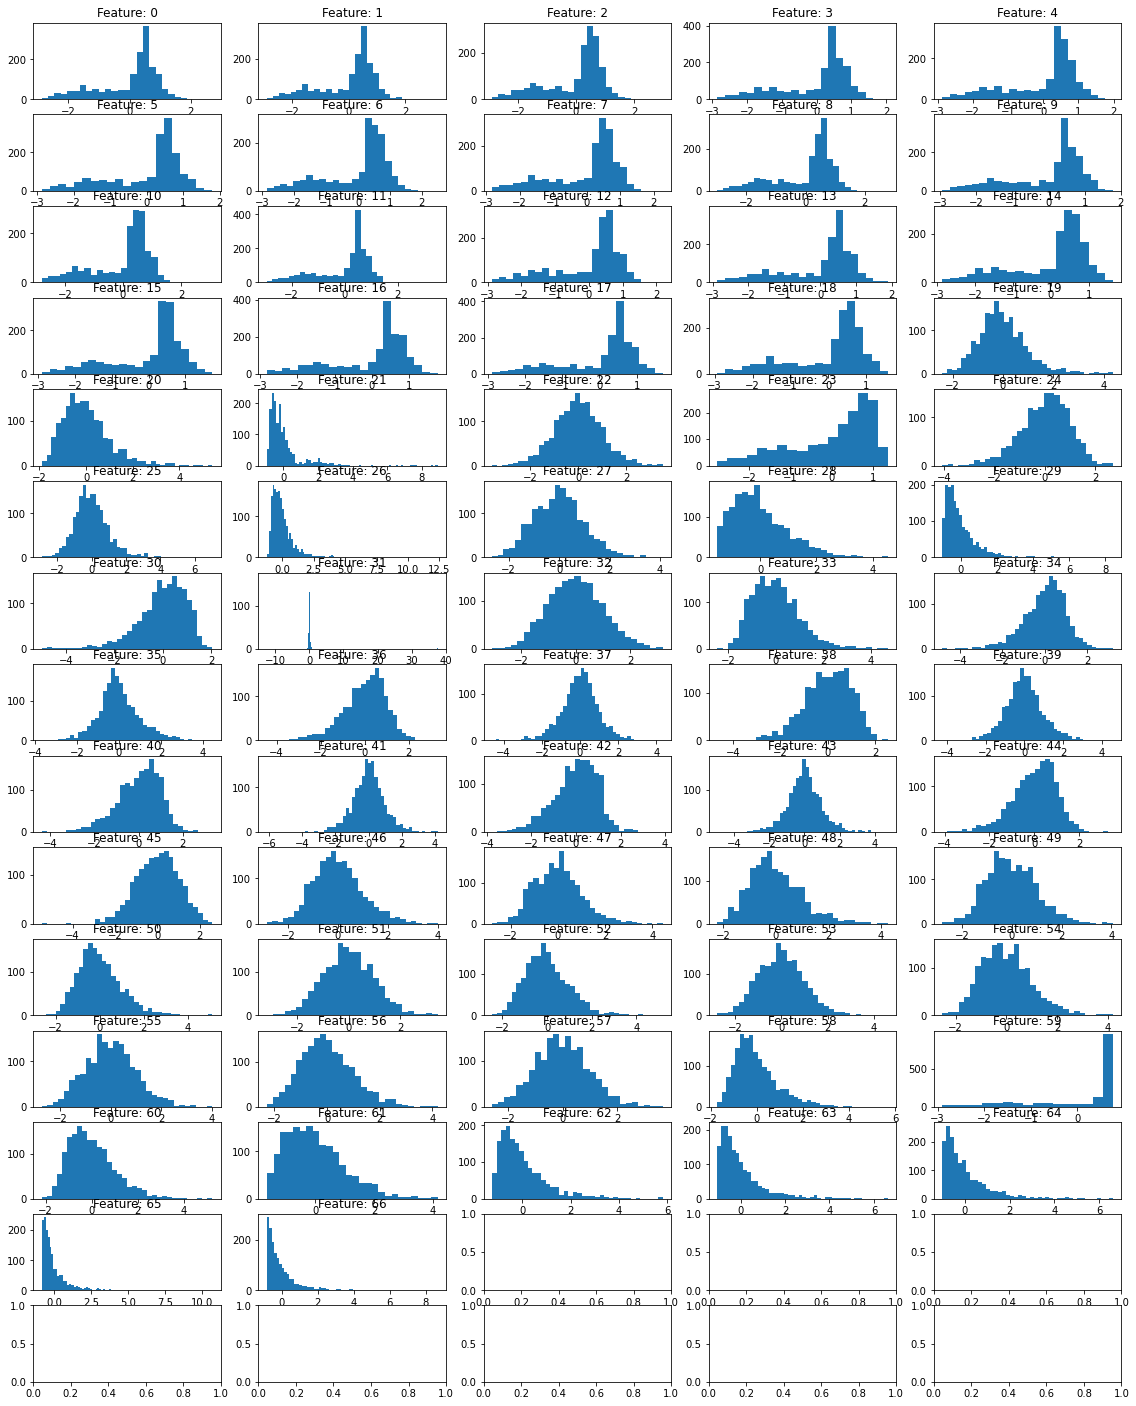

In [13]:
nrows = 15
ncols = 5
fig, axes = plt.subplots(nrows, ncols)

feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        if feature_id == 67: break
        feature_tbp  = new.iloc[:,feature_id]
        axes[row, col].hist(feature_tbp[~np.isnan(feature_tbp)], bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_id))
        feature_id += 1
    
    
fig.set_size_inches(19.5, 25)


In [5]:
from sklearn import preprocessing

In [17]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(coughs.loc[:,'Expert':])
enc.transform(coughs.loc[:,'Expert':])

<1659x90 sparse matrix of type '<class 'numpy.float64'>'
	with 8295 stored elements in Compressed Sparse Row format>

In [18]:
coughs.head()

,,EEPD50_100,EEPD100_150,EEPD150_200,EEPD200_250,EEPD250_300,EEPD300_350,EEPD350_400,EEPD400_450,EEPD450_500,EEPD500_550,...,PSD_450-550,PSD_1325-1600,PSD_1600-2000,PSD_2500-2900,PSD_3100-3700,Expert,Age,Gender,Resp_Condition,Symptoms
,File_Name,,,,,,,,,,,,,,,,,,,,,
0,008ba489-31ad-44d8-856b-fcf72369dc46,72.0,73.0,71.0,70.0,69.0,71.0,70.0,72.0,71.0,72.0,...,0.072153,0.017824,0.024982,0.041253,0.008166,3.0,28.000000,1.0,0.0,0.0
1,008c1c9e-aeef-40c5-846c-24f1b964f884,86.0,87.0,86.0,83.0,82.0,80.0,82.0,79.0,74.0,78.0,...,0.054859,0.037391,0.036934,0.032164,0.044875,3.0,44.000000,0.0,0.0,0.0
2,00bf9f83-2e8f-47cf-a4f2-97f2beceebc1,17.0,17.0,17.0,19.0,19.0,20.0,19.0,20.0,21.0,17.0,...,0.069098,0.021297,0.008322,0.002345,0.003803,3.0,37.000000,0.0,1.0,0.0
3,018b40a1-c109-459a-9e31-86cbd2cb3918,72.0,73.0,64.0,66.0,70.0,66.0,65.0,65.0,70.0,68.0,...,0.067828,0.073858,0.057807,0.022392,0.028218,1.0,34.321509,0.5,0.5,0.5
4,01bf156f-a8ff-48f6-9335-8a1f5bb4c1b7,64.0,65.0,66.0,69.0,67.0,70.0,64.0,69.0,66.0,65.0,...,0.031282,0.054040,0.087913,0.011978,0.012351,3.0,16.000000,0.0,0.0,0.0
